Symmetric example using data from Beacon Discovery.  Note that the cores need to be used in order of least to most specific here as the first core matched will be used to form the RGroups.

In [1]:
from __future__ import print_function
from rdkix import Chem
from rdkix.Chem import AllChem
from rdkix.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from rdkix.Chem.rdRGroupDecomposition import RGroupDecomposition, RGroupDecompositionParameters, RGroupMatching, RGroupScore
import pandas as pd
from rdkix.Chem import PandasTools
from collections import OrderedDict
from IPython.display import HTML
from rdkix import rdBase
rdBase.DisableLog("rdApp.debug")

In [2]:
core_smiles = ["N1([*:1])CCN([*:2])CC1", "C1(O[*:1])CCC(O[*:2])CC1", "C1([*:1])CCC([*:2])CC1"]
core_smiles = ["N1([*:1])CCN([*:2])CC1", "C1(O[*:1])CCC(O[*:2])CC1"]
cores = [Chem.MolFromSmiles(s) for s in core_smiles]


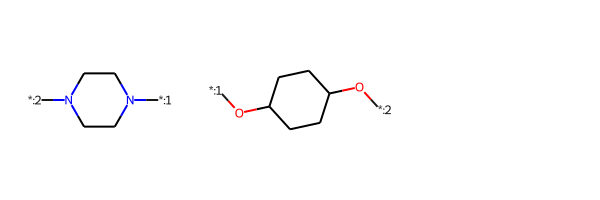

In [3]:
from rdkix.Chem import Draw
Draw.MolsToGridImage(cores)

First do the decomposition with GreedyChunks using the fingerprint variance scoring method.  We get a score of -0.951.

In [4]:


def decompose(params):
    decomp = RGroupDecomposition(cores, params)
    print("Added cores")
    mols = []
    count = 0
    total = 0
    for line in open("compounds2.txt"):
        sm = line.split()[-1]
        m = Chem.MolFromSmiles(sm)
        if m:
            count += 1
            total = max(total,decomp.Add(m))
            if count % 100 == 0:
                print("Added {} of {}".format(total, count))
    print ("Added {} to RGroup Decomposition out of {}".format(total, count))
    
    (success, score) = decomp.ProcessAndScore()
    print('Success {} Score {}'.format(success, score))
    return pd.DataFrame(decomp.GetRGroupsAsColumns())
    

In [5]:
rdBase.DisableLog("rdApp.debug")
options = RGroupDecompositionParameters()
#options.onlyMatchAtRGroups = True
options.scoreMethod = RGroupScore.FingerprintVariance
df = decompose(options)
    

Added cores


RDKix ERROR: [20:50:02] SMILES Parse Error: syntax error while parsing: SMILES
RDKix ERROR: [20:50:02] SMILES Parse Error: Failed parsing SMILES 'SMILES' for input: 'SMILES'


Added 70 of 100
Added 125 of 200
Added 171 of 300
Added 207 of 400
Added 241 of 500
Added 280 of 600
Added 321 of 700
Added 360 of 800
Added 409 of 900
Added 447 of 1000
Added 502 of 1100
Added 547 of 1200
Added 598 of 1300
Added 641 of 1400
Added 696 of 1500
Added 746 of 1600
Added 795 of 1700
Added 833 of 1800
Added 851 of 1900
Added 869 of 2000
Added 888 of 2100
Added 897 to RGroup Decomposition out of 2159
Success True Score -0.9519246458316142



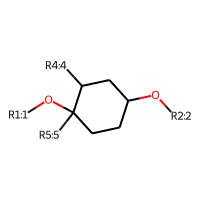
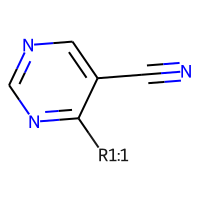
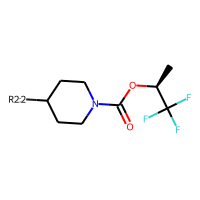
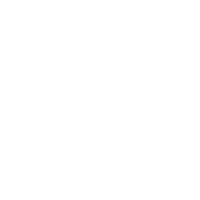
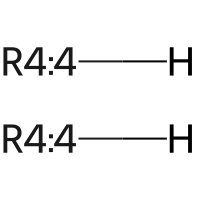
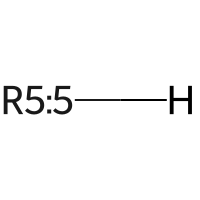
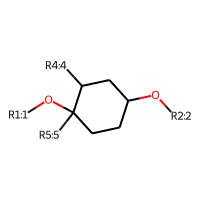
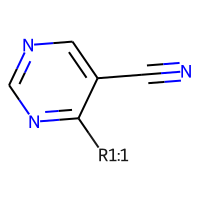
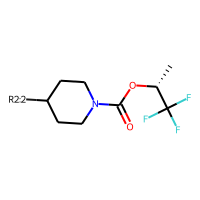
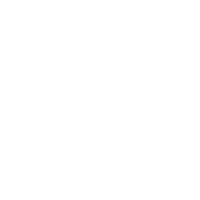
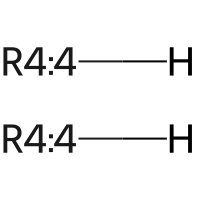
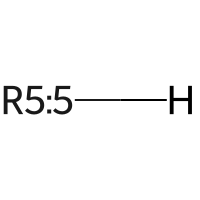
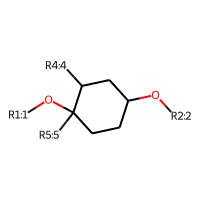
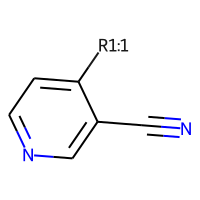
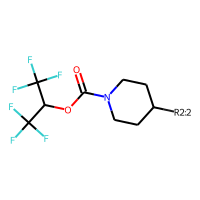
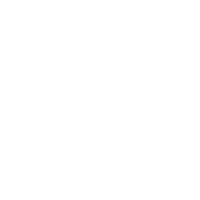
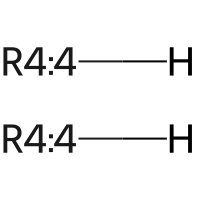
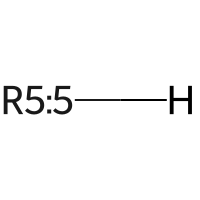
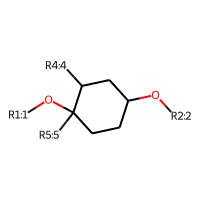
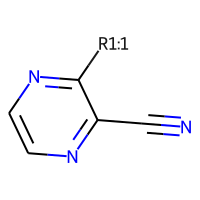
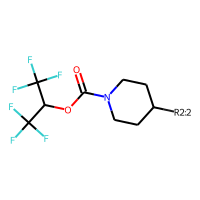
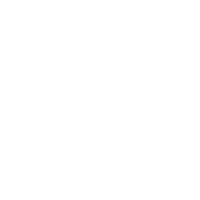
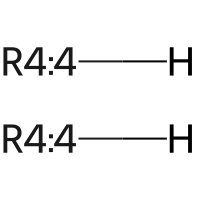
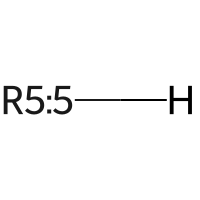
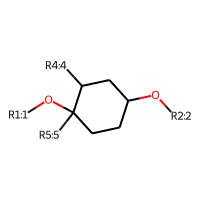
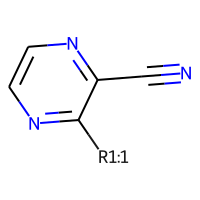
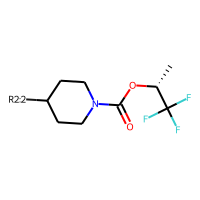
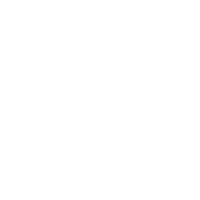
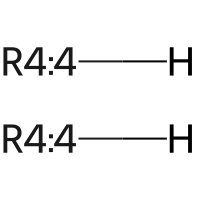
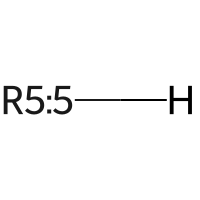
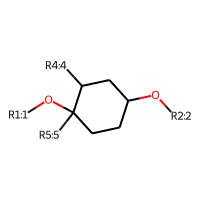
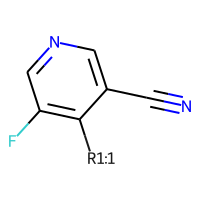
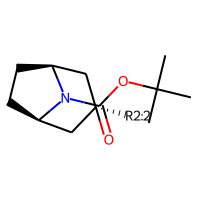
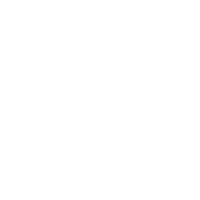
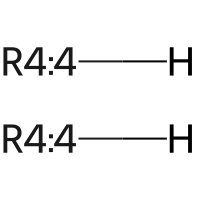
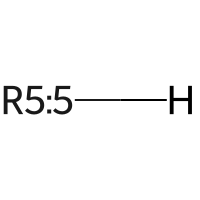
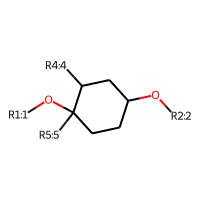
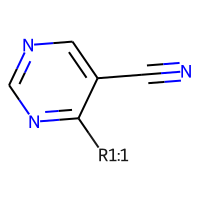
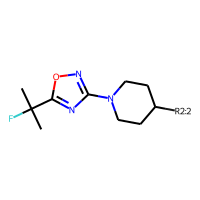
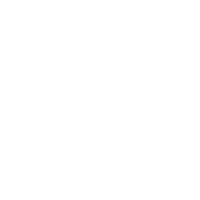
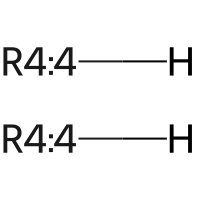
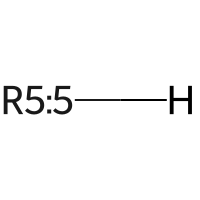
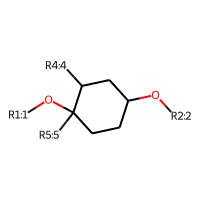
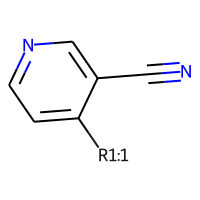
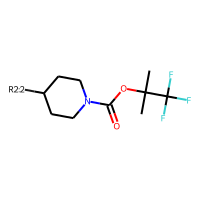
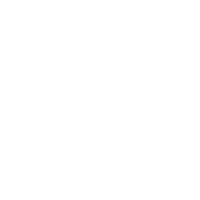
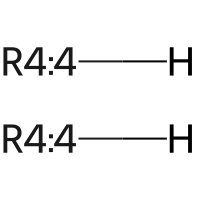
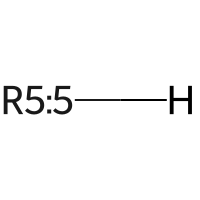
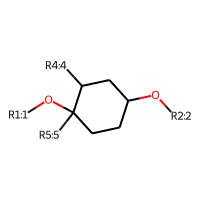
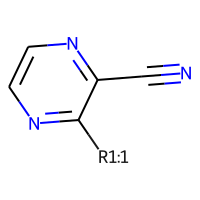
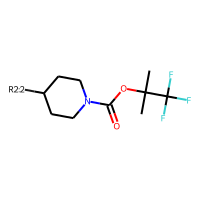
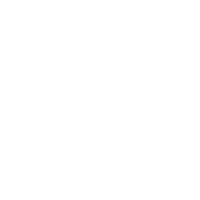
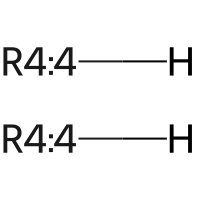
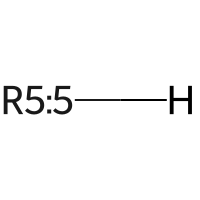
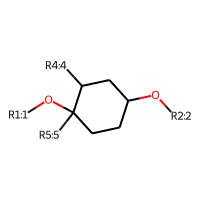
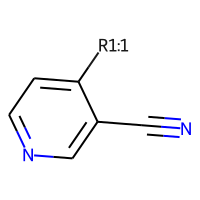
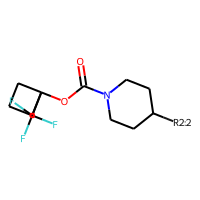
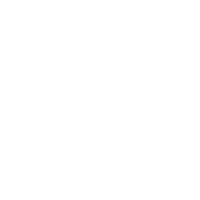
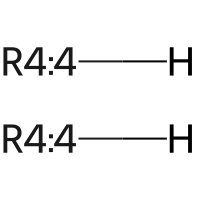
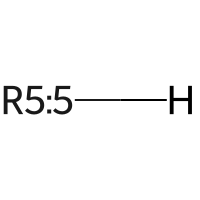
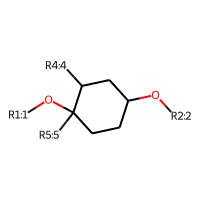
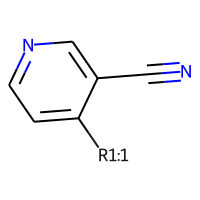
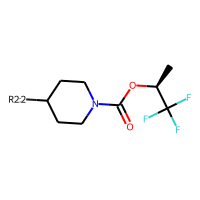
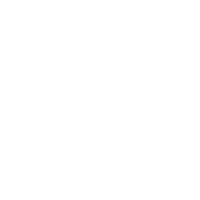
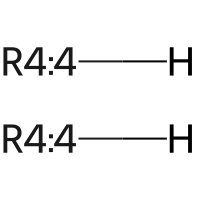
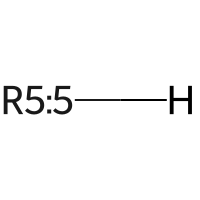
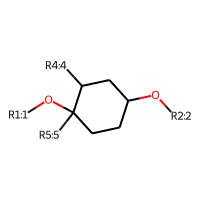
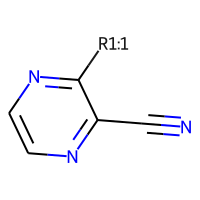
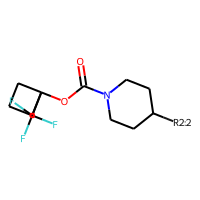
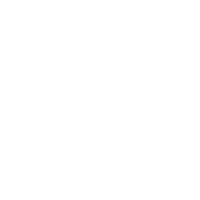
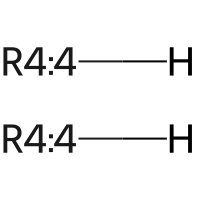
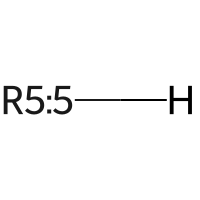
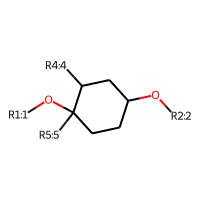
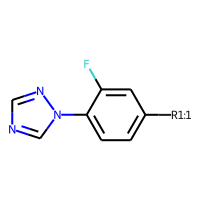
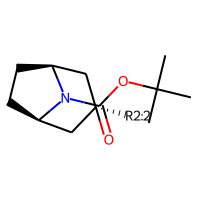
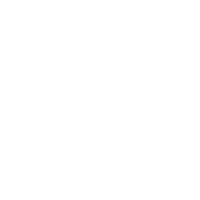
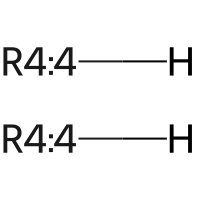
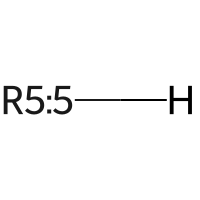
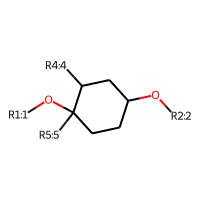
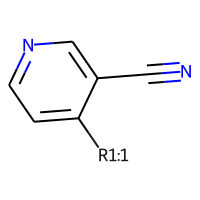
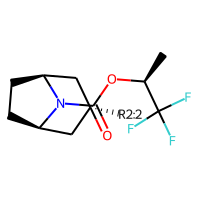
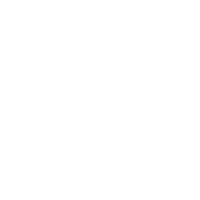
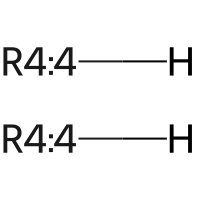
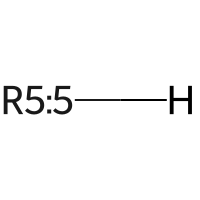
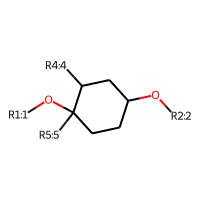
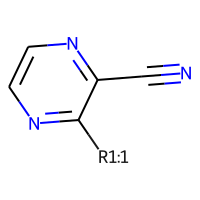
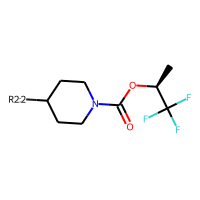
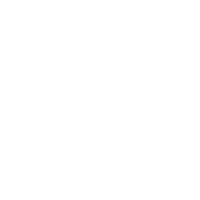
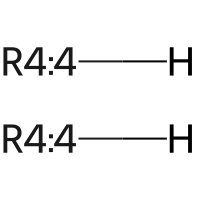
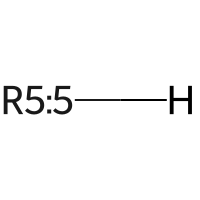
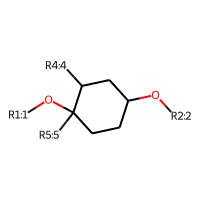
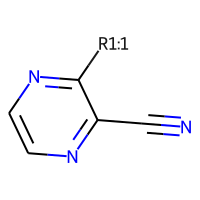
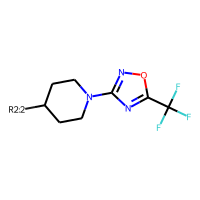
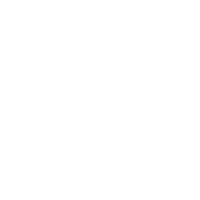
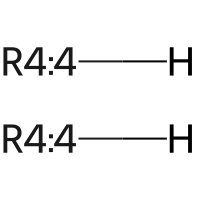
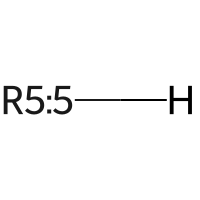
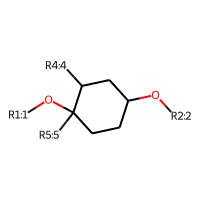
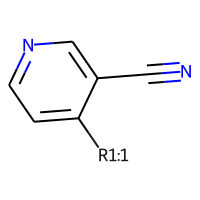
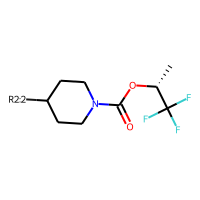
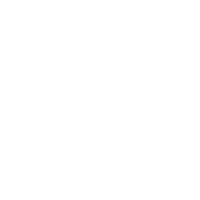
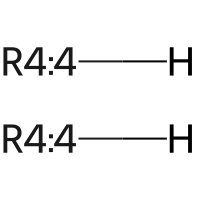
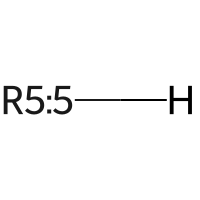
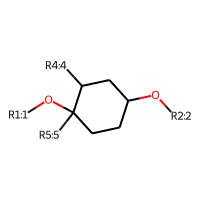
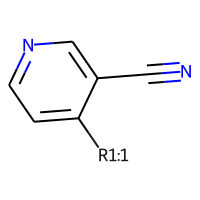
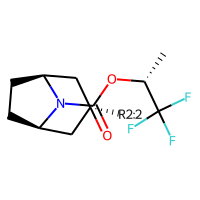
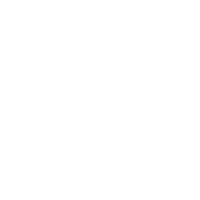
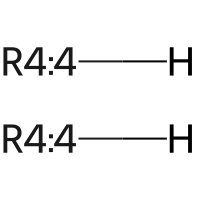
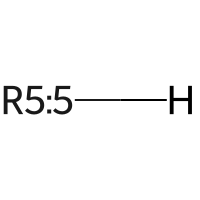
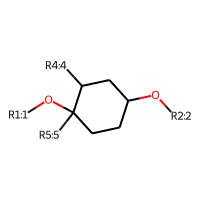
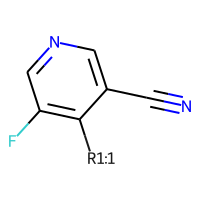
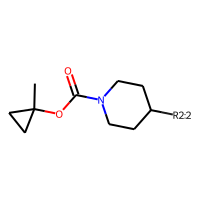
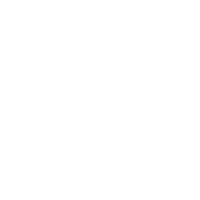
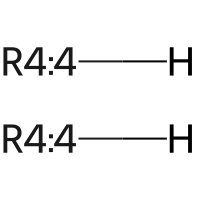
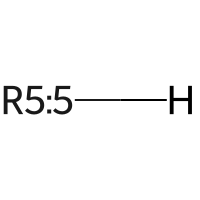
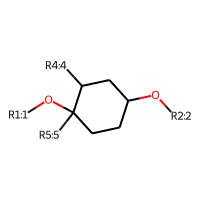
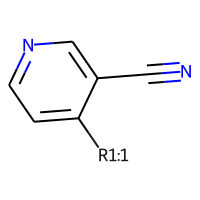
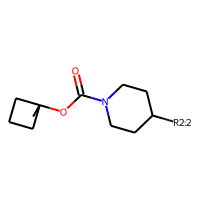
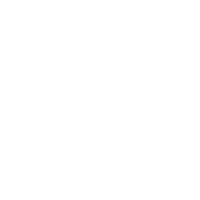
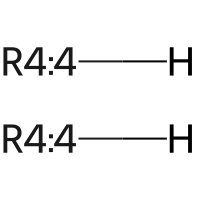
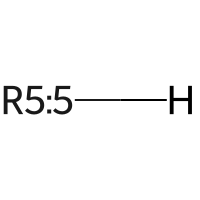
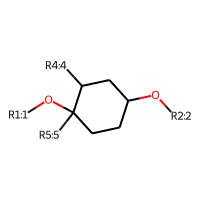
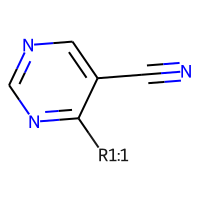
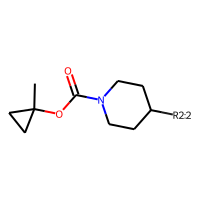
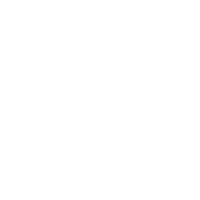
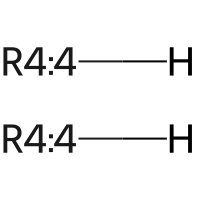
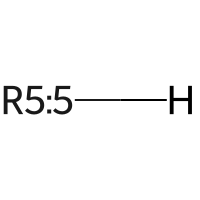
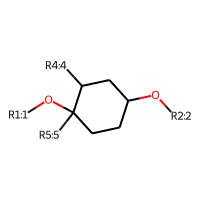
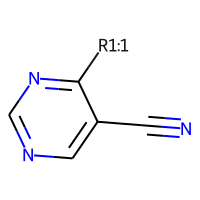
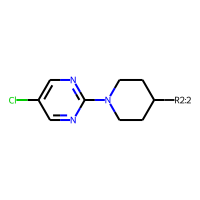
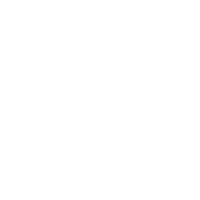
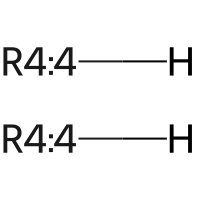
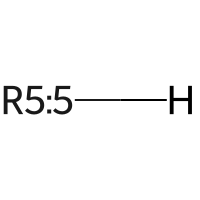
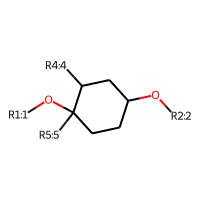
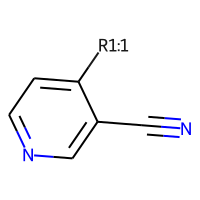
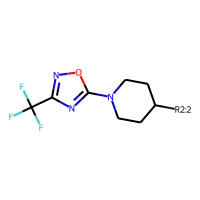
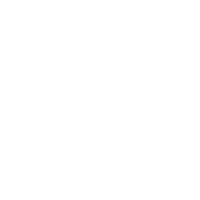
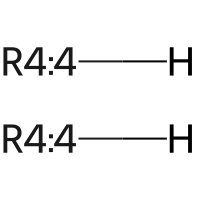
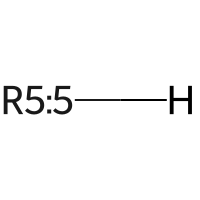
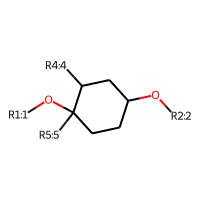
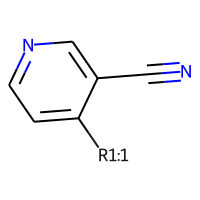
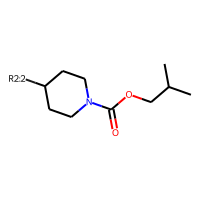
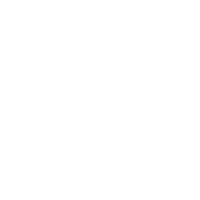
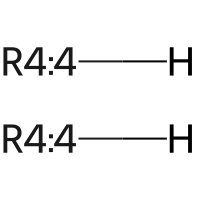
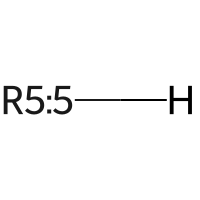
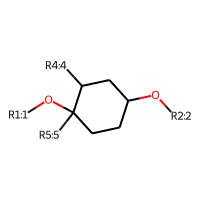
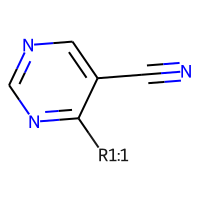
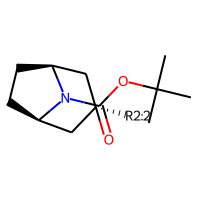
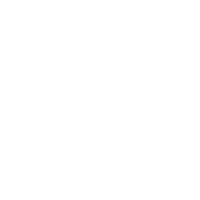
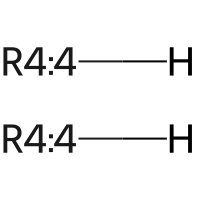
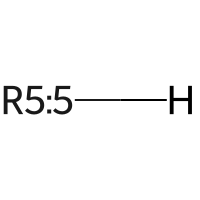
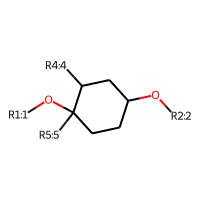
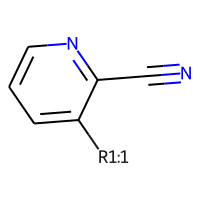
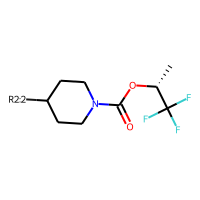
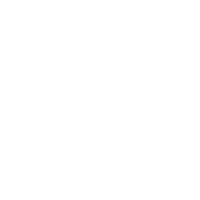
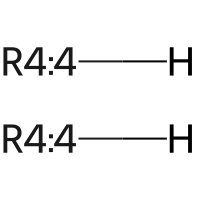
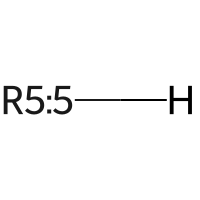
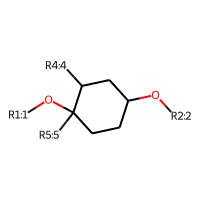
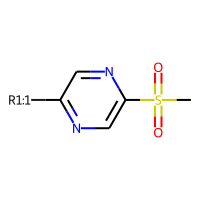
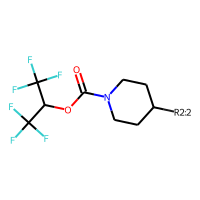
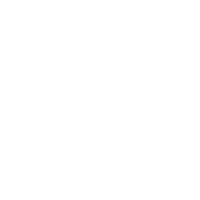
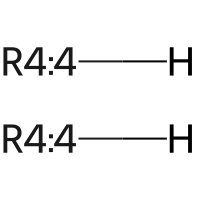
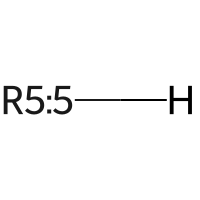
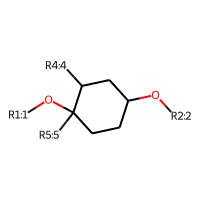
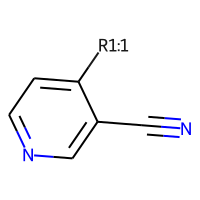
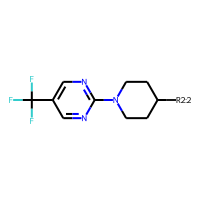
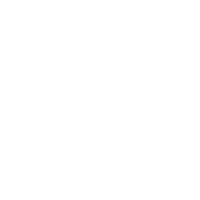
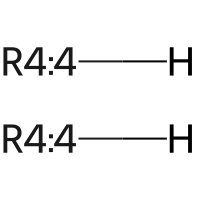
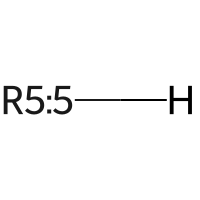
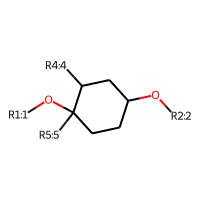
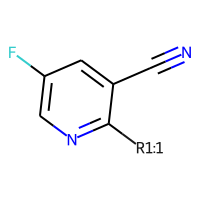
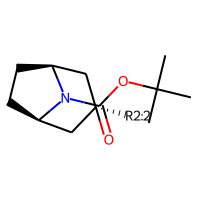
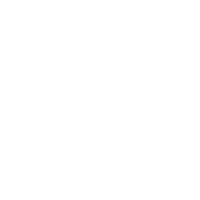
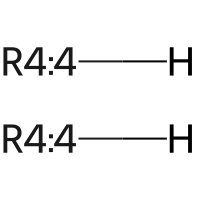
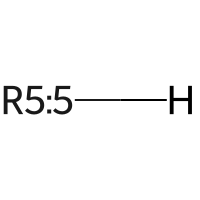
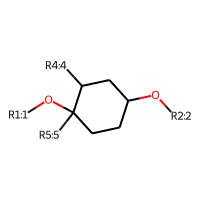
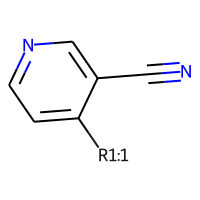
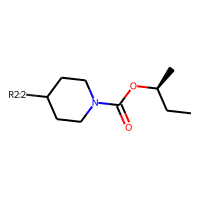
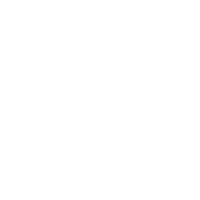
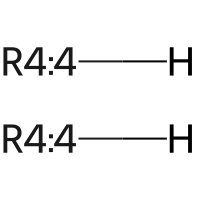
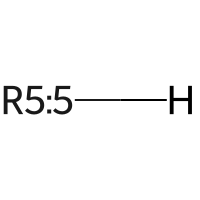
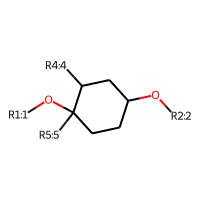
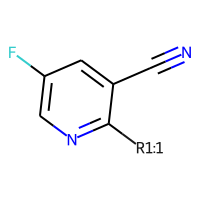
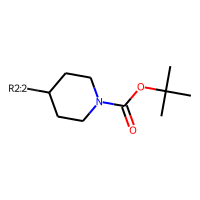
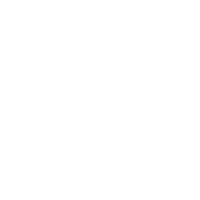
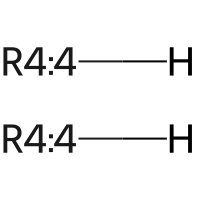
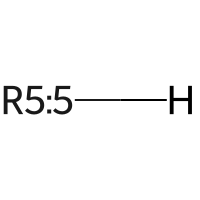
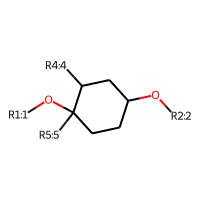
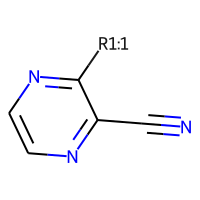
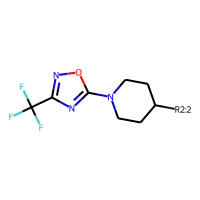
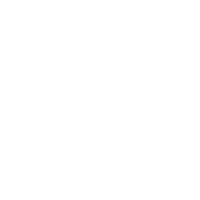
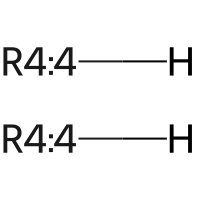
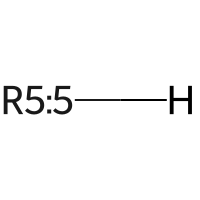
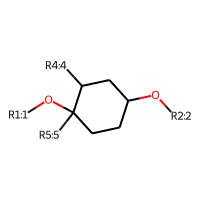
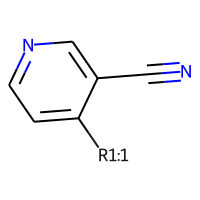
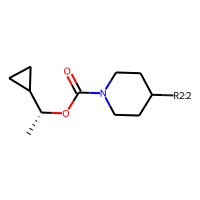
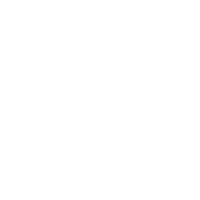
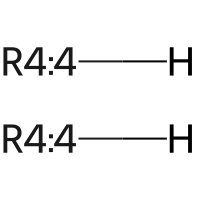
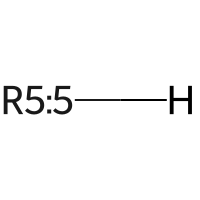
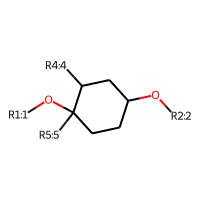
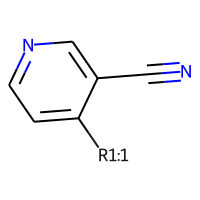
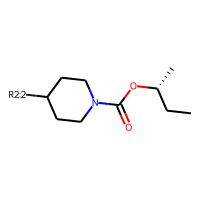
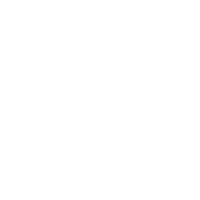
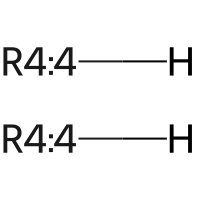
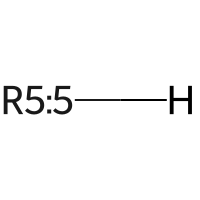
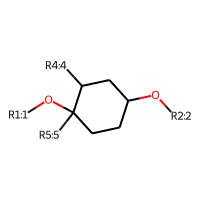
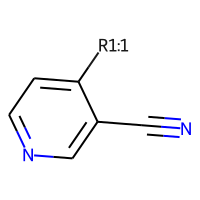
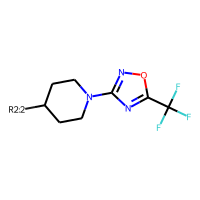
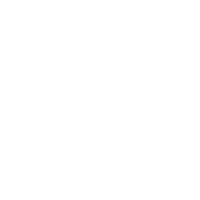
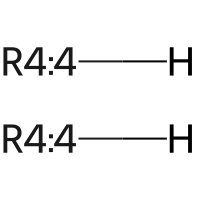
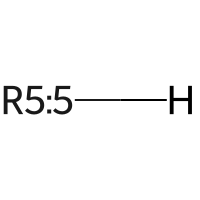
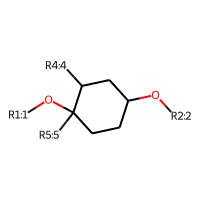
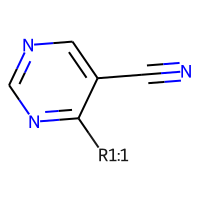
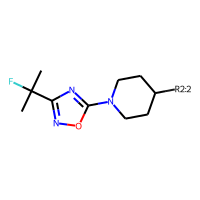
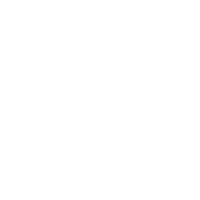
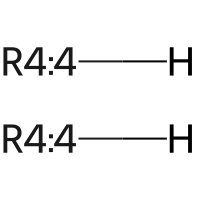
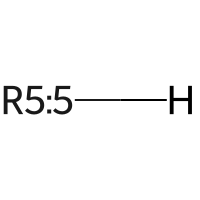
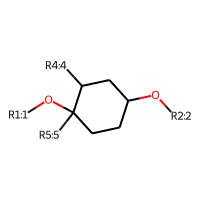
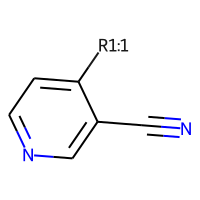
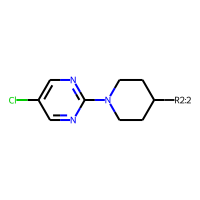
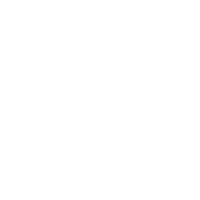
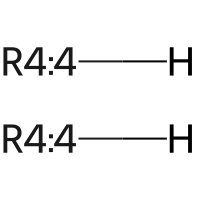
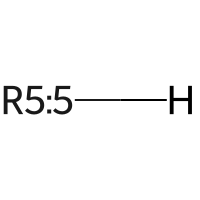
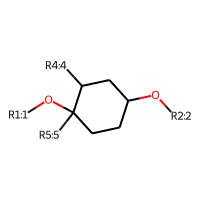
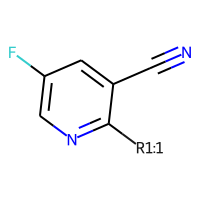
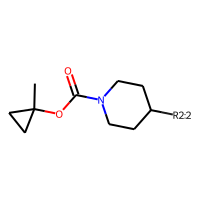
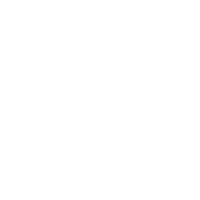
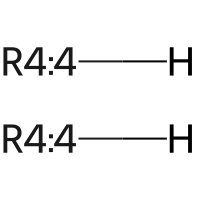
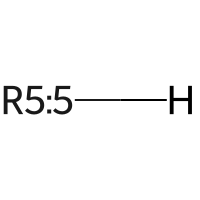
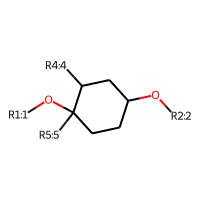
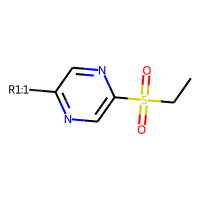
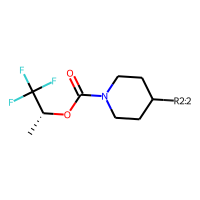
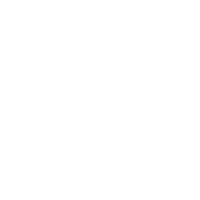
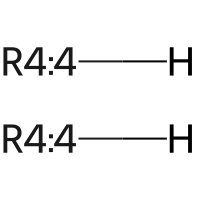
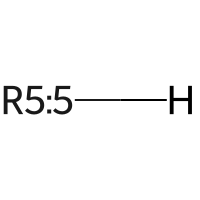
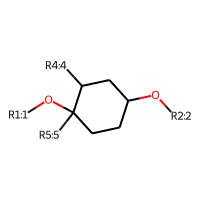
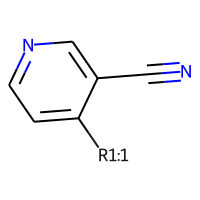
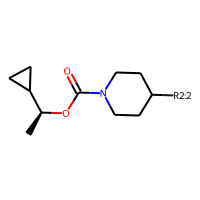
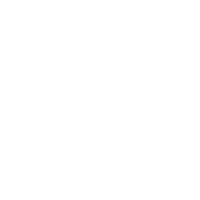
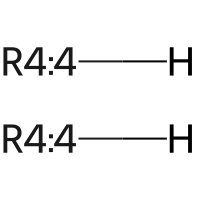
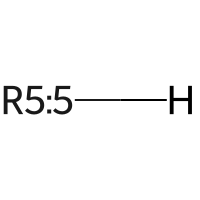
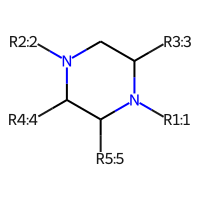
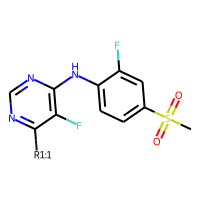
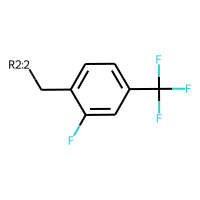
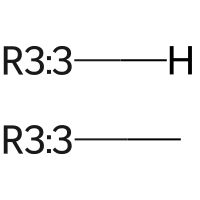
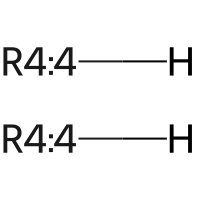
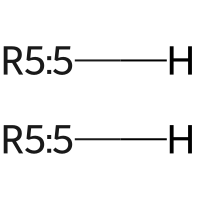
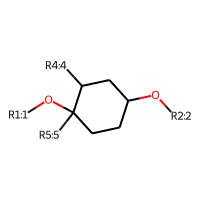
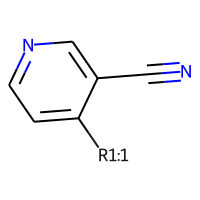
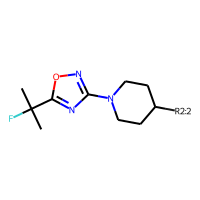
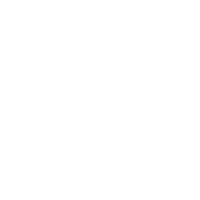
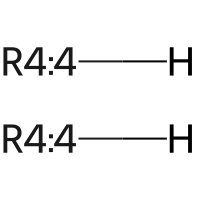
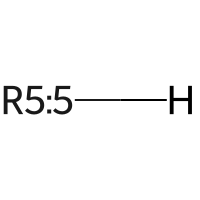
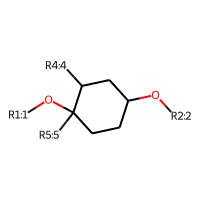
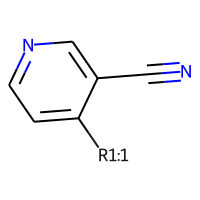
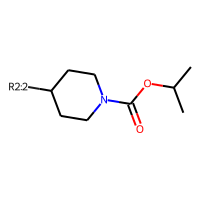
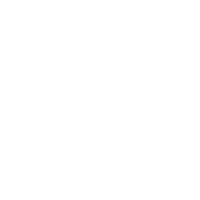
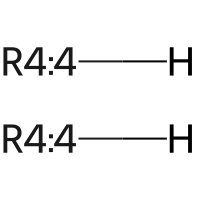
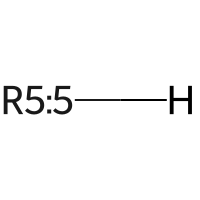
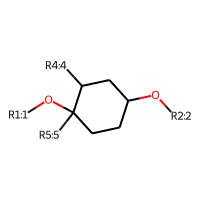
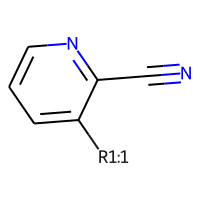
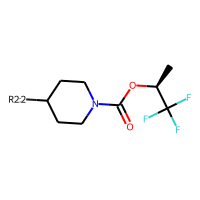
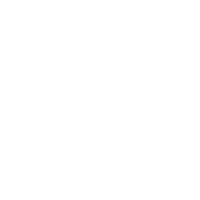
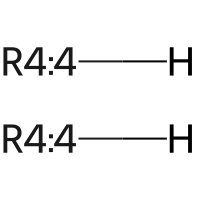
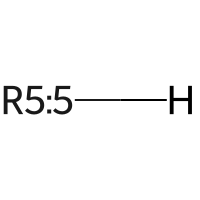
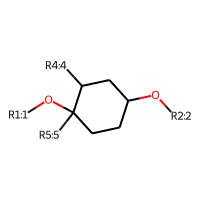
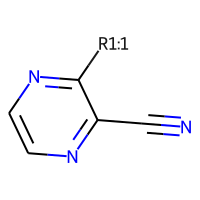
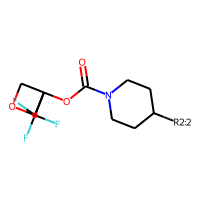
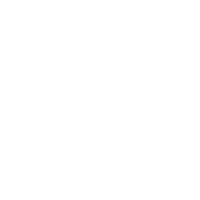
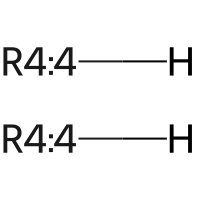
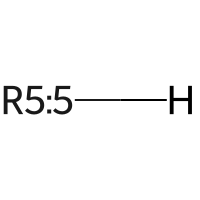
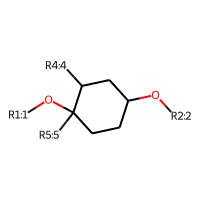
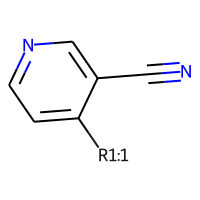
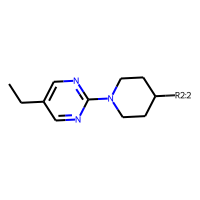
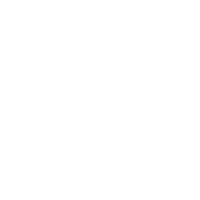
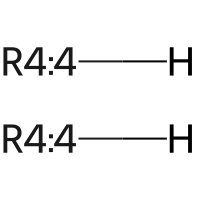
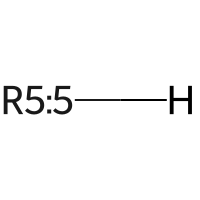
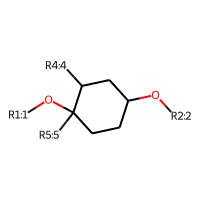
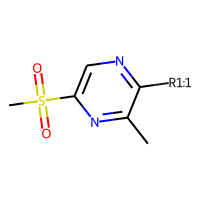
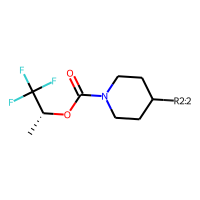
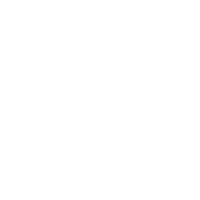
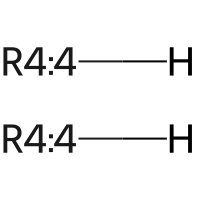
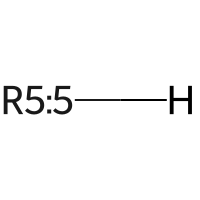
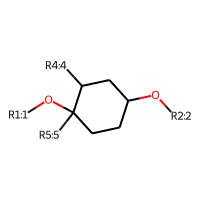
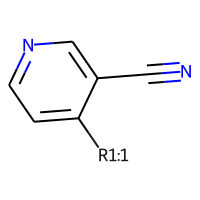
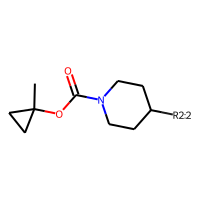
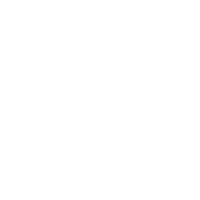
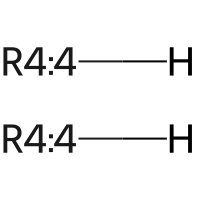
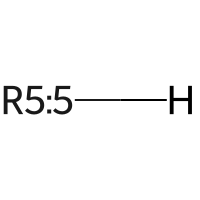
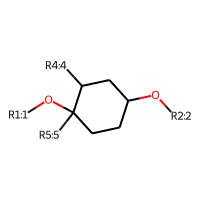
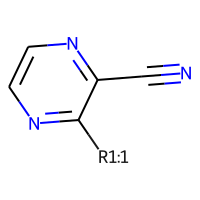
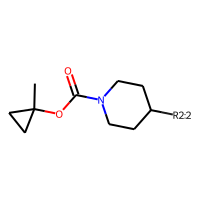
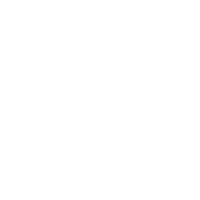
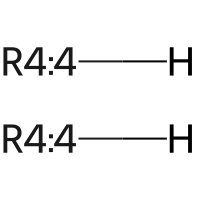
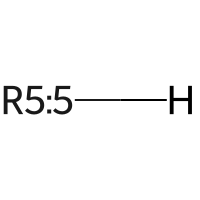
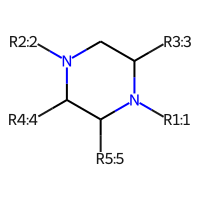
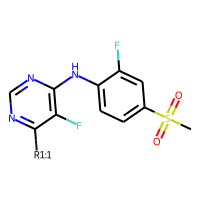
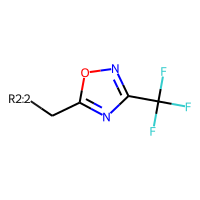
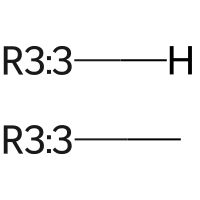
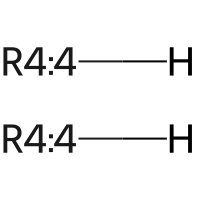
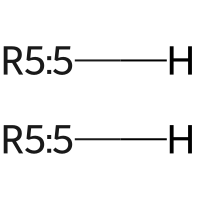
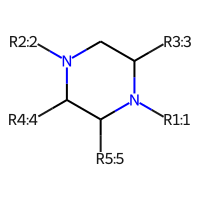
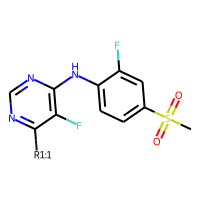
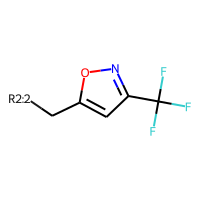
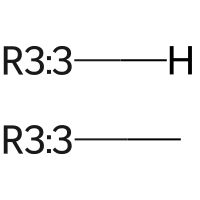
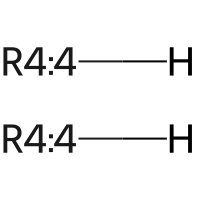
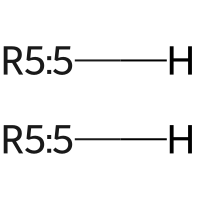
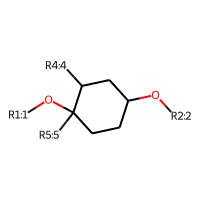
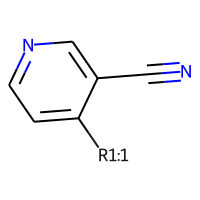
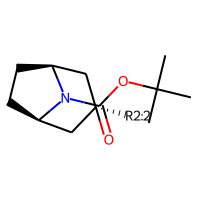
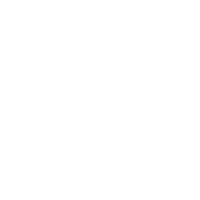
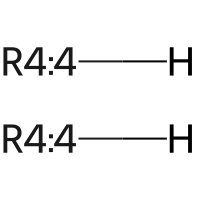
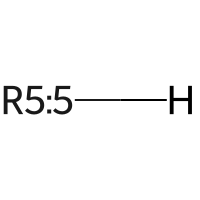
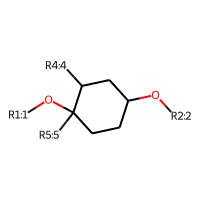
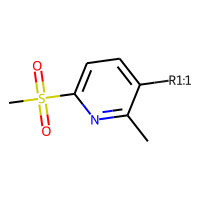
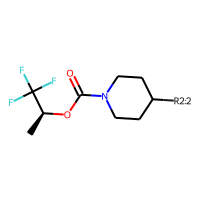
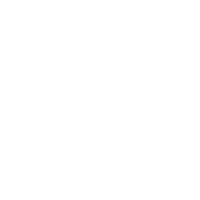
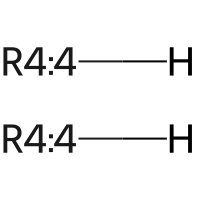
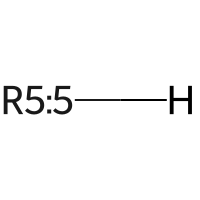
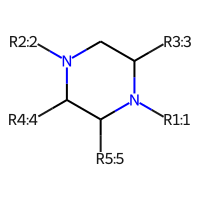
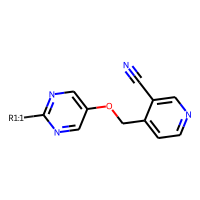
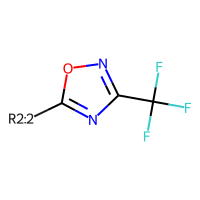
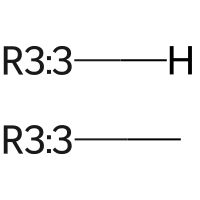
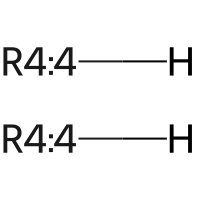
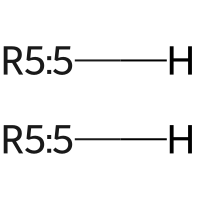
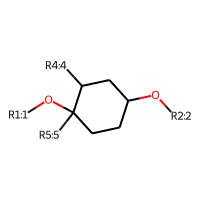
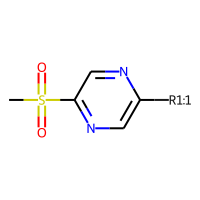
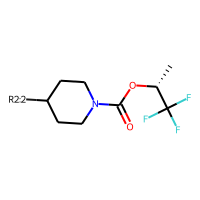
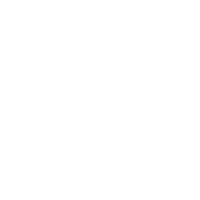
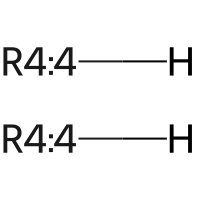
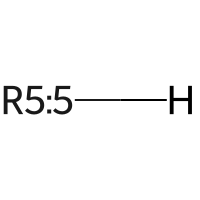
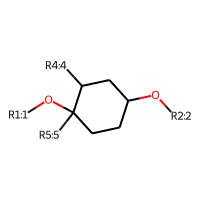
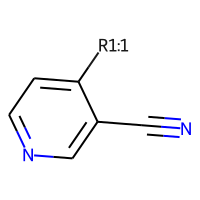
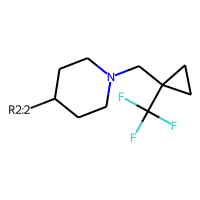
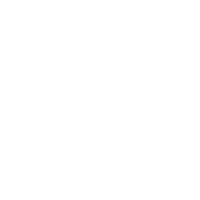
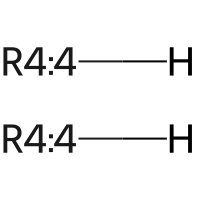
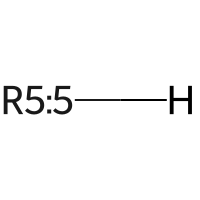
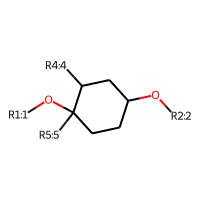
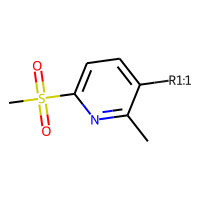
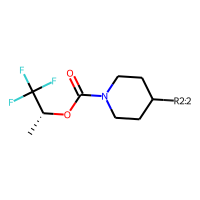
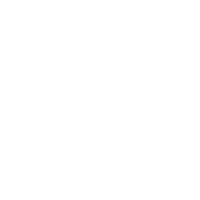
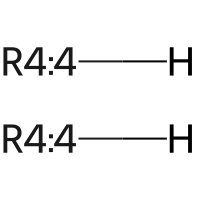
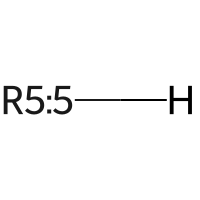
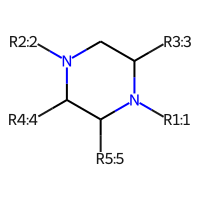
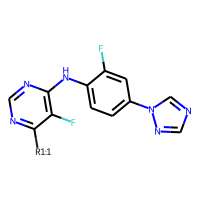
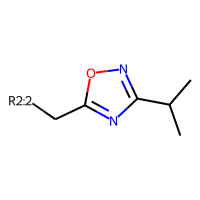
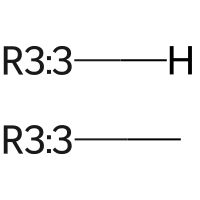
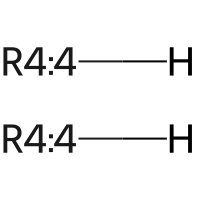
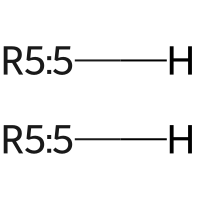
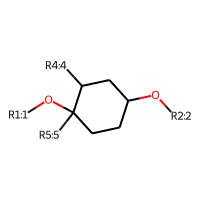
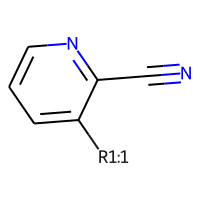
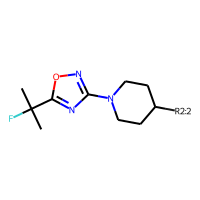
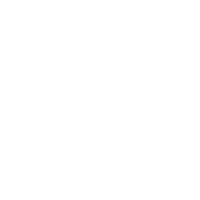
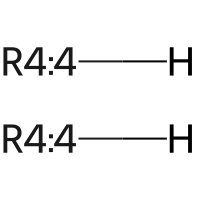
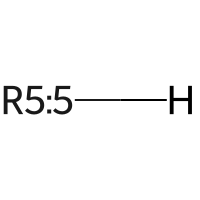
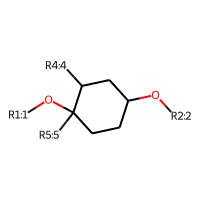
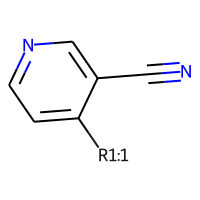
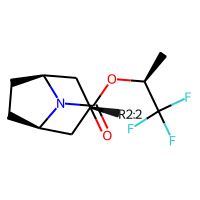
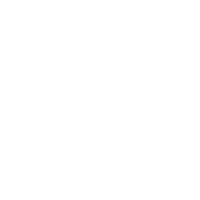
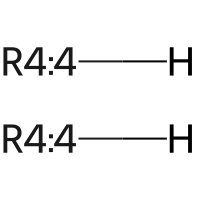
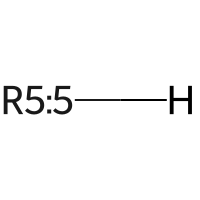
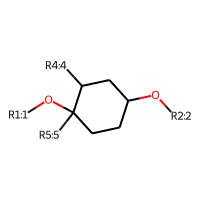
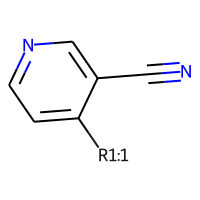
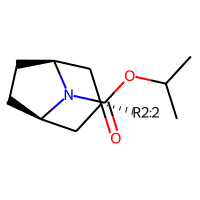
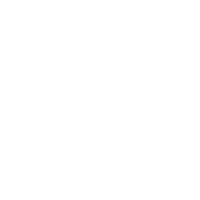
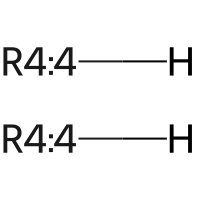
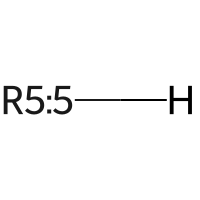
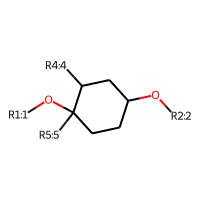
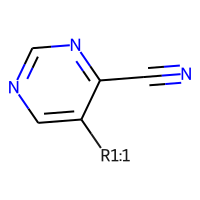
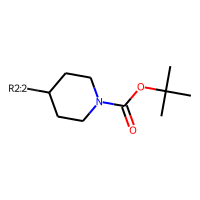
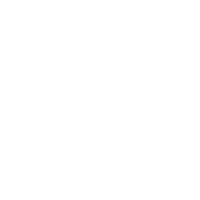
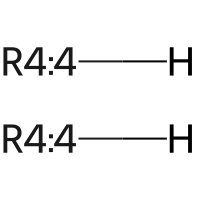
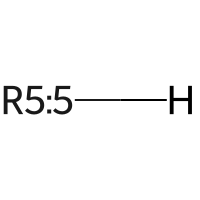
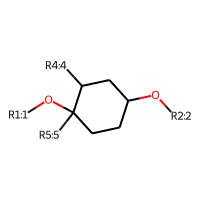
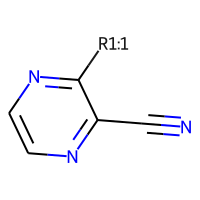
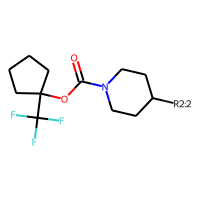
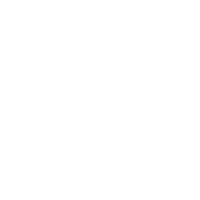
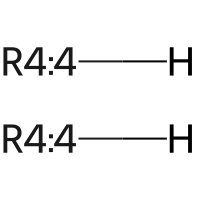
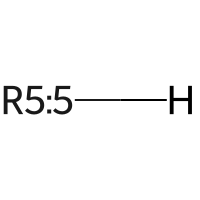
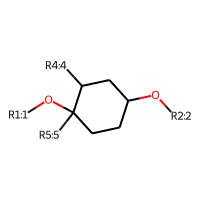
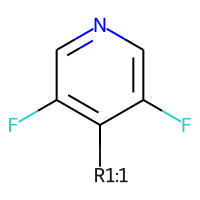
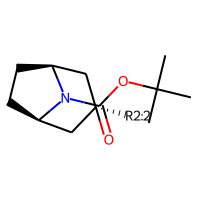
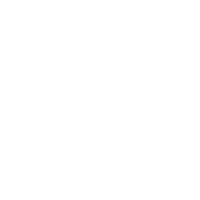
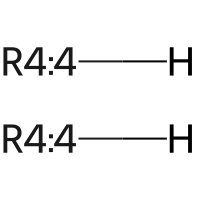
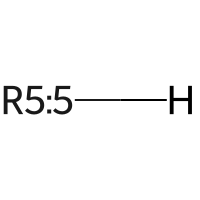
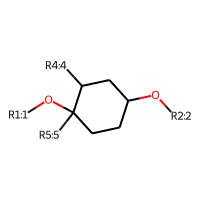
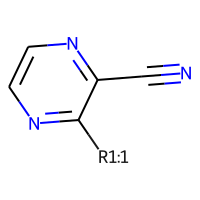
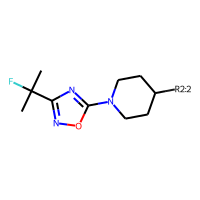
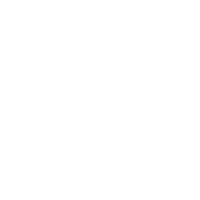
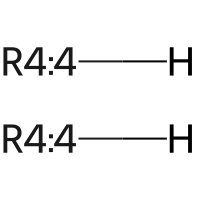
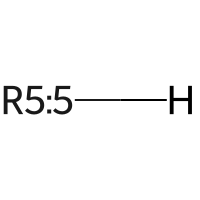
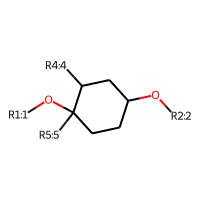
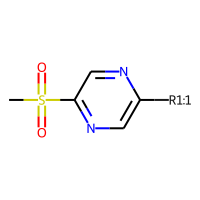
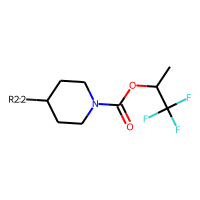
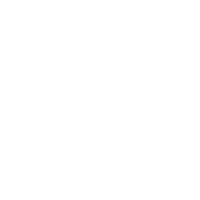
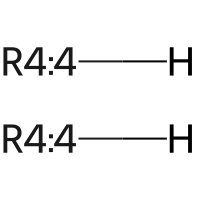
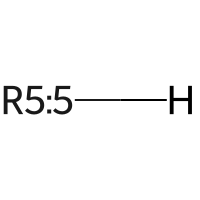
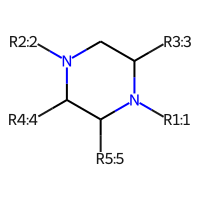
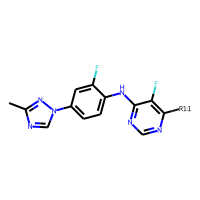
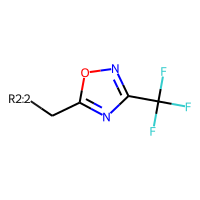
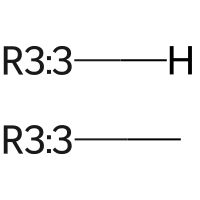
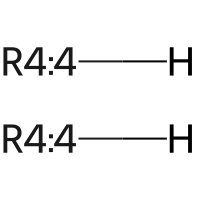
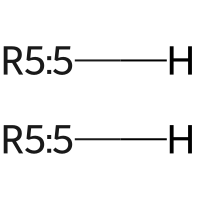
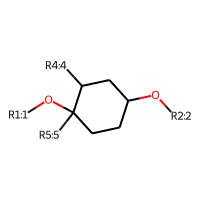
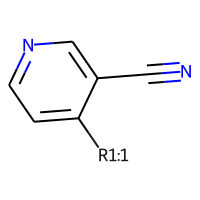
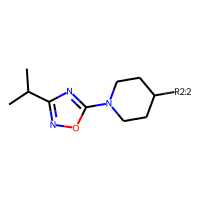
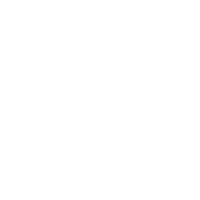
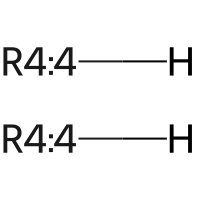
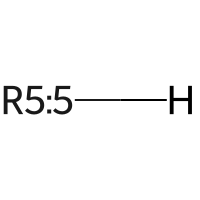
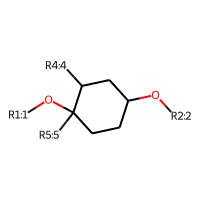
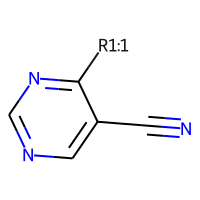
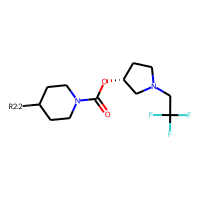
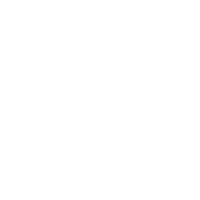
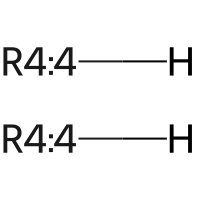
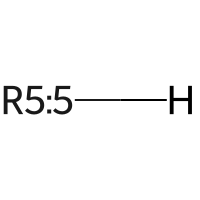
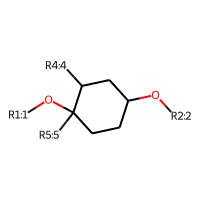
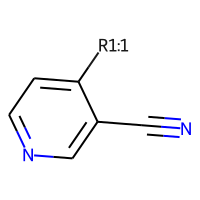
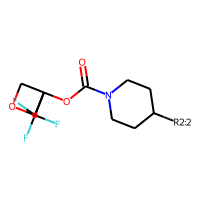
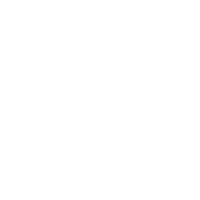
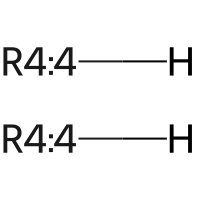
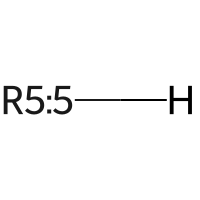
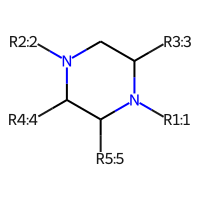
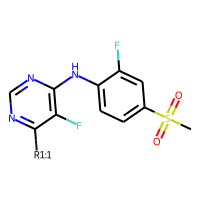
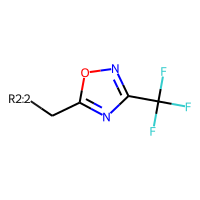
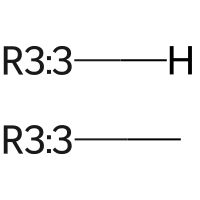
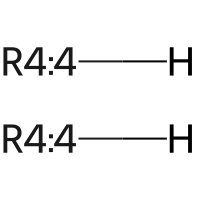
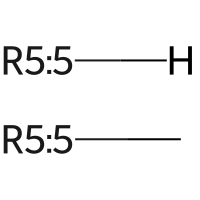
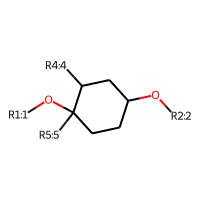
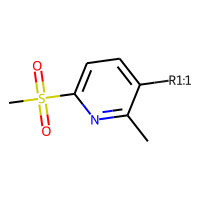
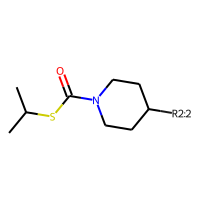
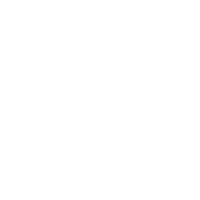
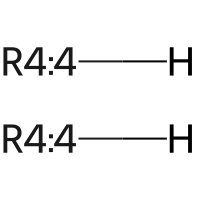
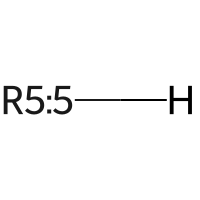
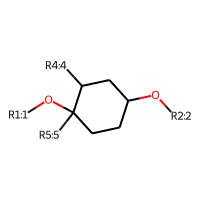
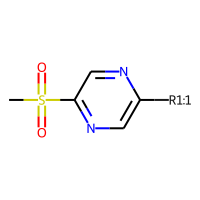
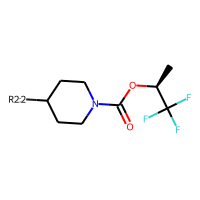
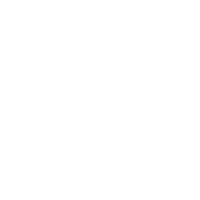
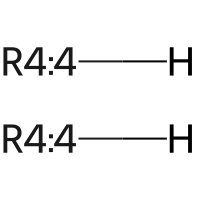
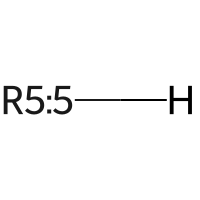
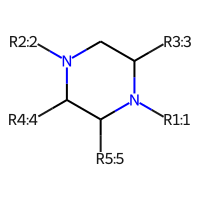
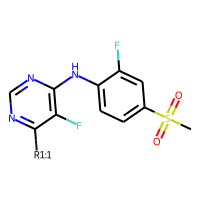
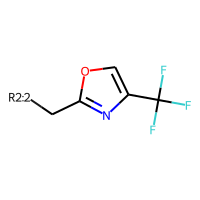
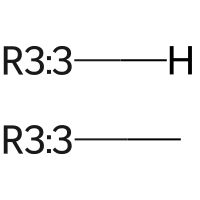
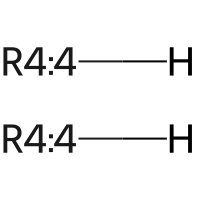
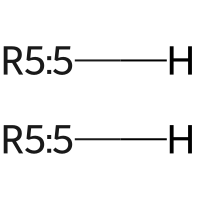
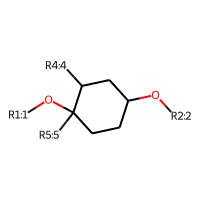
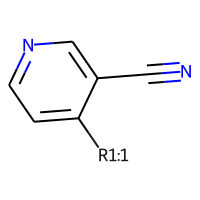
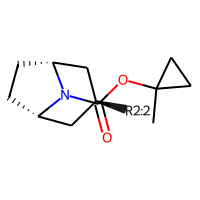
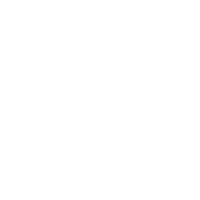
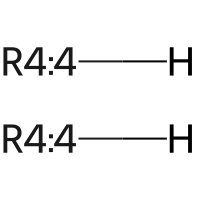
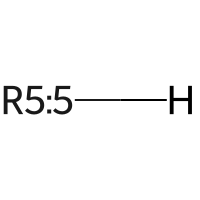
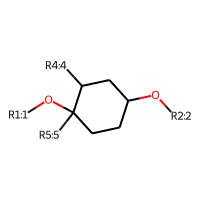
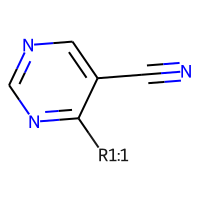
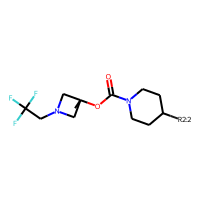
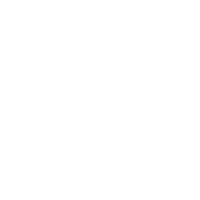
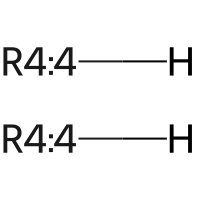
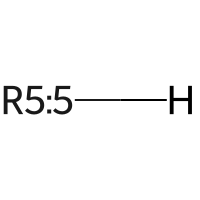
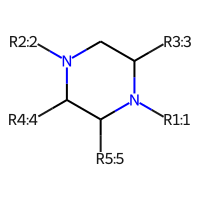
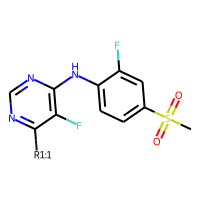
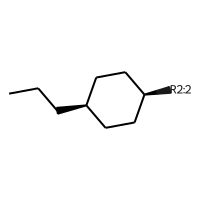
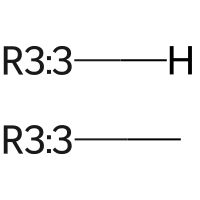
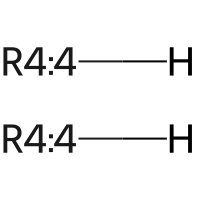
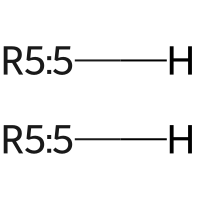
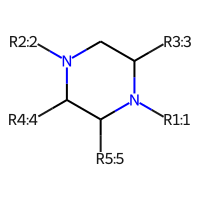
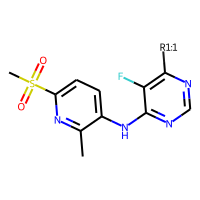
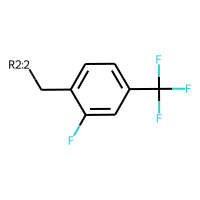
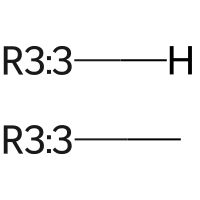
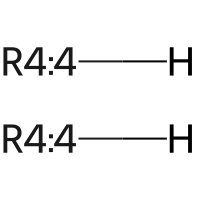
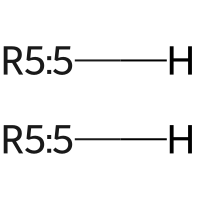
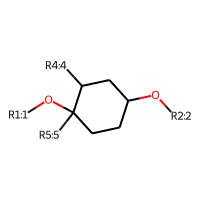
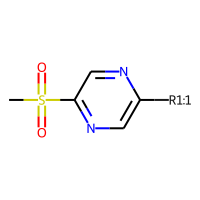
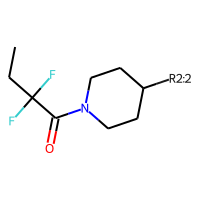
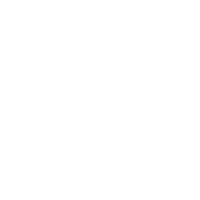
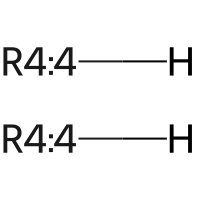
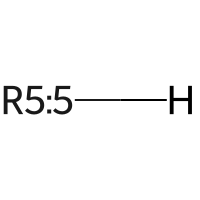
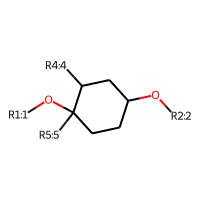
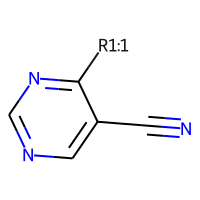
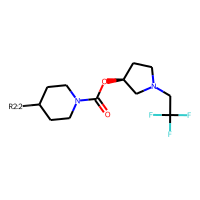
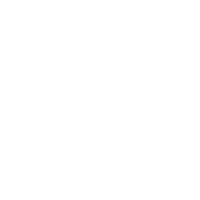
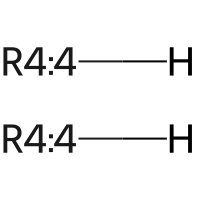
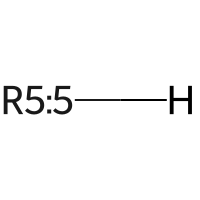
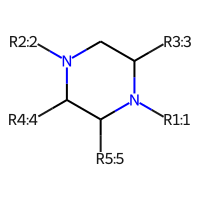
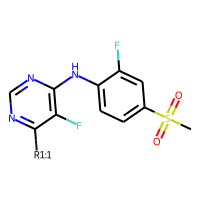
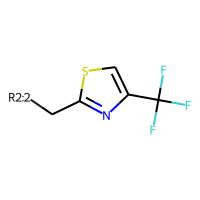
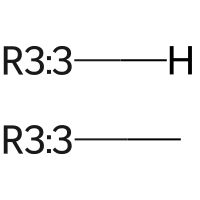
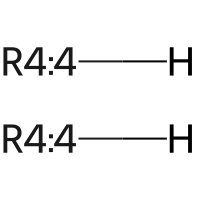
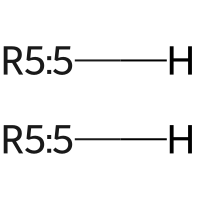
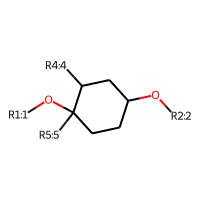
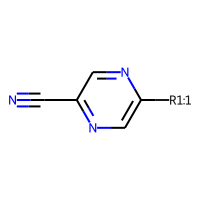
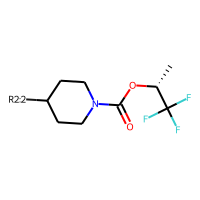
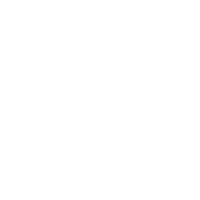
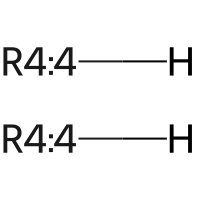
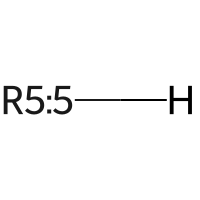
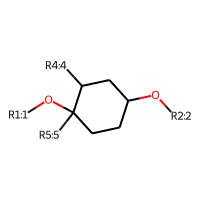
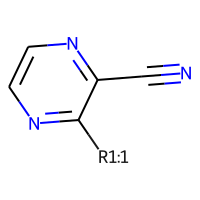
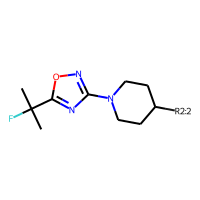
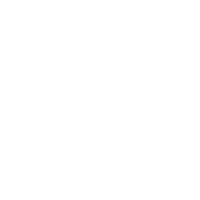
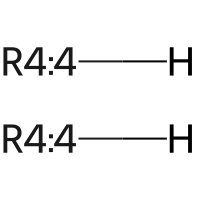
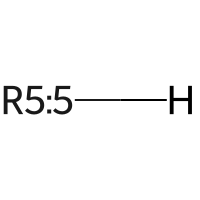
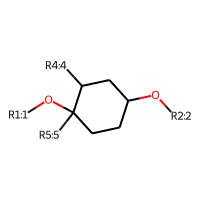
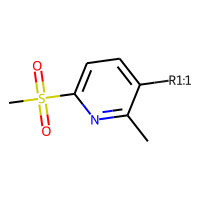
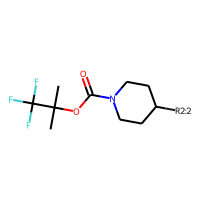
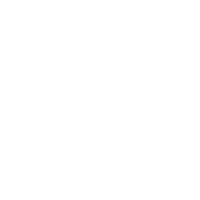
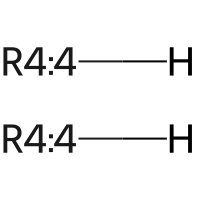
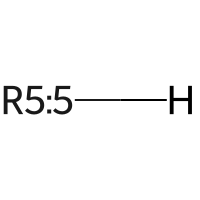
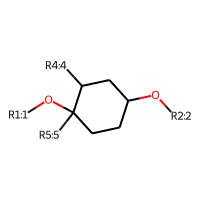
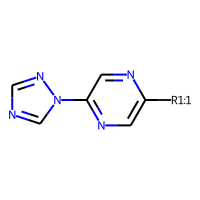
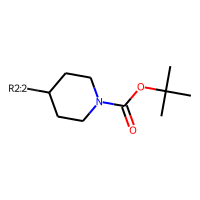
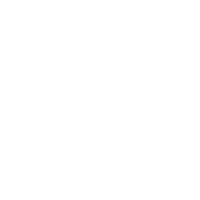
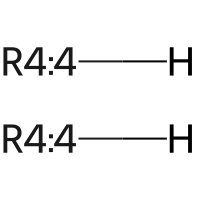
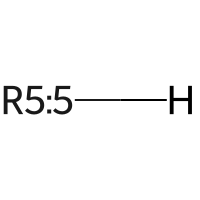
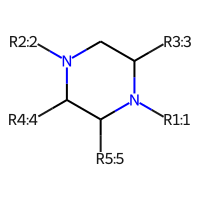
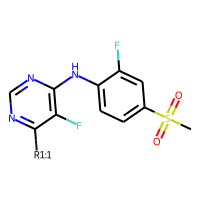
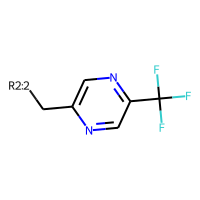
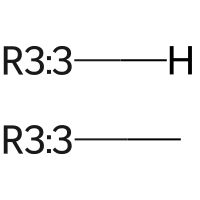
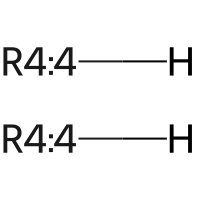
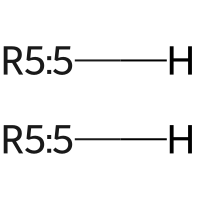
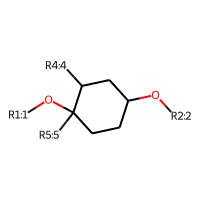
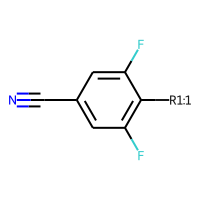
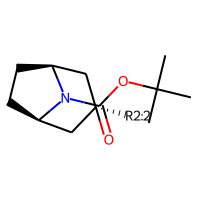
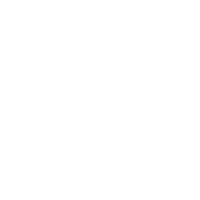
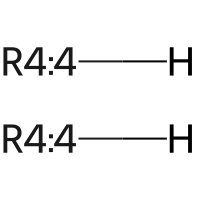
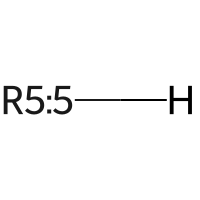
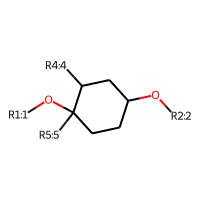
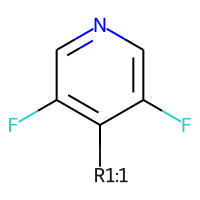
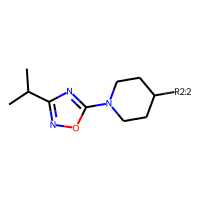
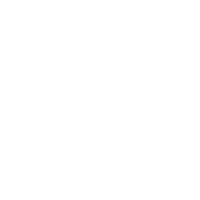
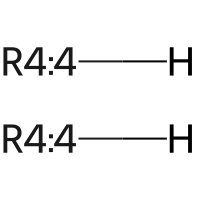
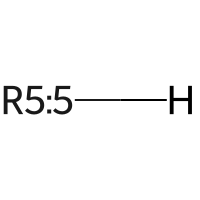
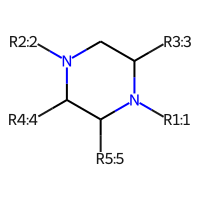
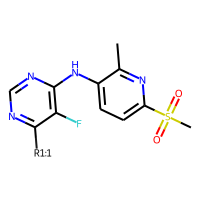
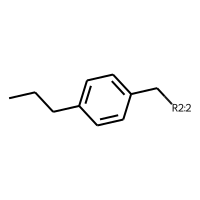
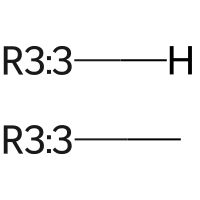
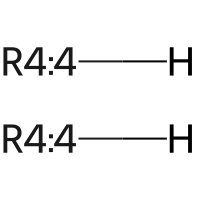
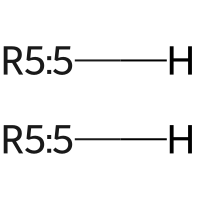
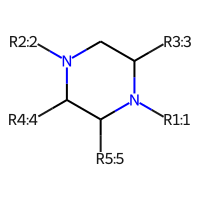
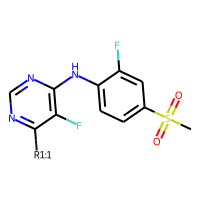
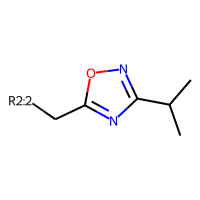
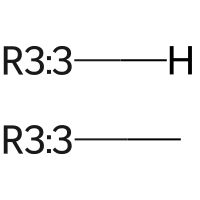
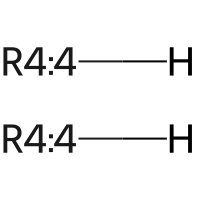
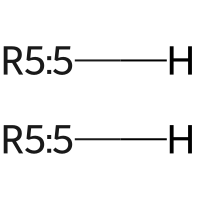
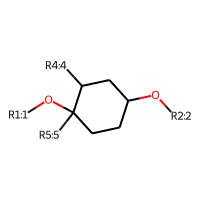
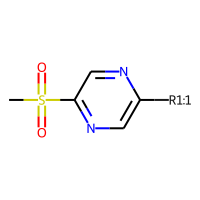
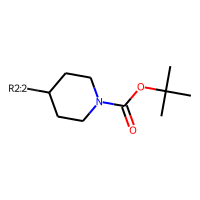
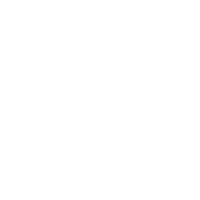
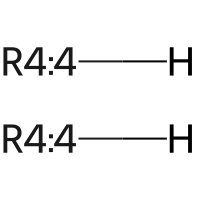
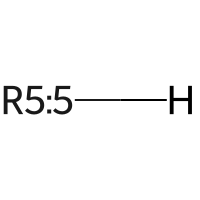
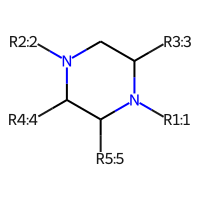
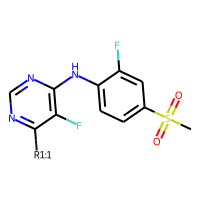
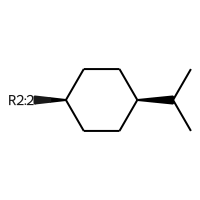
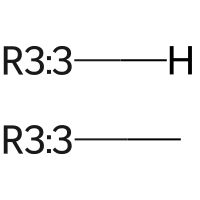
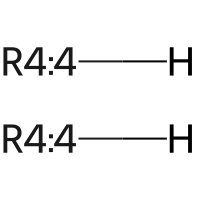
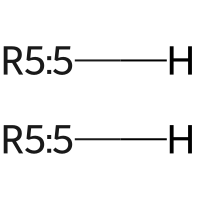
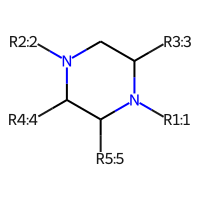
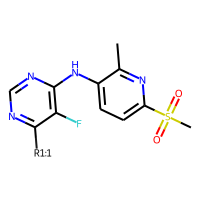
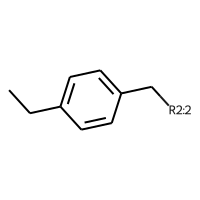
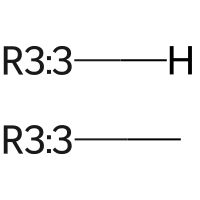
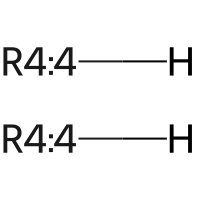
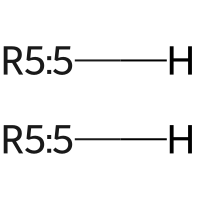
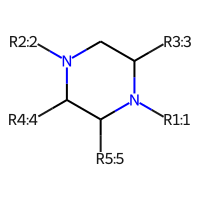
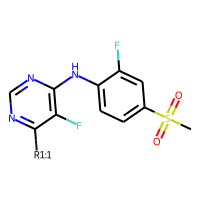
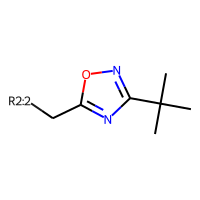
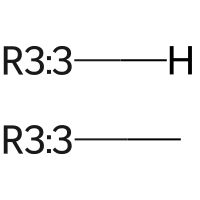
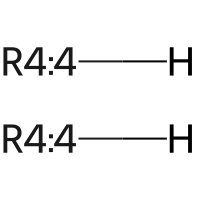
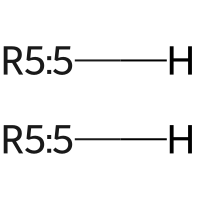
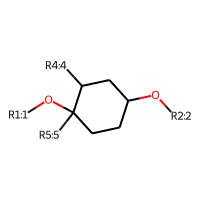
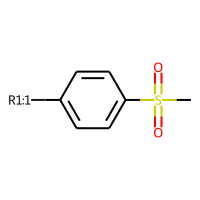
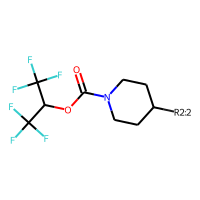
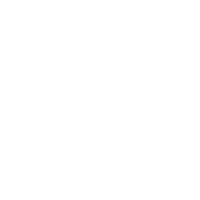
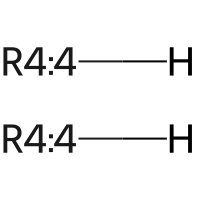
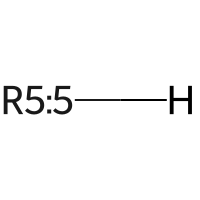
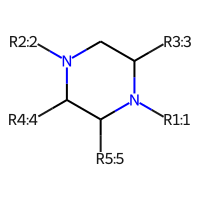
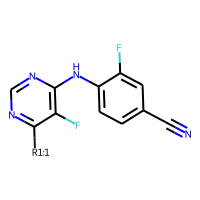
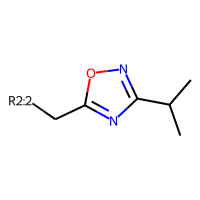
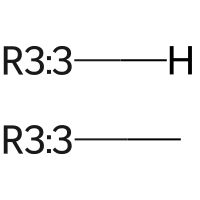
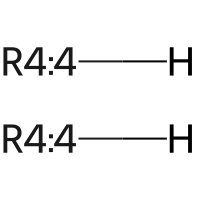
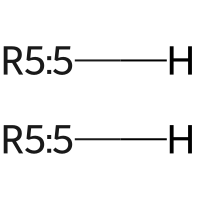
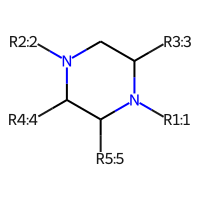
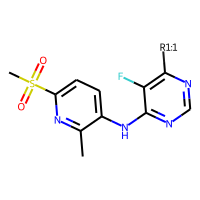
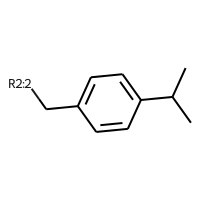
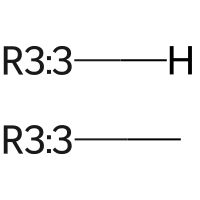
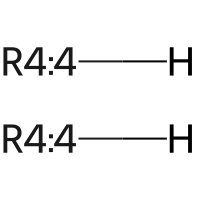
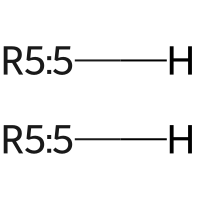
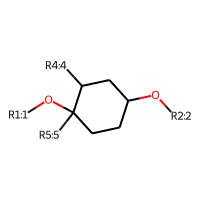
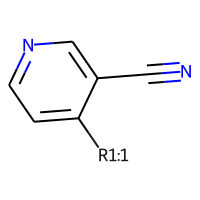
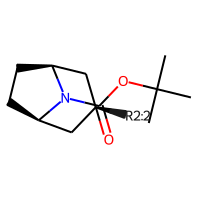
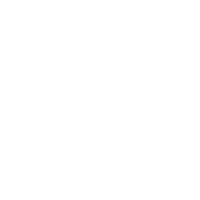
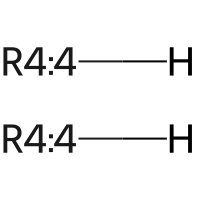
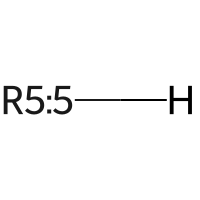
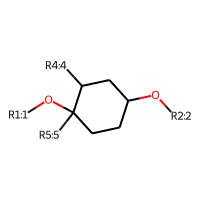
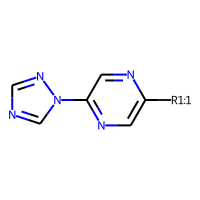
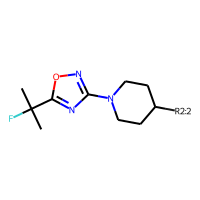
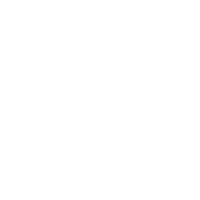
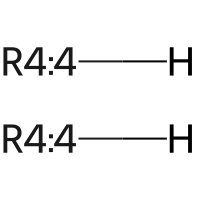
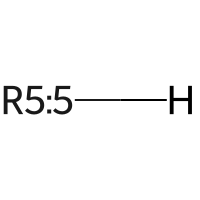
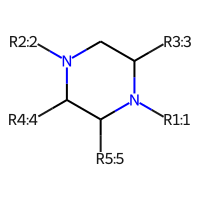
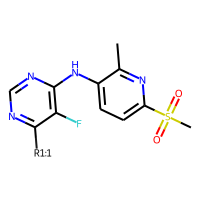
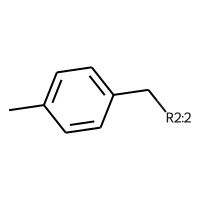
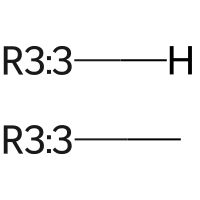
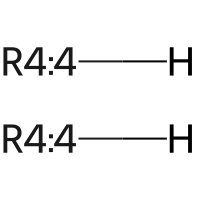
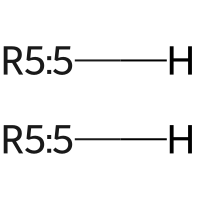

In [6]:
df_top = df.head(100)
PandasTools.ChangeMoleculeRendering(df_top)
HTML(df_top.to_html())

Now using 5 parallel runs of the GA we get a score of -0.946.  Slightly better than GreedyChunks, though at a much higher CPU cost.  This seems typical for the GA.

In [7]:
options.matchingStrategy = RGroupMatching.GA
options.gaNumberRuns = 5
options.gaParallelRuns = True
df = decompose(options)

Added cores


RDKix ERROR: [20:50:18] SMILES Parse Error: syntax error while parsing: SMILES
RDKix ERROR: [20:50:18] SMILES Parse Error: Failed parsing SMILES 'SMILES' for input: 'SMILES'


Added 70 of 100
Added 125 of 200
Added 171 of 300
Added 207 of 400
Added 241 of 500
Added 280 of 600
Added 321 of 700
Added 360 of 800
Added 409 of 900
Added 447 of 1000
Added 502 of 1100
Added 547 of 1200
Added 598 of 1300
Added 641 of 1400
Added 696 of 1500
Added 746 of 1600
Added 795 of 1700
Added 833 of 1800
Added 851 of 1900
Added 869 of 2000
Added 888 of 2100
Added 897 to RGroup Decomposition out of 2159


RDKix INFO: [20:50:21] GA RNG seed 5489
RDKix INFO: [20:50:21] Running GA run  1 number operations 1000000 population size   189 number operations without improvement  7500 chromosome length   898 Time    0.00
RDKix INFO: [20:50:21] Running GA run  2 number operations 1000000 population size   189 number operations without improvement  7500 chromosome length   898 Time    0.00
RDKix INFO: [20:50:21] Running GA run  4 number operations 1000000 population size   189 number operations without improvement  7500 chromosome length   898 Time    0.00
RDKix INFO: [20:50:21] Running GA run  3 number operations 1000000 population size   189 number operations without improvement  7500 chromosome length   898 Time    0.00
RDKix INFO: [20:50:21] Running GA run  5 number operations 1000000 population size   189 number operations without improvement  7500 chromosome length   898 Time    0.00
RDKix INFO: [20:50:21] Running GA run  1 number operations 1000000 population size   189 number operations wit

RDKix INFO: [20:50:25] Run  3 OP  2180 Fit  -1.109 Time   16.47
RDKix INFO: [20:50:25] Run  2 OP  2170 Fit  -1.109 Time   16.62
RDKix INFO: [20:50:25] Run  3 OP  2198 Fit  -1.108 Time   16.62
RDKix INFO: [20:50:25] Run  5 OP  2155 Fit  -1.111 Time   16.92
RDKix INFO: [20:50:25] Run  5 OP  2163 Fit  -1.111 Time   16.92
RDKix INFO: [20:50:25] Run  5 OP  2164 Fit  -1.111 Time   16.97
RDKix INFO: [20:50:25] Run  5 OP  2177 Fit  -1.110 Time   17.07
RDKix INFO: [20:50:25] Run  2 OP  2262 Fit  -1.108 Time   17.08
RDKix INFO: [20:50:25] Run  1 OP  2231 Fit  -1.109 Time   17.09
RDKix INFO: [20:50:25] Run  3 OP  2367 Fit  -1.108 Time   17.37
RDKix INFO: [20:50:25] Run  3 OP  2369 Fit  -1.108 Time   17.37
RDKix INFO: [20:50:25] Run  1 OP  2295 Fit  -1.108 Time   17.43
RDKix INFO: [20:50:25] Run  5 OP  2242 Fit  -1.110 Time   17.47
RDKix INFO: [20:50:25] Run  2 OP  2351 Fit  -1.108 Time   17.47
RDKix INFO: [20:50:25] Run  2 OP  2352 Fit  -1.108 Time   17.48
RDKix INFO: [20:50:25] Run  5 OP  2270 F

RDKix INFO: [20:50:27] Run  2 OP  4148 Fit  -1.103 Time   26.56
RDKix INFO: [20:50:27] Run  5 OP  3963 Fit  -1.103 Time   26.66
RDKix INFO: [20:50:27] Run  1 OP  4046 Fit  -1.104 Time   26.71
RDKix INFO: [20:50:27] Run  1 OP  4056 Fit  -1.104 Time   26.76
RDKix INFO: [20:50:27] Run  3 OP  4125 Fit  -1.102 Time   26.81
RDKix INFO: [20:50:27] Run 5 Op  4000 Fit  -1.103 Added  5039 Dups   172 Niche     0 Fail    0 Time   26.85
RDKix INFO: [20:50:27] Run  5 OP  4015 Fit  -1.103 Time   26.96
RDKix INFO: [20:50:27] Run  4 OP  4218 Fit  -1.104 Time   27.11
RDKix INFO: [20:50:27] Run  1 OP  4120 Fit  -1.103 Time   27.16
RDKix INFO: [20:50:27] Run  5 OP  4080 Fit  -1.103 Time   27.21
RDKix INFO: [20:50:27] Run  2 OP  4297 Fit  -1.103 Time   27.56
RDKix INFO: [20:50:27] Run  3 OP  4294 Fit  -1.102 Time   27.56
RDKix INFO: [20:50:27] Run  2 OP  4316 Fit  -1.102 Time   27.71
RDKix INFO: [20:50:28] Run  2 OP  4323 Fit  -1.102 Time   27.76
RDKix INFO: [20:50:28] Run  2 OP  4341 Fit  -1.102 Time   27

RDKix INFO: [20:50:29] Run  1 OP  5890 Fit  -1.098 Time   37.14
RDKix INFO: [20:50:29] Run  4 OP  6060 Fit  -1.099 Time   37.29
RDKix INFO: [20:50:29] Run  1 OP  5932 Fit  -1.098 Time   37.34
RDKix INFO: [20:50:29] Run  3 OP  6259 Fit  -1.097 Time   37.39
RDKix INFO: [20:50:29] Run  5 OP  5931 Fit  -1.097 Time   37.49
RDKix INFO: [20:50:29] Run  5 OP  5933 Fit  -1.097 Time   37.49
RDKix INFO: [20:50:29] Run  4 OP  6106 Fit  -1.099 Time   37.54
RDKix INFO: [20:50:29] Run  5 OP  5958 Fit  -1.097 Time   37.59
RDKix INFO: [20:50:29] Run 1 Op  6000 Fit  -1.098 Added  7361 Dups   361 Niche     0 Fail    0 Time   37.60
RDKix INFO: [20:50:29] Run  1 OP  6007 Fit  -1.097 Time   37.65
RDKix INFO: [20:50:30] Run 5 Op  6000 Fit  -1.097 Added  7427 Dups   289 Niche     0 Fail    0 Time   37.79
RDKix INFO: [20:50:30] Run  3 OP  6328 Fit  -1.097 Time   37.85
RDKix INFO: [20:50:30] Run  5 OP  6088 Fit  -1.097 Time   38.19
RDKix INFO: [20:50:30] Run  4 OP  6221 Fit  -1.098 Time   38.20
RDKix INFO: [20:

RDKix INFO: [20:50:32] Run  2 OP  8252 Fit  -1.086 Time   48.43
RDKix INFO: [20:50:32] Run  1 OP  8012 Fit  -1.091 Time   48.53
RDKix INFO: [20:50:32] Run  2 OP  8284 Fit  -1.086 Time   48.53
RDKix INFO: [20:50:32] Run  3 OP  8460 Fit  -1.088 Time   48.58
RDKix INFO: [20:50:32] Run  1 OP  8063 Fit  -1.091 Time   48.88
RDKix INFO: [20:50:32] Run  1 OP  8070 Fit  -1.090 Time   48.88
RDKix INFO: [20:50:32] Run  3 OP  8510 Fit  -1.088 Time   48.88
RDKix INFO: [20:50:32] Run  5 OP  8120 Fit  -1.090 Time   48.98
RDKix INFO: [20:50:32] Run  1 OP  8102 Fit  -1.090 Time   49.03
RDKix INFO: [20:50:32] Run  5 OP  8147 Fit  -1.089 Time   49.07
RDKix INFO: [20:50:32] Run  5 OP  8152 Fit  -1.089 Time   49.12
RDKix INFO: [20:50:32] Run  5 OP  8175 Fit  -1.088 Time   49.18
RDKix INFO: [20:50:32] Run  2 OP  8393 Fit  -1.086 Time   49.23
RDKix INFO: [20:50:32] Run  3 OP  8605 Fit  -1.088 Time   49.38
RDKix INFO: [20:50:32] Run  2 OP  8430 Fit  -1.086 Time   49.48
RDKix INFO: [20:50:32] Run  4 OP  8374 F

RDKix INFO: [20:50:34] Run  4 OP 10033 Fit  -1.089 Time   59.21
RDKix INFO: [20:50:34] Run  4 OP 10038 Fit  -1.088 Time   59.26
RDKix INFO: [20:50:34] Run  2 OP 10209 Fit  -1.066 Time   59.31
RDKix INFO: [20:50:34] Run  3 OP 10604 Fit  -1.078 Time   59.41
RDKix INFO: [20:50:34] Run  2 OP 10242 Fit  -1.066 Time   59.42
RDKix INFO: [20:50:34] Run  4 OP 10076 Fit  -1.088 Time   59.46
RDKix INFO: [20:50:34] Run  5 OP 10159 Fit  -1.078 Time   59.51
RDKix INFO: [20:50:34] Run  1 OP 10150 Fit  -1.085 Time   59.52
RDKix INFO: [20:50:34] Run  1 OP 10180 Fit  -1.085 Time   59.62
RDKix INFO: [20:50:34] Run  1 OP 10197 Fit  -1.085 Time   59.72
RDKix INFO: [20:50:34] Run  4 OP 10130 Fit  -1.088 Time   59.77
RDKix INFO: [20:50:34] Run  1 OP 10215 Fit  -1.084 Time   59.82
RDKix INFO: [20:50:34] Run  5 OP 10246 Fit  -1.078 Time   59.91
RDKix INFO: [20:50:34] Run  2 OP 10341 Fit  -1.066 Time   60.02
RDKix INFO: [20:50:34] Run  3 OP 10746 Fit  -1.077 Time   60.07
RDKix INFO: [20:50:34] Run  2 OP 10386 F

RDKix INFO: [20:50:36] Run  3 OP 12590 Fit  -1.070 Time   70.00
RDKix INFO: [20:50:36] Run  3 OP 12605 Fit  -1.062 Time   70.10
RDKix INFO: [20:50:36] Run  4 OP 12057 Fit  -1.082 Time   70.26
RDKix INFO: [20:50:36] Run  3 OP 12680 Fit  -1.062 Time   70.50
RDKix INFO: [20:50:36] Run  2 OP 12451 Fit  -1.064 Time   70.65
RDKix INFO: [20:50:36] Run  4 OP 12116 Fit  -1.082 Time   70.65
RDKix INFO: [20:50:36] Run  4 OP 12140 Fit  -1.082 Time   70.75
RDKix INFO: [20:50:36] Run  4 OP 12187 Fit  -1.081 Time   70.96
RDKix INFO: [20:50:36] Run  1 OP 12312 Fit  -1.075 Time   70.97
RDKix INFO: [20:50:36] Run  4 OP 12191 Fit  -1.081 Time   71.00
RDKix INFO: [20:50:36] Run  2 OP 12528 Fit  -1.064 Time   71.01
RDKix INFO: [20:50:36] Run  5 OP 12384 Fit  -1.064 Time   71.30
RDKix INFO: [20:50:36] Run  5 OP 12401 Fit  -1.064 Time   71.36
RDKix INFO: [20:50:36] Run  2 OP 12611 Fit  -1.064 Time   71.37
RDKix INFO: [20:50:36] Run  2 OP 12638 Fit  -1.064 Time   71.51
RDKix INFO: [20:50:36] Run  5 OP 12464 F

RDKix INFO: [20:50:38] Run  4 OP 14413 Fit  -1.073 Time   82.84
RDKix INFO: [20:50:38] Run  2 OP 14770 Fit  -1.061 Time   82.90
RDKix INFO: [20:50:39] Run  5 OP 14503 Fit  -1.061 Time   82.99
RDKix INFO: [20:50:39] Run  1 OP 14535 Fit  -1.072 Time   83.10
RDKix INFO: [20:50:39] Run  4 OP 14457 Fit  -1.073 Time   83.10
RDKix INFO: [20:50:39] Run  3 OP 15071 Fit  -1.060 Time   83.19
RDKix INFO: [20:50:39] Run  1 OP 14560 Fit  -1.071 Time   83.24
RDKix INFO: [20:50:39] Run  3 OP 15103 Fit  -1.059 Time   83.29
RDKix INFO: [20:50:39] Run  1 OP 14571 Fit  -1.071 Time   83.34
RDKix INFO: [20:50:39] Run  3 OP 15165 Fit  -1.059 Time   83.54
RDKix INFO: [20:50:39] Run  5 OP 14599 Fit  -1.061 Time   83.59
RDKix INFO: [20:50:39] Run  5 OP 14600 Fit  -1.061 Time   83.59
RDKix INFO: [20:50:39] Run  1 OP 14651 Fit  -1.071 Time   83.70
RDKix INFO: [20:50:39] Run  2 OP 14941 Fit  -1.061 Time   83.79
RDKix INFO: [20:50:39] Run  2 OP 14949 Fit  -1.060 Time   83.84
RDKix INFO: [20:50:39] Run  1 OP 14699 F

RDKix INFO: [20:50:41] Run  5 OP 16683 Fit  -1.058 Time   95.03
RDKix INFO: [20:50:41] Run  2 OP 17004 Fit  -1.057 Time   95.05
RDKix INFO: [20:50:41] Run  3 OP 17243 Fit  -1.056 Time   95.18
RDKix INFO: [20:50:41] Run  2 OP 17031 Fit  -1.057 Time   95.19
RDKix INFO: [20:50:41] Run  5 OP 16724 Fit  -1.058 Time   95.28
RDKix INFO: [20:50:41] Run  3 OP 17291 Fit  -1.056 Time   95.43
RDKix INFO: [20:50:41] Run  3 OP 17295 Fit  -1.056 Time   95.44
RDKix INFO: [20:50:41] Run  5 OP 16763 Fit  -1.058 Time   95.48
RDKix INFO: [20:50:41] Run  1 OP 16880 Fit  -1.057 Time   95.49
RDKix INFO: [20:50:41] Run  3 OP 17313 Fit  -1.056 Time   95.53
RDKix INFO: [20:50:41] Run  5 OP 16782 Fit  -1.058 Time   95.63
RDKix INFO: [20:50:41] Run  4 OP 16803 Fit  -1.064 Time   95.73
RDKix INFO: [20:50:41] Run  2 OP 17169 Fit  -1.056 Time   95.74
RDKix INFO: [20:50:41] Run  2 OP 17204 Fit  -1.056 Time   95.84
RDKix INFO: [20:50:41] Run 1 Op 17000 Fit  -1.057 Added 20481 Dups   984 Niche     0 Fail    0 Time   96

RDKix INFO: [20:50:43] Run  1 OP 18763 Fit  -1.053 Time  105.52
RDKix INFO: [20:50:43] Run  3 OP 19165 Fit  -1.052 Time  105.52
RDKix INFO: [20:50:43] Run  5 OP 18731 Fit  -1.054 Time  105.87
RDKix INFO: [20:50:43] Run  5 OP 18750 Fit  -1.054 Time  105.92
RDKix INFO: [20:50:43] Run  5 OP 18764 Fit  -1.054 Time  105.97
RDKix INFO: [20:50:43] Run  1 OP 18916 Fit  -1.053 Time  106.22
RDKix INFO: [20:50:43] Run  3 OP 19316 Fit  -1.052 Time  106.37
RDKix INFO: [20:50:43] Run 1 Op 19000 Fit  -1.053 Added 22865 Dups  1092 Niche     0 Fail    0 Time  106.57
RDKix INFO: [20:50:43] Run  1 OP 19029 Fit  -1.053 Time  106.72
RDKix INFO: [20:50:43] Run  1 OP 19034 Fit  -1.053 Time  106.73
RDKix INFO: [20:50:43] Run  2 OP 19216 Fit  -1.051 Time  106.77
RDKix INFO: [20:50:43] Run  1 OP 19038 Fit  -1.053 Time  106.78
RDKix INFO: [20:50:43] Run  5 OP 18906 Fit  -1.054 Time  106.78
RDKix INFO: [20:50:43] Run  2 OP 19264 Fit  -1.051 Time  107.08
RDKix INFO: [20:50:43] Run 4 Op 19000 Fit  -1.057 Added 2313

RDKix INFO: [20:50:45] Run  2 OP 21221 Fit  -1.047 Time  117.71
RDKix INFO: [20:50:45] Run  1 OP 21154 Fit  -1.048 Time  117.76
RDKix INFO: [20:50:45] Run  1 OP 21176 Fit  -1.048 Time  117.86
RDKix INFO: [20:50:46] Run  3 OP 21479 Fit  -1.049 Time  118.21
RDKix INFO: [20:50:46] Run  4 OP 21136 Fit  -1.052 Time  118.31
RDKix INFO: [20:50:46] Run  4 OP 21137 Fit  -1.050 Time  118.31
RDKix INFO: [20:50:46] Run 5 Op 21000 Fit  -1.050 Added 25373 Dups  1091 Niche     0 Fail    0 Time  118.40
RDKix INFO: [20:50:46] Run  1 OP 21283 Fit  -1.048 Time  118.42
RDKix INFO: [20:50:46] Run  1 OP 21319 Fit  -1.047 Time  118.57
RDKix INFO: [20:50:46] Run  5 OP 21050 Fit  -1.050 Time  118.61
RDKix INFO: [20:50:46] Run  3 OP 21586 Fit  -1.049 Time  118.96
RDKix INFO: [20:50:46] Run  5 OP 21128 Fit  -1.050 Time  118.96
RDKix INFO: [20:50:46] Run  3 OP 21596 Fit  -1.048 Time  118.97
RDKix INFO: [20:50:46] Run  5 OP 21145 Fit  -1.050 Time  119.06
RDKix INFO: [20:50:46] Run  4 OP 21286 Fit  -1.050 Time  119

RDKix INFO: [20:50:48] Run  3 OP 24096 Fit  -1.044 Time  132.20
RDKix INFO: [20:50:48] Run  4 OP 23732 Fit  -1.041 Time  132.21
RDKix INFO: [20:50:48] Run  4 OP 23773 Fit  -1.040 Time  132.50
RDKix INFO: [20:50:48] Run  4 OP 23812 Fit  -1.040 Time  132.65
RDKix INFO: [20:50:48] Run  3 OP 24211 Fit  -1.043 Time  132.65
RDKix INFO: [20:50:48] Run  3 OP 24227 Fit  -1.043 Time  132.75
RDKix INFO: [20:50:48] Run  3 OP 24229 Fit  -1.043 Time  132.75
RDKix INFO: [20:50:48] Run  1 OP 24175 Fit  -1.044 Time  132.80
RDKix INFO: [20:50:48] Run  5 OP 23651 Fit  -1.046 Time  132.80
RDKix INFO: [20:50:48] Run  5 OP 23669 Fit  -1.045 Time  132.84
RDKix INFO: [20:50:49] Run  4 OP 23908 Fit  -1.040 Time  133.10
RDKix INFO: [20:50:49] Run  2 OP 24183 Fit  -1.044 Time  133.20
RDKix INFO: [20:50:49] Run  4 OP 23931 Fit  -1.040 Time  133.30
RDKix INFO: [20:50:49] Run  1 OP 24267 Fit  -1.044 Time  133.31
RDKix INFO: [20:50:49] Run  5 OP 23751 Fit  -1.045 Time  133.31
RDKix INFO: [20:50:49] Run  4 OP 23974 F

RDKix INFO: [20:50:52] Run  1 OP 26987 Fit  -1.041 Time  148.20
RDKix INFO: [20:50:52] Run  1 OP 26992 Fit  -1.041 Time  148.20
RDKix INFO: [20:50:52] Run 1 Op 27000 Fit  -1.041 Added 32297 Dups  1623 Niche     0 Fail    0 Time  148.25
RDKix INFO: [20:50:52] Run  1 OP 27006 Fit  -1.041 Time  148.30
RDKix INFO: [20:50:52] Run  2 OP 27122 Fit  -1.040 Time  148.49
RDKix INFO: [20:50:52] Run  4 OP 26791 Fit  -1.038 Time  148.55
RDKix INFO: [20:50:52] Run  4 OP 26853 Fit  -1.038 Time  148.90
RDKix INFO: [20:50:52] Run  3 OP 27279 Fit  -1.038 Time  148.95
RDKix INFO: [20:50:52] Run  1 OP 27162 Fit  -1.041 Time  149.05
RDKix INFO: [20:50:52] Run  3 OP 27305 Fit  -1.038 Time  149.06
RDKix INFO: [20:50:52] Run  3 OP 27310 Fit  -1.038 Time  149.09
RDKix INFO: [20:50:52] Run  5 OP 26845 Fit  -1.039 Time  149.20
RDKix INFO: [20:50:52] Run  4 OP 26919 Fit  -1.038 Time  149.24
RDKix INFO: [20:50:52] Run  5 OP 26897 Fit  -1.038 Time  149.50
RDKix INFO: [20:50:52] Run 4 Op 27000 Fit  -1.038 Added 3255

RDKix INFO: [20:50:54] Run  5 OP 29053 Fit  -1.033 Time  161.18
RDKix INFO: [20:50:54] Run  1 OP 29451 Fit  -1.039 Time  161.24
RDKix INFO: [20:50:54] Run  4 OP 29273 Fit  -1.036 Time  161.39
RDKix INFO: [20:50:54] Run  1 OP 29485 Fit  -1.039 Time  161.40
RDKix INFO: [20:50:54] Run  2 OP 29575 Fit  -1.038 Time  161.43
RDKix INFO: [20:50:54] Run  5 OP 29161 Fit  -1.033 Time  161.73
RDKix INFO: [20:50:54] Run  2 OP 29645 Fit  -1.038 Time  161.78
RDKix INFO: [20:50:54] Run  4 OP 29342 Fit  -1.035 Time  161.79
RDKix INFO: [20:50:54] Run  2 OP 29670 Fit  -1.038 Time  161.93
RDKix INFO: [20:50:54] Run  1 OP 29606 Fit  -1.039 Time  161.94
RDKix INFO: [20:50:54] Run  1 OP 29623 Fit  -1.039 Time  161.99
RDKix INFO: [20:50:54] Run  4 OP 29394 Fit  -1.035 Time  162.08
RDKix INFO: [20:50:54] Run  2 OP 29706 Fit  -1.038 Time  162.14
RDKix INFO: [20:50:54] Run  3 OP 29694 Fit  -1.034 Time  162.24
RDKix INFO: [20:50:54] Run  3 OP 29729 Fit  -1.033 Time  162.39
RDKix INFO: [20:50:54] Run  1 OP 29765 F

RDKix INFO: [20:50:56] Run  4 OP 31330 Fit  -1.033 Time  172.12
RDKix INFO: [20:50:56] Run  5 OP 31025 Fit  -1.030 Time  172.13
RDKix INFO: [20:50:56] Run  5 OP 31036 Fit  -1.029 Time  172.17
RDKix INFO: [20:50:56] Run  2 OP 31647 Fit  -1.036 Time  172.32
RDKix INFO: [20:50:56] Run  2 OP 31651 Fit  -1.036 Time  172.33
RDKix INFO: [20:50:56] Run  3 OP 31652 Fit  -1.029 Time  172.52
RDKix INFO: [20:50:56] Run  4 OP 31436 Fit  -1.033 Time  172.77
RDKix INFO: [20:50:56] Run  2 OP 31768 Fit  -1.036 Time  172.87
RDKix INFO: [20:50:56] Run  4 OP 31470 Fit  -1.033 Time  172.97
RDKix INFO: [20:50:56] Run  4 OP 31480 Fit  -1.033 Time  173.07
RDKix INFO: [20:50:56] Run  1 OP 31659 Fit  -1.038 Time  173.13
RDKix INFO: [20:50:56] Run  5 OP 31218 Fit  -1.028 Time  173.13
RDKix INFO: [20:50:56] Run  1 OP 31678 Fit  -1.038 Time  173.18
RDKix INFO: [20:50:57] Run  3 OP 31793 Fit  -1.028 Time  173.27
RDKix INFO: [20:50:57] Run  1 OP 31721 Fit  -1.038 Time  173.42
RDKix INFO: [20:50:57] Run  1 OP 31751 F

RDKix INFO: [20:50:59] Run  2 OP 34088 Fit  -1.033 Time  184.71
RDKix INFO: [20:50:59] Run  3 OP 34078 Fit  -1.025 Time  185.12
RDKix INFO: [20:50:59] Run  2 OP 34203 Fit  -1.033 Time  185.21
RDKix INFO: [20:50:59] Run  2 OP 34225 Fit  -1.033 Time  185.36
RDKix INFO: [20:50:59] Run 1 Op 34000 Fit  -1.035 Added 40693 Dups  1973 Niche     0 Fail    0 Time  185.42
RDKix INFO: [20:50:59] Run  4 OP 33886 Fit  -1.030 Time  185.47
RDKix INFO: [20:50:59] Run  4 OP 33892 Fit  -1.029 Time  185.51
RDKix INFO: [20:50:59] Run  3 OP 34208 Fit  -1.024 Time  185.86
RDKix INFO: [20:50:59] Run  4 OP 33950 Fit  -1.029 Time  185.92
RDKix INFO: [20:50:59] Run 4 Op 34000 Fit  -1.029 Added 40904 Dups  1873 Niche     0 Fail    0 Time  186.16
RDKix INFO: [20:50:59] Run  1 OP 34147 Fit  -1.035 Time  186.32
RDKix INFO: [20:50:59] Run  2 OP 34394 Fit  -1.033 Time  186.36
RDKix INFO: [20:50:59] Run  4 OP 34045 Fit  -1.029 Time  186.37
RDKix INFO: [20:50:59] Run  1 OP 34162 Fit  -1.035 Time  186.42
RDKix INFO: [20:

RDKix INFO: [20:51:02] Run  4 OP 36430 Fit  -1.026 Time  198.51
RDKix INFO: [20:51:02] Run  1 OP 36561 Fit  -1.032 Time  198.56
RDKix INFO: [20:51:02] Run  5 OP 36025 Fit  -1.017 Time  198.66
RDKix INFO: [20:51:02] Run  2 OP 36806 Fit  -1.030 Time  198.86
RDKix INFO: [20:51:02] Run  2 OP 36820 Fit  -1.029 Time  198.96
RDKix INFO: [20:51:02] Run  3 OP 36647 Fit  -1.018 Time  199.16
RDKix INFO: [20:51:02] Run  4 OP 36623 Fit  -1.026 Time  199.36
RDKix INFO: [20:51:02] Run  4 OP 36651 Fit  -1.025 Time  199.61
RDKix INFO: [20:51:02] Run  5 OP 36179 Fit  -1.017 Time  199.66
RDKix INFO: [20:51:02] Run  1 OP 36752 Fit  -1.032 Time  199.71
RDKix INFO: [20:51:02] Run  3 OP 36775 Fit  -1.018 Time  199.86
RDKix INFO: [20:51:02] Run  1 OP 36789 Fit  -1.032 Time  199.91
RDKix INFO: [20:51:02] Run  4 OP 36709 Fit  -1.025 Time  199.96
RDKix INFO: [20:51:02] Run  4 OP 36714 Fit  -1.025 Time  200.01
RDKix INFO: [20:51:02] Run 2 Op 37000 Fit  -1.029 Added 44283 Dups  2101 Niche     0 Fail    0 Time  200

RDKix INFO: [20:51:04] Run  3 OP 39012 Fit  -1.014 Time  211.60
RDKix INFO: [20:51:04] Run  3 OP 39013 Fit  -1.014 Time  211.60
RDKix INFO: [20:51:04] Run  5 OP 38519 Fit  -1.013 Time  211.65
RDKix INFO: [20:51:04] Run  3 OP 39061 Fit  -1.013 Time  211.95
RDKix INFO: [20:51:04] Run 1 Op 39000 Fit  -1.029 Added 46630 Dups  2280 Niche     0 Fail    0 Time  212.00
RDKix INFO: [20:51:04] Run  3 OP 39080 Fit  -1.013 Time  212.10
RDKix INFO: [20:51:04] Run 4 Op 39000 Fit  -1.022 Added 46861 Dups  2136 Niche     0 Fail    0 Time  212.15
RDKix INFO: [20:51:04] Run  1 OP 39083 Fit  -1.029 Time  212.51
RDKix INFO: [20:51:04] Run  5 OP 38686 Fit  -1.013 Time  212.55
RDKix INFO: [20:51:04] Run  2 OP 39328 Fit  -1.026 Time  212.60
RDKix INFO: [20:51:04] Run  2 OP 39356 Fit  -1.026 Time  212.76
RDKix INFO: [20:51:04] Run  4 OP 39133 Fit  -1.022 Time  212.80
RDKix INFO: [20:51:04] Run  1 OP 39168 Fit  -1.029 Time  212.86
RDKix INFO: [20:51:04] Run  2 OP 39406 Fit  -1.026 Time  213.05
RDKix INFO: [20:

RDKix INFO: [20:51:07] Run  5 OP 41014 Fit  -1.008 Time  225.69
RDKix INFO: [20:51:07] Run  2 OP 41666 Fit  -1.022 Time  225.69
RDKix INFO: [20:51:07] Run  3 OP 41759 Fit  -1.009 Time  225.89
RDKix INFO: [20:51:07] Run  5 OP 41044 Fit  -1.008 Time  225.89
RDKix INFO: [20:51:07] Run  2 OP 41718 Fit  -1.022 Time  225.99
RDKix INFO: [20:51:07] Run  2 OP 41728 Fit  -1.022 Time  226.04
RDKix INFO: [20:51:07] Run  1 OP 41507 Fit  -1.025 Time  226.05
RDKix INFO: [20:51:07] Run  4 OP 41600 Fit  -1.017 Time  226.19
RDKix INFO: [20:51:07] Run  2 OP 41775 Fit  -1.022 Time  226.20
RDKix INFO: [20:51:07] Run  2 OP 41818 Fit  -1.022 Time  226.39
RDKix INFO: [20:51:07] Run  2 OP 41823 Fit  -1.022 Time  226.39
RDKix INFO: [20:51:07] Run  2 OP 41843 Fit  -1.022 Time  226.54
RDKix INFO: [20:51:07] Run  3 OP 41881 Fit  -1.009 Time  226.65
RDKix INFO: [20:51:07] Run  1 OP 41590 Fit  -1.025 Time  226.70
RDKix INFO: [20:51:07] Run  5 OP 41223 Fit  -1.008 Time  226.75
RDKix INFO: [20:51:07] Run  4 OP 41770 F

RDKix INFO: [20:51:10] Run  2 OP 44047 Fit  -1.019 Time  238.54
RDKix INFO: [20:51:10] Run  4 OP 44036 Fit  -1.012 Time  238.73
RDKix INFO: [20:51:10] Run  2 OP 44088 Fit  -1.018 Time  238.74
RDKix INFO: [20:51:10] Run  3 OP 44151 Fit  -1.004 Time  238.78
RDKix INFO: [20:51:10] Run  2 OP 44161 Fit  -1.018 Time  239.19
RDKix INFO: [20:51:10] Run  4 OP 44130 Fit  -1.011 Time  239.24
RDKix INFO: [20:51:10] Run  1 OP 43993 Fit  -1.022 Time  239.34
RDKix INFO: [20:51:10] Run 1 Op 44000 Fit  -1.022 Added 52650 Dups  2532 Niche     0 Fail    0 Time  239.34
RDKix INFO: [20:51:10] Run  1 OP 44020 Fit  -1.022 Time  239.44
RDKix INFO: [20:51:10] Run  5 OP 43655 Fit  -1.002 Time  239.54
RDKix INFO: [20:51:10] Run  2 OP 44251 Fit  -1.018 Time  239.69
RDKix INFO: [20:51:10] Run  5 OP 43701 Fit  -1.002 Time  239.79
RDKix INFO: [20:51:10] Run  3 OP 44354 Fit  -1.004 Time  239.84
RDKix INFO: [20:51:10] Run  4 OP 44275 Fit  -1.011 Time  239.99
RDKix INFO: [20:51:10] Run  3 OP 44399 Fit  -1.003 Time  240

RDKix INFO: [20:51:12] Run  1 OP 46327 Fit  -1.018 Time  251.83
RDKix INFO: [20:51:12] Run  4 OP 46470 Fit  -1.008 Time  251.88
RDKix INFO: [20:51:12] Run  5 OP 46100 Fit  -0.997 Time  252.08
RDKix INFO: [20:51:12] Run  1 OP 46423 Fit  -1.018 Time  252.28
RDKix INFO: [20:51:12] Run  1 OP 46481 Fit  -1.017 Time  252.53
RDKix INFO: [20:51:12] Run  2 OP 46637 Fit  -1.014 Time  252.63
RDKix INFO: [20:51:12] Run  3 OP 46662 Fit  -0.998 Time  252.63
RDKix INFO: [20:51:12] Run  1 OP 46506 Fit  -1.017 Time  252.73
RDKix INFO: [20:51:12] Run  2 OP 46665 Fit  -1.014 Time  252.73
RDKix INFO: [20:51:12] Run  3 OP 46736 Fit  -0.998 Time  253.07
RDKix INFO: [20:51:12] Run  5 OP 46273 Fit  -0.997 Time  253.13
RDKix INFO: [20:51:12] Run  3 OP 46759 Fit  -0.997 Time  253.23
RDKix INFO: [20:51:12] Run  5 OP 46324 Fit  -0.997 Time  253.43
RDKix INFO: [20:51:13] Run  4 OP 46882 Fit  -1.008 Time  254.03
RDKix INFO: [20:51:13] Run  2 OP 46882 Fit  -1.013 Time  254.03
RDKix INFO: [20:51:13] Run  1 OP 46806 F

RDKix INFO: [20:51:15] Run  1 OP 48943 Fit  -1.013 Time  266.42
RDKix INFO: [20:51:15] Run  4 OP 49095 Fit  -1.004 Time  266.62
RDKix INFO: [20:51:15] Run  3 OP 49191 Fit  -0.994 Time  266.67
RDKix INFO: [20:51:15] Run  4 OP 49102 Fit  -1.004 Time  266.67
RDKix INFO: [20:51:15] Run 1 Op 49000 Fit  -1.013 Added 58605 Dups  2849 Niche     0 Fail    0 Time  266.69
RDKix INFO: [20:51:15] Run  3 OP 49201 Fit  -0.993 Time  266.73
RDKix INFO: [20:51:15] Run  4 OP 49149 Fit  -1.004 Time  266.92
RDKix INFO: [20:51:15] Run  5 OP 48662 Fit  -0.993 Time  266.98
RDKix INFO: [20:51:15] Run  1 OP 49099 Fit  -1.013 Time  267.32
RDKix INFO: [20:51:15] Run  1 OP 49100 Fit  -1.013 Time  267.33
RDKix INFO: [20:51:15] Run  5 OP 48742 Fit  -0.992 Time  267.48
RDKix INFO: [20:51:15] Run  4 OP 49246 Fit  -1.004 Time  267.53
RDKix INFO: [20:51:15] Run  5 OP 48763 Fit  -0.992 Time  267.57
RDKix INFO: [20:51:15] Run  1 OP 49285 Fit  -1.013 Time  268.18
RDKix INFO: [20:51:15] Run  2 OP 49453 Fit  -1.009 Time  268

RDKix INFO: [20:51:18] Run  5 OP 51057 Fit  -0.987 Time  280.32
RDKix INFO: [20:51:18] Run  3 OP 51684 Fit  -0.990 Time  280.37
RDKix INFO: [20:51:18] Run  1 OP 51636 Fit  -1.009 Time  280.39
RDKix INFO: [20:51:18] Run  5 OP 51094 Fit  -0.987 Time  280.57
RDKix INFO: [20:51:18] Run  2 OP 51756 Fit  -1.005 Time  280.62
RDKix INFO: [20:51:18] Run  5 OP 51111 Fit  -0.987 Time  280.63
RDKix INFO: [20:51:18] Run  2 OP 51787 Fit  -1.005 Time  280.72
RDKix INFO: [20:51:18] Run  1 OP 51712 Fit  -1.009 Time  280.92
RDKix INFO: [20:51:18] Run  3 OP 51822 Fit  -0.989 Time  281.07
RDKix INFO: [20:51:18] Run  4 OP 51980 Fit  -0.999 Time  281.27
RDKix INFO: [20:51:18] Run  1 OP 51760 Fit  -1.009 Time  281.28
RDKix INFO: [20:51:18] Run  5 OP 51206 Fit  -0.987 Time  281.28
RDKix INFO: [20:51:18] Run 4 Op 52000 Fit  -0.999 Added 62364 Dups  2828 Niche     0 Fail    0 Time  281.42
RDKix INFO: [20:51:18] Run  1 OP 51803 Fit  -1.009 Time  281.47
RDKix INFO: [20:51:18] Run  2 OP 51922 Fit  -1.005 Time  281

RDKix INFO: [20:51:20] Run  1 OP 54064 Fit  -1.005 Time  293.43
RDKix INFO: [20:51:20] Run  4 OP 54438 Fit  -0.996 Time  293.43
RDKix INFO: [20:51:21] Run  1 OP 54121 Fit  -1.005 Time  293.72
RDKix INFO: [20:51:21] Run  4 OP 54523 Fit  -0.995 Time  293.76
RDKix INFO: [20:51:21] Run  1 OP 54136 Fit  -1.005 Time  293.83
RDKix INFO: [20:51:21] Run  5 OP 53678 Fit  -0.984 Time  294.01
RDKix INFO: [20:51:21] Run  3 OP 54255 Fit  -0.984 Time  294.07
RDKix INFO: [20:51:21] Run  1 OP 54194 Fit  -1.005 Time  294.27
RDKix INFO: [20:51:21] Run  4 OP 54597 Fit  -0.995 Time  294.28
RDKix INFO: [20:51:21] Run  1 OP 54212 Fit  -1.005 Time  294.43
RDKix INFO: [20:51:21] Run  1 OP 54217 Fit  -1.005 Time  294.47
RDKix INFO: [20:51:21] Run  4 OP 54638 Fit  -0.995 Time  294.57
RDKix INFO: [20:51:21] Run  1 OP 54255 Fit  -1.005 Time  294.67
RDKix INFO: [20:51:21] Run  5 OP 53818 Fit  -0.984 Time  294.77
RDKix INFO: [20:51:21] Run  3 OP 54372 Fit  -0.984 Time  294.82
RDKix INFO: [20:51:21] Run  1 OP 54272 F

RDKix INFO: [20:51:23] Run  5 OP 56239 Fit  -0.979 Time  308.01
RDKix INFO: [20:51:23] Run  3 OP 56761 Fit  -0.978 Time  308.16
RDKix INFO: [20:51:23] Run  4 OP 57249 Fit  -0.992 Time  308.26
RDKix INFO: [20:51:23] Run  2 OP 57082 Fit  -0.995 Time  308.26
RDKix INFO: [20:51:24] Run  1 OP 56865 Fit  -0.999 Time  308.81
RDKix INFO: [20:51:24] Run  4 OP 57350 Fit  -0.992 Time  308.82
RDKix INFO: [20:51:24] Run  4 OP 57412 Fit  -0.992 Time  309.21
RDKix INFO: [20:51:24] Run 3 Op 57000 Fit  -0.978 Added 68014 Dups  3274 Niche     0 Fail    0 Time  309.51
RDKix INFO: [20:51:24] Run  2 OP 57344 Fit  -0.995 Time  309.66
RDKix INFO: [20:51:24] Run  2 OP 57348 Fit  -0.995 Time  309.67
RDKix INFO: [20:51:24] Run 1 Op 57000 Fit  -0.999 Added 68168 Dups  3308 Niche     0 Fail    0 Time  309.76
RDKix INFO: [20:51:24] Run  3 OP 57057 Fit  -0.978 Time  309.77
RDKix INFO: [20:51:24] Run  2 OP 57375 Fit  -0.995 Time  309.81
RDKix INFO: [20:51:24] Run  3 OP 57071 Fit  -0.978 Time  309.86
RDKix INFO: [20:

RDKix INFO: [20:51:26] Run  2 OP 59886 Fit  -0.991 Time  323.11
RDKix INFO: [20:51:26] Run  4 OP 60010 Fit  -0.990 Time  323.15
RDKix INFO: [20:51:26] Run  3 OP 59633 Fit  -0.976 Time  323.20
RDKix INFO: [20:51:26] Run  3 OP 59638 Fit  -0.975 Time  323.25
RDKix INFO: [20:51:26] Run  4 OP 60034 Fit  -0.990 Time  323.26
RDKix INFO: [20:51:26] Run  5 OP 59100 Fit  -0.976 Time  323.30
RDKix INFO: [20:51:26] Run  4 OP 60068 Fit  -0.990 Time  323.40
RDKix INFO: [20:51:26] Run  4 OP 60113 Fit  -0.990 Time  323.51
RDKix INFO: [20:51:27] Run 2 Op 60000 Fit  -0.991 Added 71667 Dups  3487 Niche     0 Fail    0 Time  323.71
RDKix INFO: [20:51:27] Run  5 OP 59170 Fit  -0.976 Time  323.76
RDKix INFO: [20:51:27] Run  2 OP 60106 Fit  -0.991 Time  324.06
RDKix INFO: [20:51:27] Run  2 OP 60156 Fit  -0.991 Time  324.30
RDKix INFO: [20:51:27] Run  2 OP 60173 Fit  -0.990 Time  324.46
RDKix INFO: [20:51:27] Run  4 OP 60280 Fit  -0.990 Time  324.46
RDKix INFO: [20:51:27] Run  4 OP 60296 Fit  -0.990 Time  324

RDKix INFO: [20:51:29] Run  1 OP 62027 Fit  -0.991 Time  336.79
RDKix INFO: [20:51:29] Run  4 OP 62580 Fit  -0.988 Time  336.94
RDKix INFO: [20:51:29] Run  2 OP 62648 Fit  -0.987 Time  337.00
RDKix INFO: [20:51:29] Run  5 OP 61682 Fit  -0.973 Time  337.09
RDKix INFO: [20:51:29] Run  3 OP 62212 Fit  -0.973 Time  337.20
RDKix INFO: [20:51:29] Run  1 OP 62111 Fit  -0.991 Time  337.30
RDKix INFO: [20:51:29] Run  4 OP 62651 Fit  -0.988 Time  337.34
RDKix INFO: [20:51:29] Run  5 OP 61816 Fit  -0.973 Time  337.74
RDKix INFO: [20:51:29] Run  4 OP 62732 Fit  -0.988 Time  337.79
RDKix INFO: [20:51:29] Run  1 OP 62188 Fit  -0.991 Time  337.84
RDKix INFO: [20:51:29] Run  2 OP 62806 Fit  -0.987 Time  337.85
RDKix INFO: [20:51:29] Run  2 OP 62822 Fit  -0.987 Time  337.95
RDKix INFO: [20:51:29] Run  3 OP 62402 Fit  -0.972 Time  338.25
RDKix INFO: [20:51:29] Run  1 OP 62282 Fit  -0.991 Time  338.40
RDKix INFO: [20:51:29] Run  2 OP 62913 Fit  -0.987 Time  338.50
RDKix INFO: [20:51:29] Run  3 OP 62461 F

RDKix INFO: [20:51:32] Run  2 OP 65080 Fit  -0.983 Time  350.49
RDKix INFO: [20:51:32] Run  1 OP 64629 Fit  -0.986 Time  350.84
RDKix INFO: [20:51:32] Run  5 OP 64223 Fit  -0.970 Time  350.83
RDKix INFO: [20:51:32] Run  5 OP 64254 Fit  -0.970 Time  351.03
RDKix INFO: [20:51:32] Run  2 OP 65214 Fit  -0.983 Time  351.18
RDKix INFO: [20:51:32] Run  1 OP 64762 Fit  -0.986 Time  351.54
RDKix INFO: [20:51:32] Run  1 OP 64788 Fit  -0.986 Time  351.64
RDKix INFO: [20:51:32] Run  3 OP 64693 Fit  -0.970 Time  351.78
RDKix INFO: [20:51:32] Run  4 OP 65262 Fit  -0.985 Time  351.79
RDKix INFO: [20:51:32] Run  3 OP 64758 Fit  -0.970 Time  352.04
RDKix INFO: [20:51:32] Run  4 OP 65366 Fit  -0.985 Time  352.34
RDKix INFO: [20:51:32] Run  2 OP 65430 Fit  -0.983 Time  352.54
RDKix INFO: [20:51:32] Run  4 OP 65401 Fit  -0.985 Time  352.58
RDKix INFO: [20:51:32] Run  1 OP 64974 Fit  -0.986 Time  352.69
RDKix INFO: [20:51:32] Run  5 OP 64586 Fit  -0.970 Time  352.84
RDKix INFO: [20:51:32] Run  3 OP 64957 F

RDKix INFO: [20:51:34] Run  5 OP 66571 Fit  -0.967 Time  362.22
RDKix INFO: [20:51:34] Run  3 OP 66700 Fit  -0.967 Time  362.47
RDKix INFO: [20:51:34] Run  2 OP 67166 Fit  -0.979 Time  362.48
RDKix INFO: [20:51:34] Run  5 OP 66654 Fit  -0.967 Time  362.77
RDKix INFO: [20:51:34] Run  1 OP 66844 Fit  -0.983 Time  362.87
RDKix INFO: [20:51:34] Run  1 OP 66885 Fit  -0.983 Time  363.02
RDKix INFO: [20:51:34] Run  5 OP 66697 Fit  -0.967 Time  363.07
RDKix INFO: [20:51:34] Run  4 OP 67252 Fit  -0.983 Time  363.08
RDKix INFO: [20:51:34] Run  2 OP 67274 Fit  -0.979 Time  363.11
RDKix INFO: [20:51:34] Run  2 OP 67294 Fit  -0.979 Time  363.17
RDKix INFO: [20:51:34] Run  2 OP 67306 Fit  -0.979 Time  363.22
RDKix INFO: [20:51:34] Run  2 OP 67325 Fit  -0.978 Time  363.37
RDKix INFO: [20:51:34] Run  4 OP 67344 Fit  -0.983 Time  363.52
RDKix INFO: [20:51:34] Run 1 Op 67000 Fit  -0.983 Added 79974 Dups  4042 Niche     0 Fail    0 Time  363.57
RDKix INFO: [20:51:34] Run  1 OP 67022 Fit  -0.983 Time  363

RDKix INFO: [20:51:37] Run  2 OP 69746 Fit  -0.975 Time  376.20
RDKix INFO: [20:51:37] Run  5 OP 69048 Fit  -0.965 Time  376.20
RDKix INFO: [20:51:37] Run  2 OP 69758 Fit  -0.975 Time  376.31
RDKix INFO: [20:51:37] Run  4 OP 69607 Fit  -0.981 Time  376.41
RDKix INFO: [20:51:37] Run  3 OP 69314 Fit  -0.965 Time  376.65
RDKix INFO: [20:51:37] Run  4 OP 69690 Fit  -0.981 Time  376.86
RDKix INFO: [20:51:37] Run  4 OP 69722 Fit  -0.981 Time  377.01
RDKix INFO: [20:51:37] Run  3 OP 69419 Fit  -0.965 Time  377.16
RDKix INFO: [20:51:37] Run  1 OP 69595 Fit  -0.978 Time  377.41
RDKix INFO: [20:51:37] Run  1 OP 69600 Fit  -0.977 Time  377.46
RDKix INFO: [20:51:37] Run  2 OP 69981 Fit  -0.975 Time  377.61
RDKix INFO: [20:51:37] Run 2 Op 70000 Fit  -0.975 Added 83480 Dups  4225 Niche     0 Fail    0 Time  377.70
RDKix INFO: [20:51:37] Run  2 OP 70019 Fit  -0.975 Time  377.81
RDKix INFO: [20:51:37] Run  5 OP 69424 Fit  -0.965 Time  377.96
RDKix INFO: [20:51:37] Run  2 OP 70090 Fit  -0.975 Time  378

RDKix INFO: [20:51:40] Run  4 OP 72012 Fit  -0.979 Time  390.90
RDKix INFO: [20:51:40] Run  4 OP 72038 Fit  -0.979 Time  391.05
RDKix INFO: [20:51:40] Run  1 OP 72027 Fit  -0.975 Time  391.10
RDKix INFO: [20:51:40] Run  4 OP 72052 Fit  -0.979 Time  391.10
RDKix INFO: [20:51:40] Run  2 OP 72646 Fit  -0.972 Time  391.15
RDKix INFO: [20:51:40] Run  3 OP 71821 Fit  -0.962 Time  391.45
RDKix INFO: [20:51:40] Run  5 OP 71906 Fit  -0.962 Time  391.50
RDKix INFO: [20:51:40] Run  1 OP 72102 Fit  -0.975 Time  391.51
RDKix INFO: [20:51:40] Run  4 OP 72152 Fit  -0.979 Time  391.65
RDKix INFO: [20:51:40] Run  4 OP 72199 Fit  -0.979 Time  391.90
RDKix INFO: [20:51:40] Run  2 OP 72801 Fit  -0.972 Time  392.15
RDKix INFO: [20:51:40] Run 5 Op 72000 Fit  -0.962 Added 85685 Dups  4500 Niche     0 Fail    0 Time  392.15
RDKix INFO: [20:51:40] Run 3 Op 72000 Fit  -0.962 Added 85702 Dups  4292 Niche     0 Fail    0 Time  392.36
RDKix INFO: [20:51:40] Run  1 OP 72292 Fit  -0.974 Time  392.70
RDKix INFO: [20:

RDKix INFO: [20:51:43] Run  3 OP 74832 Fit  -0.960 Time  408.40
RDKix INFO: [20:51:43] Run  4 OP 75103 Fit  -0.976 Time  408.75
RDKix INFO: [20:51:43] Run  4 OP 75126 Fit  -0.976 Time  408.85
RDKix INFO: [20:51:43] Run  5 OP 75088 Fit  -0.959 Time  408.85
RDKix INFO: [20:51:43] Run  3 OP 74919 Fit  -0.960 Time  408.90
RDKix INFO: [20:51:44] Run  1 OP 75270 Fit  -0.972 Time  408.95
RDKix INFO: [20:51:44] Run  4 OP 75165 Fit  -0.976 Time  408.95
RDKix INFO: [20:51:44] Run  2 OP 75735 Fit  -0.969 Time  409.05
RDKix INFO: [20:51:44] Run  2 OP 75767 Fit  -0.969 Time  409.21
RDKix INFO: [20:51:44] Run 3 Op 75000 Fit  -0.960 Added 89236 Dups  4497 Niche     0 Fail    0 Time  409.30
RDKix INFO: [20:51:44] Run  3 OP 75016 Fit  -0.960 Time  409.46
RDKix INFO: [20:51:44] Run  1 OP 75427 Fit  -0.971 Time  409.66
RDKix INFO: [20:51:44] Run  5 OP 75326 Fit  -0.959 Time  409.90
RDKix INFO: [20:51:44] Run  1 OP 75477 Fit  -0.971 Time  409.96
RDKix INFO: [20:51:44] Run  3 OP 75117 Fit  -0.959 Time  410

RDKix INFO: [20:51:47] Run  2 OP 78670 Fit  -0.966 Time  424.04
RDKix INFO: [20:51:47] Run  4 OP 77934 Fit  -0.973 Time  424.14
RDKix INFO: [20:51:47] Run  4 OP 77938 Fit  -0.973 Time  424.15
RDKix INFO: [20:51:47] Run  3 OP 77579 Fit  -0.957 Time  424.19
RDKix INFO: [20:51:47] Run  5 OP 78059 Fit  -0.956 Time  424.24
RDKix INFO: [20:51:47] Run  1 OP 78213 Fit  -0.968 Time  424.26
RDKix INFO: [20:51:47] Run  4 OP 77967 Fit  -0.973 Time  424.29
RDKix INFO: [20:51:47] Run  5 OP 78093 Fit  -0.956 Time  424.44
RDKix INFO: [20:51:47] Run  3 OP 77630 Fit  -0.957 Time  424.44
RDKix INFO: [20:51:47] Run 4 Op 78000 Fit  -0.973 Added 93222 Dups  4447 Niche     0 Fail    0 Time  424.44
RDKix INFO: [20:51:47] Run  4 OP 78051 Fit  -0.973 Time  424.69
RDKix INFO: [20:51:47] Run  3 OP 77693 Fit  -0.957 Time  424.74
RDKix INFO: [20:51:47] Run  2 OP 78913 Fit  -0.965 Time  425.25
RDKix INFO: [20:51:47] Run  5 OP 78300 Fit  -0.956 Time  425.44
RDKix INFO: [20:51:47] Run  3 OP 77829 Fit  -0.957 Time  425

RDKix INFO: [20:51:50] Run  3 OP 80532 Fit  -0.955 Time  439.99
RDKix INFO: [20:51:50] Run  5 OP 81089 Fit  -0.954 Time  440.24
RDKix INFO: [20:51:50] Run  5 OP 81104 Fit  -0.954 Time  440.28
RDKix INFO: [20:51:50] Run  4 OP 80841 Fit  -0.970 Time  440.43
RDKix INFO: [20:51:50] Run  1 OP 81205 Fit  -0.965 Time  440.45
RDKix INFO: [20:51:50] Run  3 OP 80728 Fit  -0.955 Time  440.79
RDKix INFO: [20:51:50] Run 4 Op 81000 Fit  -0.970 Added 96762 Dups  4641 Niche     0 Fail    0 Time  441.14
RDKix INFO: [20:51:50] Run  1 OP 81358 Fit  -0.965 Time  441.24
RDKix INFO: [20:51:50] Run  2 OP 81860 Fit  -0.963 Time  441.49
RDKix INFO: [20:51:50] Run  2 OP 81869 Fit  -0.963 Time  441.59
RDKix INFO: [20:51:50] Run  3 OP 80873 Fit  -0.955 Time  441.69
RDKix INFO: [20:51:50] Run  1 OP 81477 Fit  -0.965 Time  441.75
RDKix INFO: [20:51:50] Run  1 OP 81479 Fit  -0.965 Time  441.79
RDKix INFO: [20:51:50] Run  5 OP 81434 Fit  -0.954 Time  441.94
RDKix INFO: [20:51:50] Run 2 Op 82000 Fit  -0.963 Added 9750

RDKix INFO: [20:51:53] Run  2 OP 84695 Fit  -0.960 Time  457.13
RDKix INFO: [20:51:53] Run  4 OP 84019 Fit  -0.967 Time  457.13
RDKix INFO: [20:51:53] Run  2 OP 84755 Fit  -0.960 Time  457.43
RDKix INFO: [20:51:53] Run  3 OP 83780 Fit  -0.953 Time  457.58
RDKix INFO: [20:51:53] Run  3 OP 83794 Fit  -0.953 Time  457.73
RDKix INFO: [20:51:53] Run  2 OP 84841 Fit  -0.960 Time  457.88
RDKix INFO: [20:51:53] Run  5 OP 84522 Fit  -0.952 Time  457.88
RDKix INFO: [20:51:53] Run  3 OP 83823 Fit  -0.953 Time  457.93
RDKix INFO: [20:51:53] Run  5 OP 84560 Fit  -0.952 Time  458.03
RDKix INFO: [20:51:53] Run  1 OP 84579 Fit  -0.962 Time  458.04
RDKix INFO: [20:51:53] Run  4 OP 84209 Fit  -0.967 Time  458.23
RDKix INFO: [20:51:53] Run  3 OP 83879 Fit  -0.953 Time  458.24
RDKix INFO: [20:51:53] Run  2 OP 84978 Fit  -0.960 Time  458.49
RDKix INFO: [20:51:53] Run 2 Op 85000 Fit  -0.960 Added 101027 Dups  5440 Niche     0 Fail    0 Time  458.58
RDKix INFO: [20:51:53] Run 3 Op 84000 Fit  -0.953 Added 996

RDKix INFO: [20:51:57] Run  1 OP 87718 Fit  -0.959 Time  475.03
RDKix INFO: [20:51:57] Run  2 OP 88047 Fit  -0.956 Time  475.08
RDKix INFO: [20:51:57] Run  2 OP 88071 Fit  -0.956 Time  475.23
RDKix INFO: [20:51:57] Run 3 Op 87000 Fit  -0.951 Added 103106 Dups  5536 Niche     0 Fail    0 Time  475.93
RDKix INFO: [20:51:57] Run  5 OP 87969 Fit  -0.950 Time  476.08
RDKix INFO: [20:51:57] Run  2 OP 88212 Fit  -0.956 Time  476.08
RDKix INFO: [20:51:57] Run  4 OP 87286 Fit  -0.964 Time  476.28
RDKix INFO: [20:51:57] Run 5 Op 88000 Fit  -0.950 Added 104285 Dups  5843 Niche     0 Fail    0 Time  476.28
RDKix INFO: [20:51:57] Run 1 Op 88000 Fit  -0.959 Added 104559 Dups  5735 Niche     0 Fail    0 Time  476.29
RDKix INFO: [20:51:57] Run  4 OP 87298 Fit  -0.964 Time  476.39
RDKix INFO: [20:51:57] Run  4 OP 87341 Fit  -0.964 Time  476.59
RDKix INFO: [20:51:57] Run  2 OP 88346 Fit  -0.956 Time  476.78
RDKix INFO: [20:51:57] Run  3 OP 87168 Fit  -0.951 Time  476.83
RDKix INFO: [20:51:57] Run  4 OP 

RDKix INFO: [20:52:01] Run  2 OP 92044 Fit  -0.953 Time  496.98
RDKix INFO: [20:52:01] Run  2 OP 92084 Fit  -0.953 Time  497.23
RDKix INFO: [20:52:01] Run  1 OP 91443 Fit  -0.957 Time  497.33
RDKix INFO: [20:52:01] Run  4 OP 90697 Fit  -0.960 Time  497.48
RDKix INFO: [20:52:01] Run  2 OP 92151 Fit  -0.953 Time  497.63
RDKix INFO: [20:52:01] Run  2 OP 92192 Fit  -0.953 Time  497.88
RDKix INFO: [20:52:01] Run  5 OP 91659 Fit  -0.948 Time  497.92
RDKix INFO: [20:52:01] Run  5 OP 91702 Fit  -0.948 Time  498.17
RDKix INFO: [20:52:01] Run  1 OP 91631 Fit  -0.957 Time  498.42
RDKix INFO: [20:52:01] Run  3 OP 90786 Fit  -0.949 Time  498.87
RDKix INFO: [20:52:02] Run 4 Op 91000 Fit  -0.960 Added 108546 Dups  5313 Niche     0 Fail    0 Time  499.23
RDKix INFO: [20:52:02] Run  3 OP 90850 Fit  -0.949 Time  499.28
RDKix INFO: [20:52:02] Run  4 OP 91057 Fit  -0.960 Time  499.58
RDKix INFO: [20:52:02] Run 5 Op 92000 Fit  -0.948 Added 108898 Dups  6238 Niche     0 Fail    0 Time  499.58
RDKix INFO: [2

RDKix INFO: [20:52:05] Run  4 OP 94121 Fit  -0.958 Time  517.07
RDKix INFO: [20:52:05] Run 3 Op 94000 Fit  -0.948 Added 111036 Dups  6319 Niche     0 Fail    0 Time  517.22
RDKix INFO: [20:52:05] Run  4 OP 94143 Fit  -0.958 Time  517.27
RDKix INFO: [20:52:05] Run  2 OP 96057 Fit  -0.951 Time  517.27
RDKix INFO: [20:52:05] Run  2 OP 96214 Fit  -0.950 Time  518.02
RDKix INFO: [20:52:05] Run  1 OP 95388 Fit  -0.955 Time  518.33
RDKix INFO: [20:52:05] Run  2 OP 96292 Fit  -0.950 Time  518.42
RDKix INFO: [20:52:05] Run  3 OP 94249 Fit  -0.948 Time  518.42
RDKix INFO: [20:52:05] Run  2 OP 96299 Fit  -0.950 Time  518.47
RDKix INFO: [20:52:05] Run  4 OP 94432 Fit  -0.958 Time  518.52
RDKix INFO: [20:52:05] Run  5 OP 95425 Fit  -0.947 Time  518.62
RDKix INFO: [20:52:05] Run  4 OP 94465 Fit  -0.958 Time  518.72
RDKix INFO: [20:52:05] Run  5 OP 95542 Fit  -0.947 Time  519.11
RDKix INFO: [20:52:05] Run  1 OP 95546 Fit  -0.954 Time  519.12
RDKix INFO: [20:52:06] Run  4 OP 94608 Fit  -0.958 Time  51

RDKix INFO: [20:52:09] Run  1 OP 99183 Fit  -0.953 Time  537.87
RDKix INFO: [20:52:09] Run 2 Op 100000 Fit  -0.949 Added 118412 Dups  6729 Niche     0 Fail    0 Time  538.22
RDKix INFO: [20:52:09] Run  5 OP 99055 Fit  -0.947 Time  538.27
RDKix INFO: [20:52:09] Run 4 Op 98000 Fit  -0.956 Added 116685 Dups  5894 Niche     0 Fail    0 Time  538.52
RDKix INFO: [20:52:09] Run  1 OP 99308 Fit  -0.953 Time  538.73
RDKix INFO: [20:52:09] Run  2 OP 100092 Fit  -0.949 Time  538.73
RDKix INFO: [20:52:09] Run  4 OP 98066 Fit  -0.955 Time  538.92
RDKix INFO: [20:52:09] Run  1 OP 99343 Fit  -0.953 Time  538.97
RDKix INFO: [20:52:09] Run  2 OP 100148 Fit  -0.949 Time  539.02
RDKix INFO: [20:52:09] Run  5 OP 99214 Fit  -0.946 Time  539.03
RDKix INFO: [20:52:10] Run  1 OP 99443 Fit  -0.953 Time  539.48
RDKix INFO: [20:52:10] Run  5 OP 99305 Fit  -0.946 Time  539.67
RDKix INFO: [20:52:10] Run  2 OP 100358 Fit  -0.949 Time  539.93
RDKix INFO: [20:52:10] Run 3 Op 98000 Fit  -0.947 Added 115656 Dups  6688 

RDKix INFO: [20:52:14] Run  4 OP 101591 Fit  -0.953 Time  559.77
RDKix INFO: [20:52:14] Run  3 OP 101359 Fit  -0.947 Time  560.07
RDKix INFO: [20:52:14] Run  4 OP 101666 Fit  -0.953 Time  560.17
RDKix INFO: [20:52:14] Run  4 OP 101677 Fit  -0.953 Time  560.31
RDKix INFO: [20:52:14] Run  2 OP 104335 Fit  -0.948 Time  560.57
RDKix INFO: [20:52:14] Run  2 OP 104442 Fit  -0.948 Time  561.17
RDKix INFO: [20:52:14] Run  3 OP 101628 Fit  -0.947 Time  561.42
RDKix INFO: [20:52:14] Run 4 Op 102000 Fit  -0.953 Added 121346 Dups  6254 Niche     0 Fail    0 Time  561.92
RDKix INFO: [20:52:14] Run  4 OP 102050 Fit  -0.953 Time  562.27
RDKix INFO: [20:52:14] Run  1 OP 103748 Fit  -0.952 Time  562.67
RDKix INFO: [20:52:14] Run  5 OP 103674 Fit  -0.946 Time  562.91
RDKix INFO: [20:52:14] Run  3 OP 101882 Fit  -0.947 Time  562.97
RDKix INFO: [20:52:14] Run  1 OP 103846 Fit  -0.952 Time  563.23
RDKix INFO: [20:52:14] Run  3 OP 101948 Fit  -0.947 Time  563.27
RDKix INFO: [20:52:14] Run 3 Op 102000 Fit  -

RDKix INFO: [20:52:20] Run 3 Op 107000 Fit  -0.946 Added 125968 Dups  7620 Niche     0 Fail    0 Time  592.31
RDKix INFO: [20:52:20] Run  3 OP 107048 Fit  -0.946 Time  592.76
RDKix INFO: [20:52:20] Run  2 OP 110782 Fit  -0.946 Time  593.32
RDKix INFO: [20:52:20] Run  4 OP 107338 Fit  -0.952 Time  593.47
RDKix INFO: [20:52:20] Run  1 OP 109300 Fit  -0.951 Time  593.62
RDKix INFO: [20:52:20] Run 2 Op 111000 Fit  -0.946 Added 130897 Dups  7873 Niche     0 Fail    0 Time  594.31
RDKix INFO: [20:52:21] Run  2 OP 111010 Fit  -0.946 Time  594.38
RDKix INFO: [20:52:21] Run  2 OP 111159 Fit  -0.946 Time  595.12
RDKix INFO: [20:52:21] Run  3 OP 107548 Fit  -0.946 Time  595.68
RDKix INFO: [20:52:21] Run  1 OP 109792 Fit  -0.951 Time  596.07
RDKix INFO: [20:52:21] Run 5 Op 110000 Fit  -0.946 Added 129683 Dups  7997 Niche     0 Fail    0 Time  596.82
RDKix INFO: [20:52:21] Run 1 Op 110000 Fit  -0.951 Added 129868 Dups  8026 Niche     0 Fail    0 Time  597.28
RDKix INFO: [20:52:21] Run 4 Op 108000 F

RDKix INFO: [20:52:30] Run  2 OP 119741 Fit  -0.946 Time  640.23
RDKix INFO: [20:52:30] Run  4 OP 115399 Fit  -0.951 Time  641.18
RDKix INFO: [20:52:30] Run 1 Op 118000 Fit  -0.951 Added 139139 Dups  8778 Niche     0 Fail    0 Time  641.48
RDKix INFO: [20:52:30] Run 2 Op 120000 Fit  -0.946 Added 141226 Dups  8728 Niche     0 Fail    0 Time  641.68
RDKix INFO: [20:52:31] Run 4 Op 116000 Fit  -0.951 Added 137256 Dups  7875 Niche     0 Fail    0 Time  644.48
RDKix INFO: [20:52:31] Run  1 OP 118656 Fit  -0.951 Time  645.43
RDKix INFO: [20:52:31] Run 5 Op 119000 Fit  -0.946 Added 140240 Dups  8676 Niche     0 Fail    0 Time  645.53
RDKix INFO: [20:52:31] Run 3 Op 116000 Fit  -0.946 Added 136502 Dups  8344 Niche     0 Fail    0 Time  645.83
RDKix INFO: [20:52:31] Run 2 Op 121000 Fit  -0.946 Added 142371 Dups  8816 Niche     0 Fail    0 Time  646.73
RDKix INFO: [20:52:31] Run 1 Op 119000 Fit  -0.951 Added 140292 Dups  8897 Niche     0 Fail    0 Time  647.34
RDKix INFO: [20:52:31] Run  4 OP 11

Success True Score -0.9458437380497428



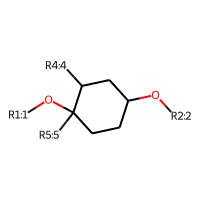
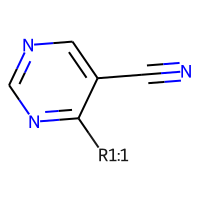
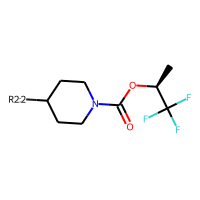
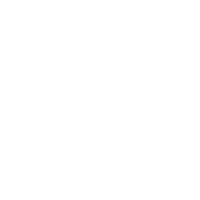
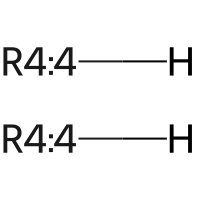
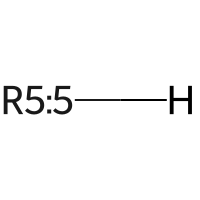
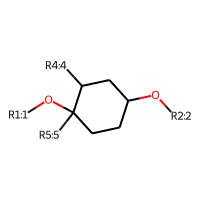
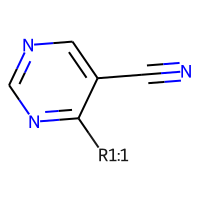
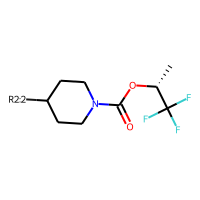
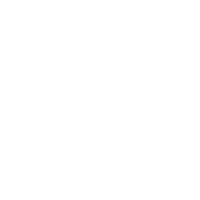
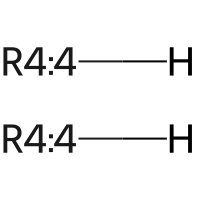
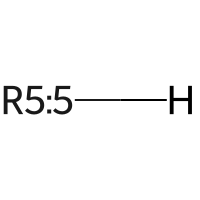
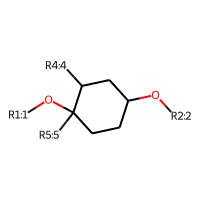
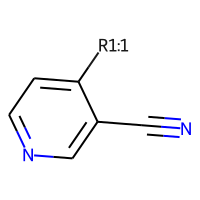
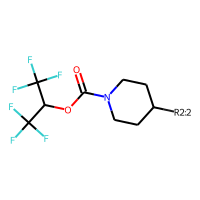
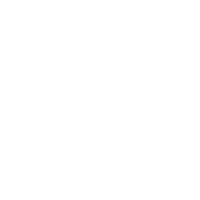
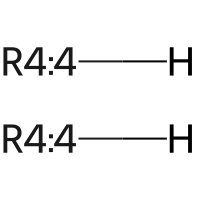
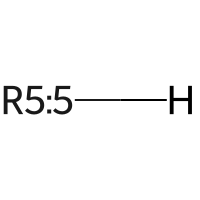
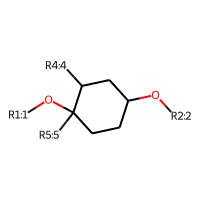
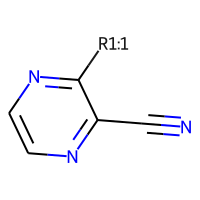
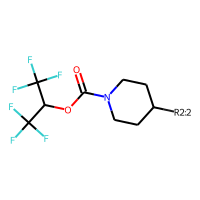
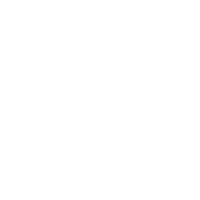
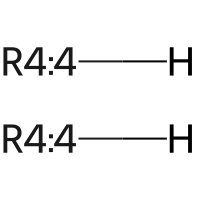
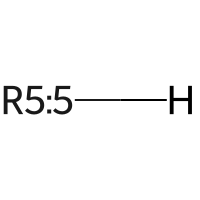
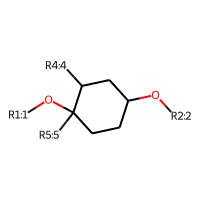
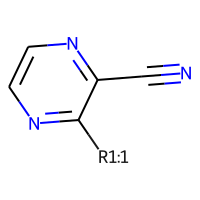
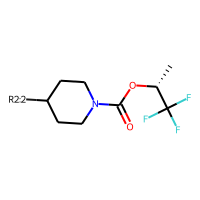
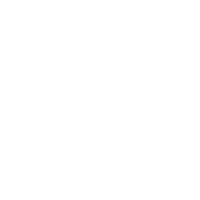
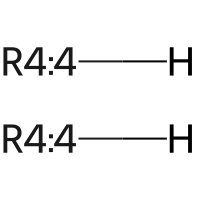
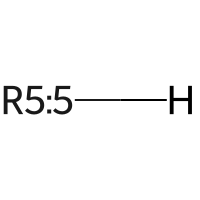
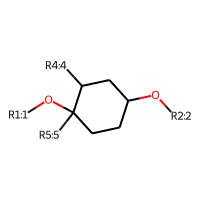
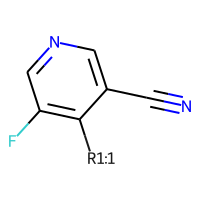
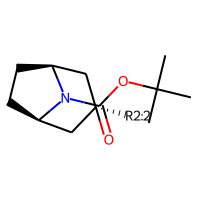
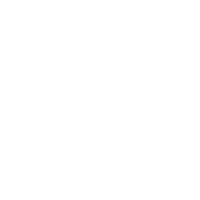
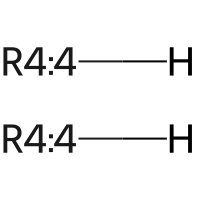
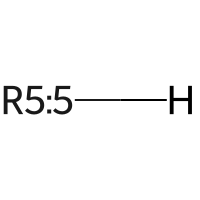
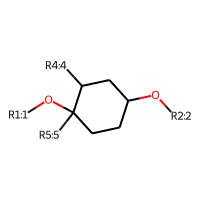
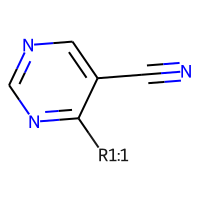
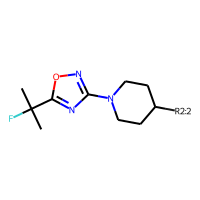
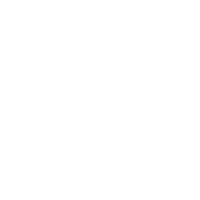
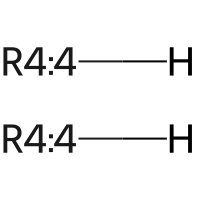
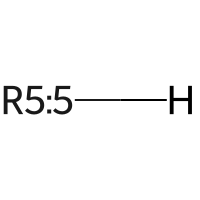
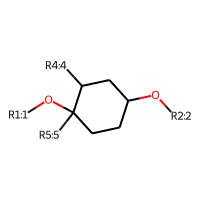
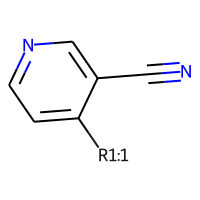
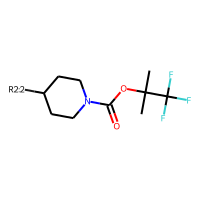
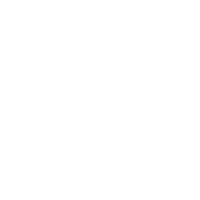
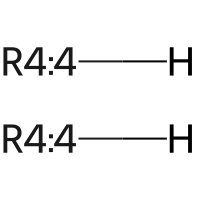
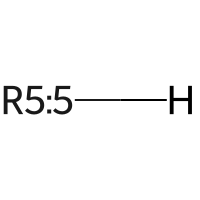
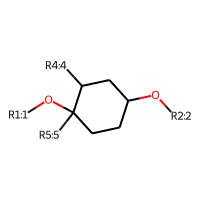
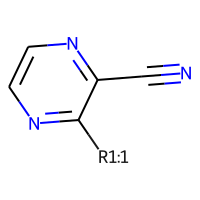
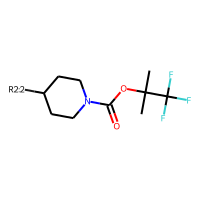
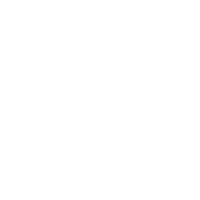
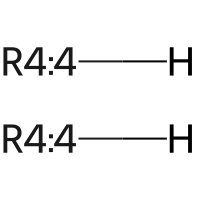
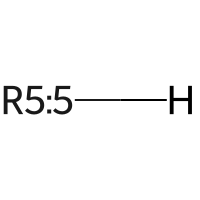
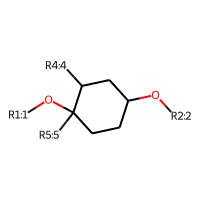
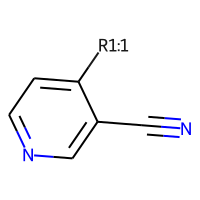
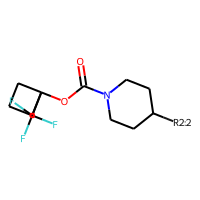
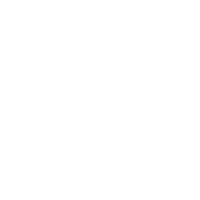
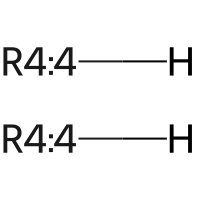
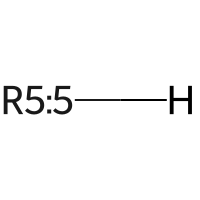
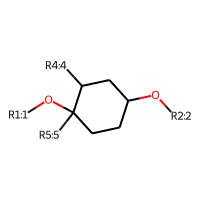
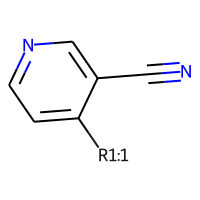
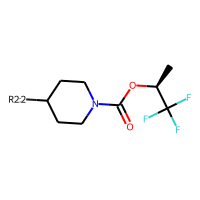
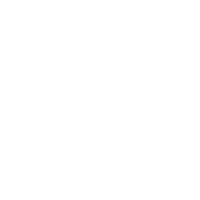
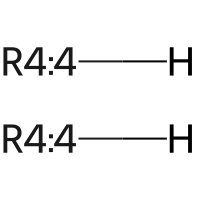
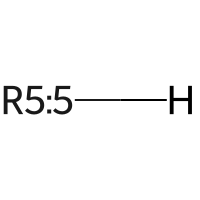
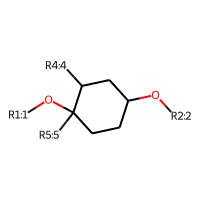
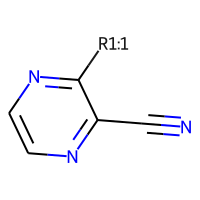
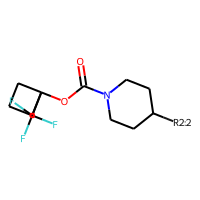
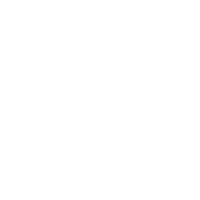
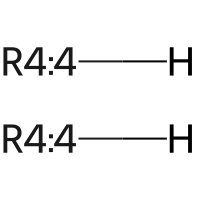
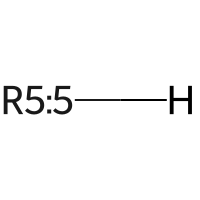
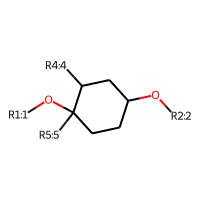
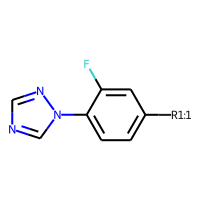
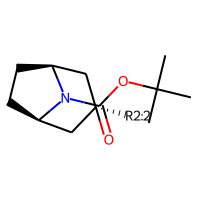
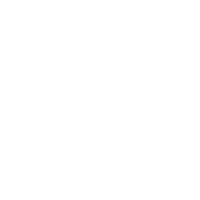
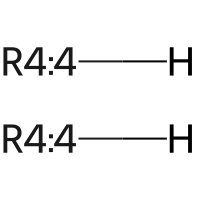
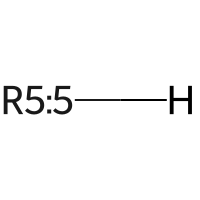
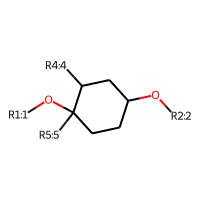
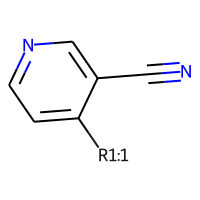
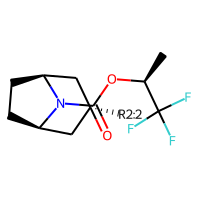
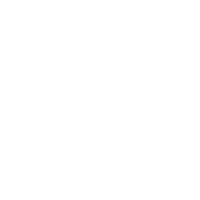
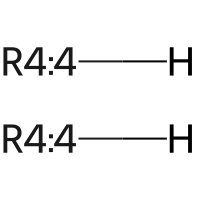
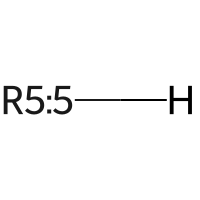
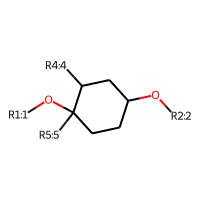
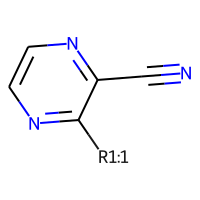
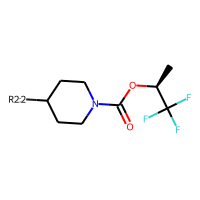
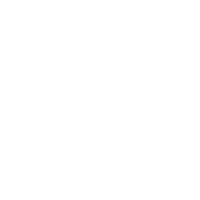
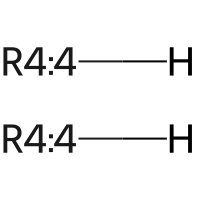
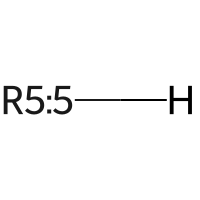
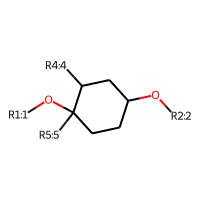
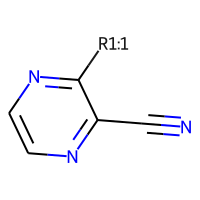
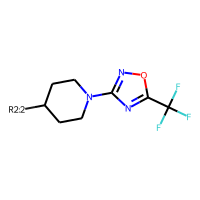
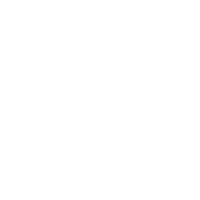
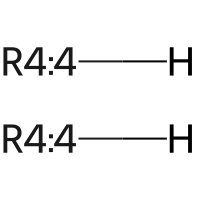
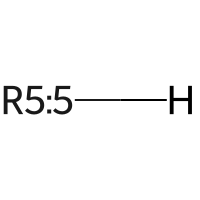
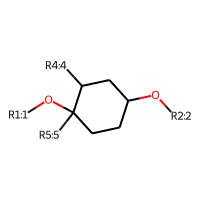
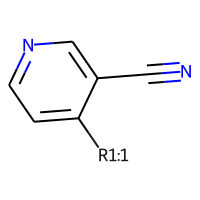
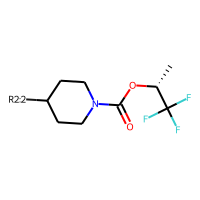
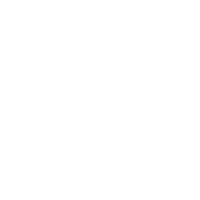
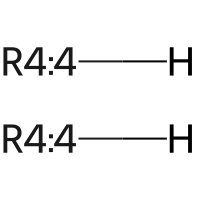
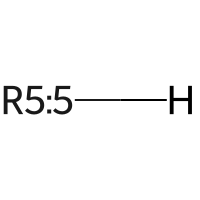
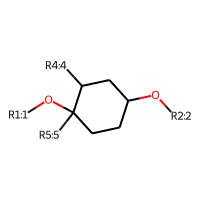
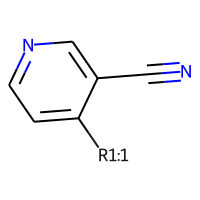
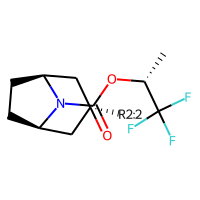
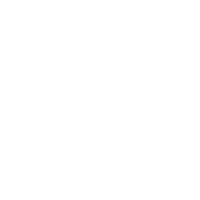
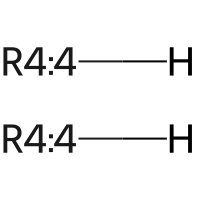
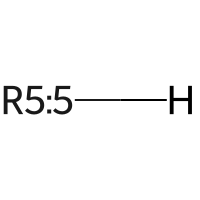
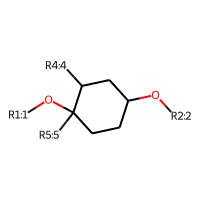
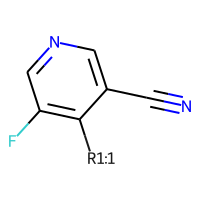
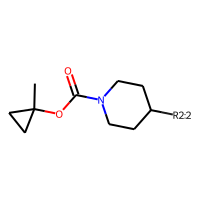
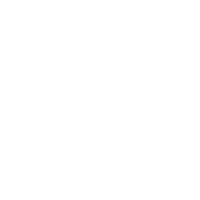
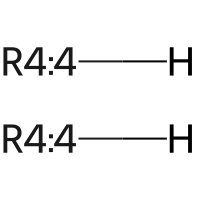
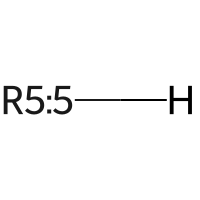
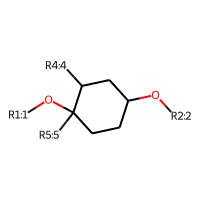
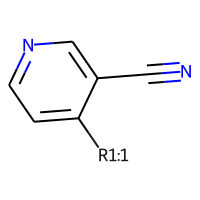
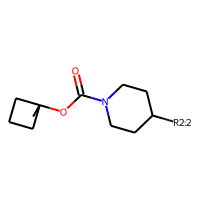
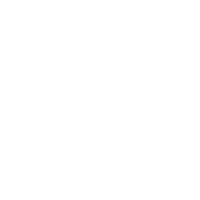
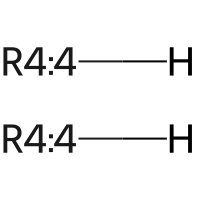
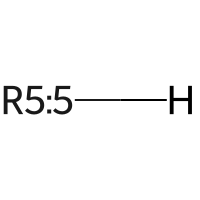
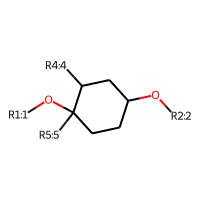
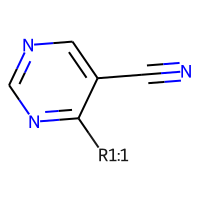
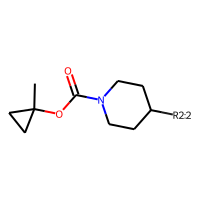
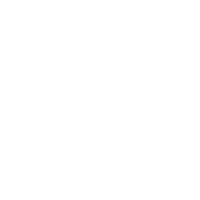
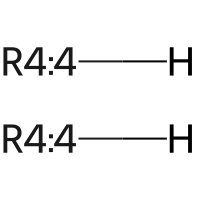
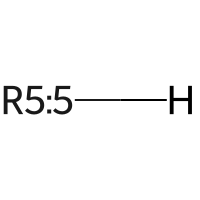
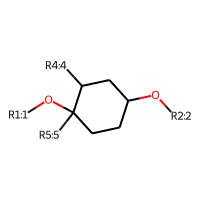
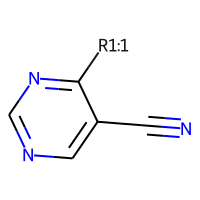
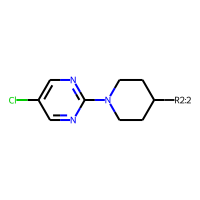
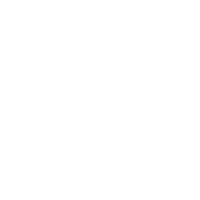
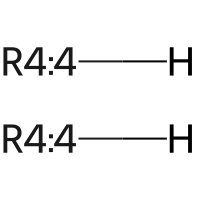
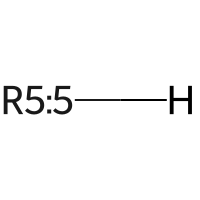
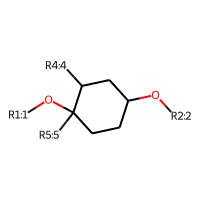
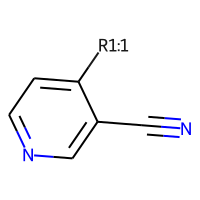
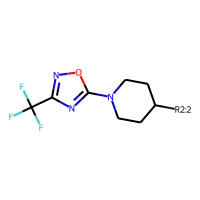
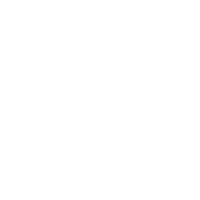
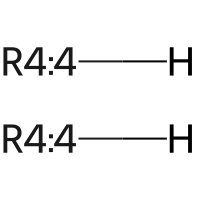
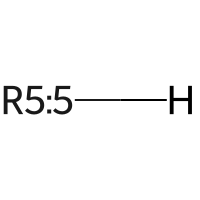
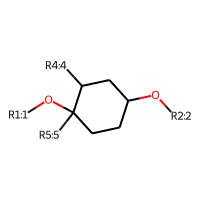
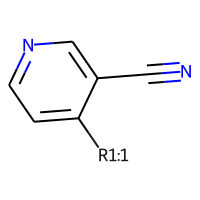
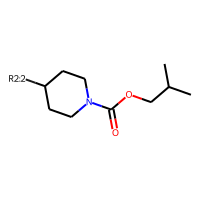
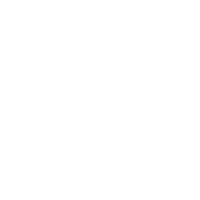
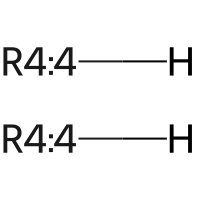
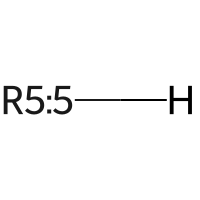
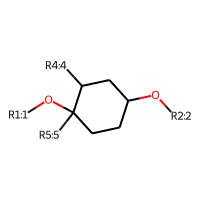
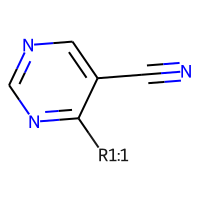
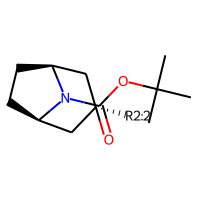
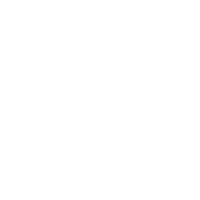
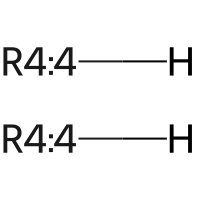
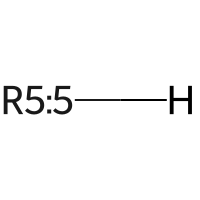
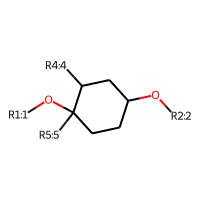
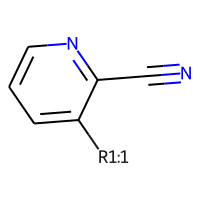
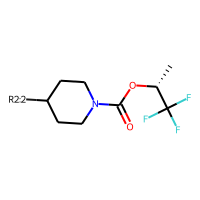
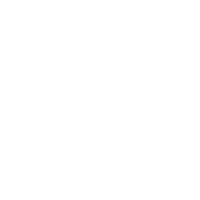
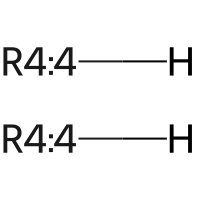
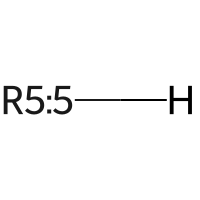
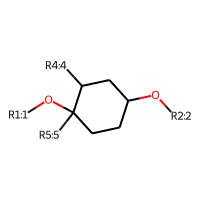
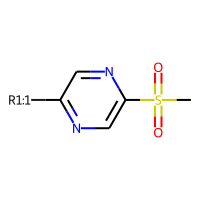
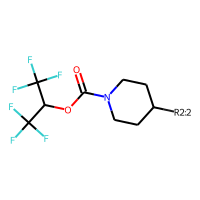
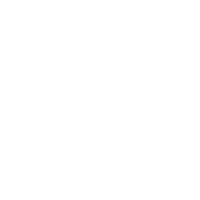
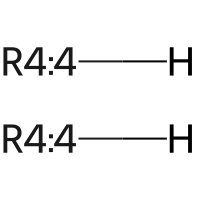
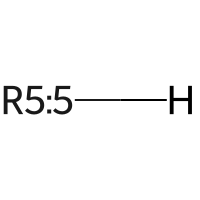
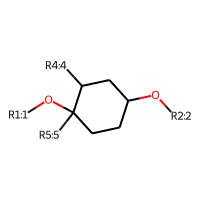
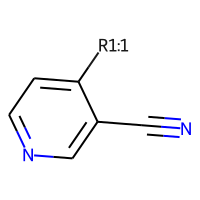
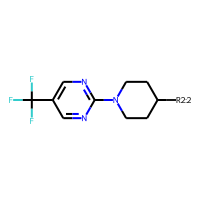
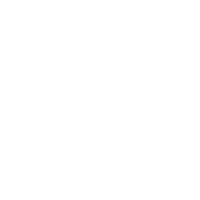
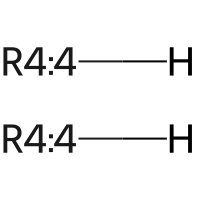
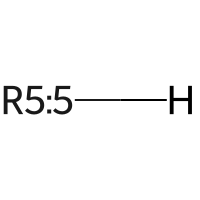
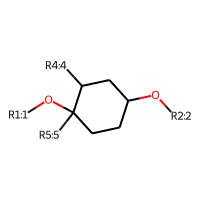
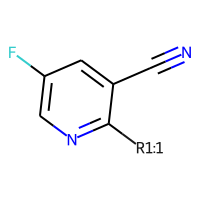
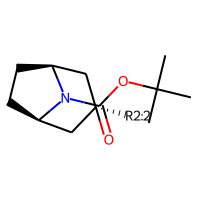
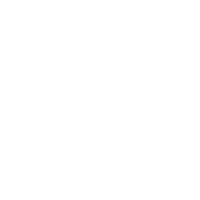
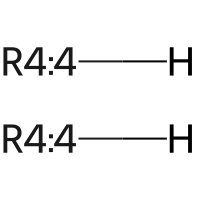
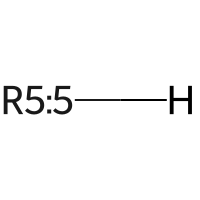
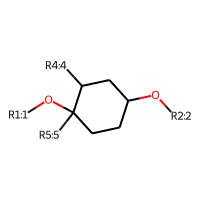
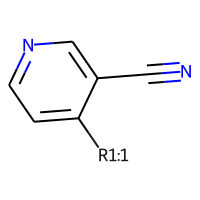
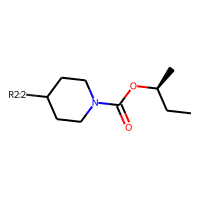
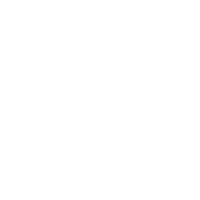
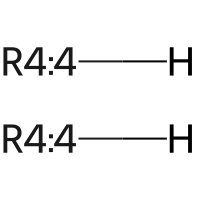
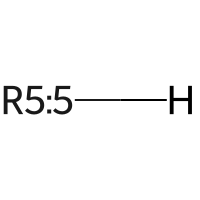
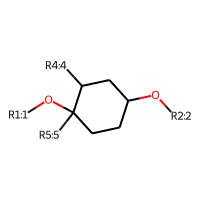
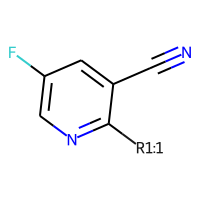
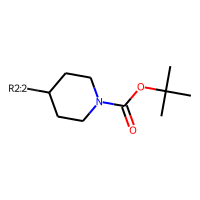
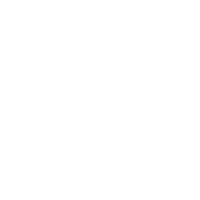
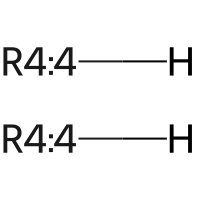
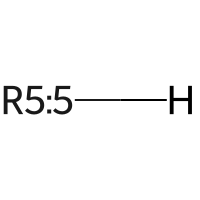
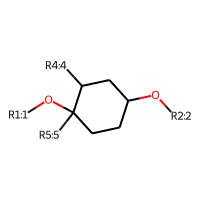
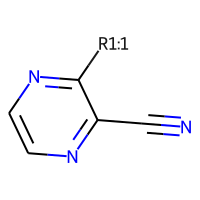
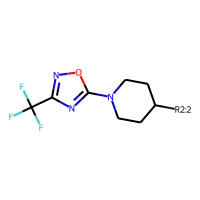
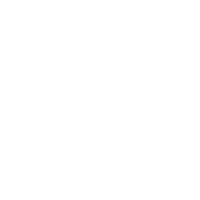
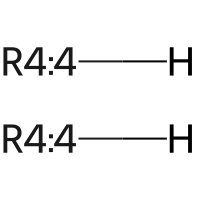
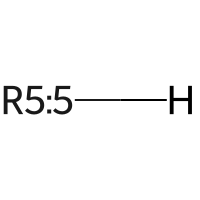
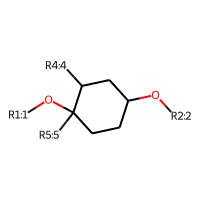
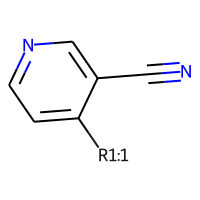
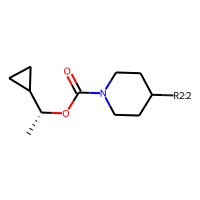
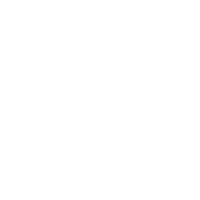
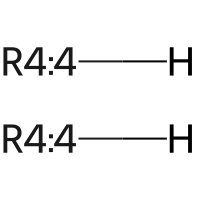
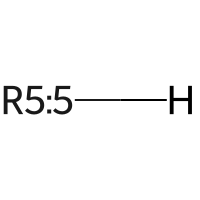
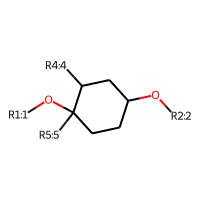
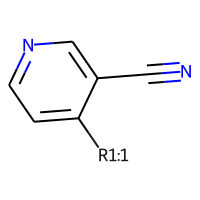
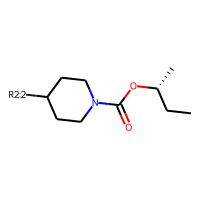
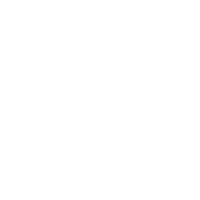
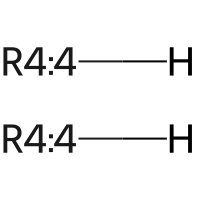
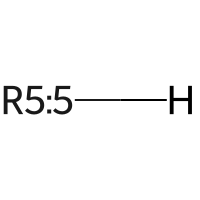
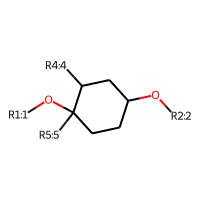
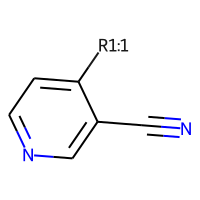
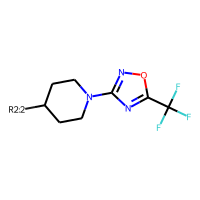
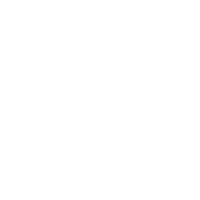
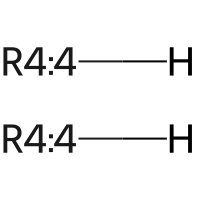
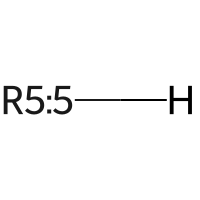
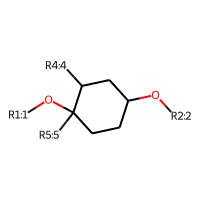
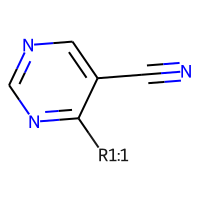
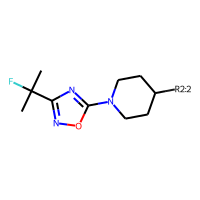
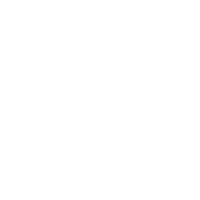
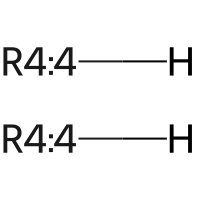
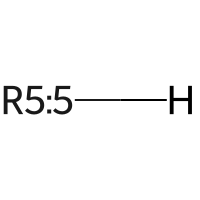
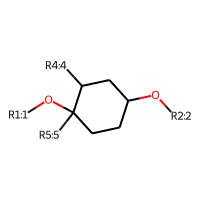
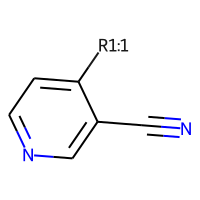
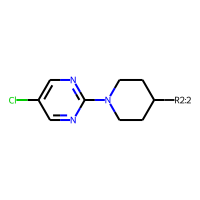
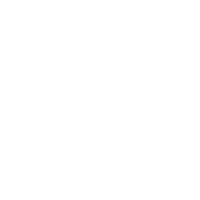
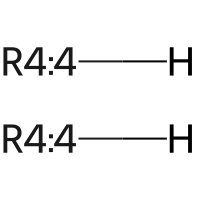
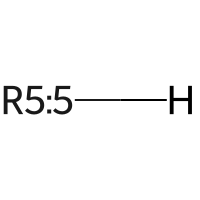
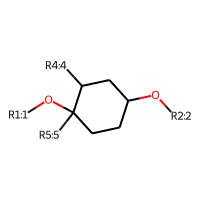
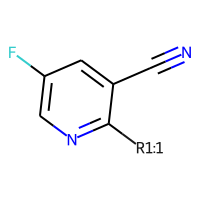
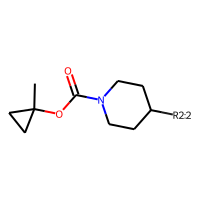
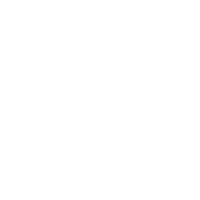
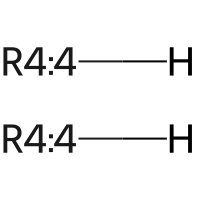
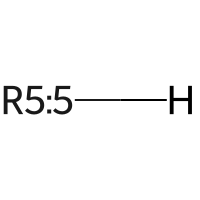
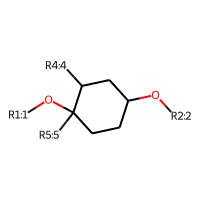
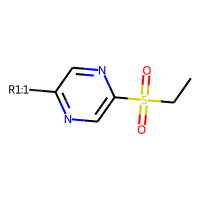
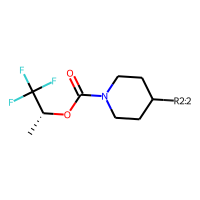
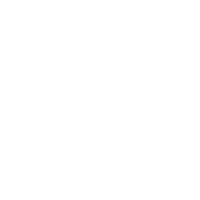
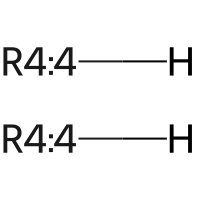
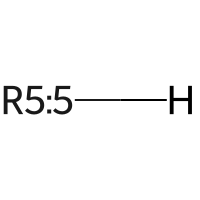
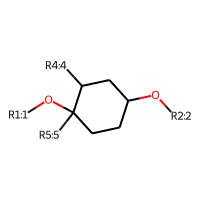
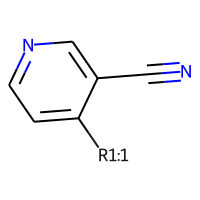
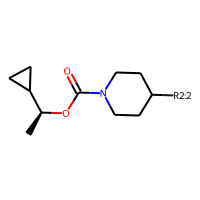
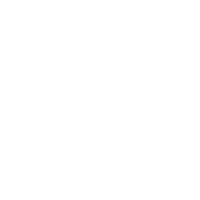
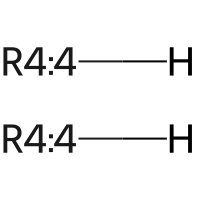
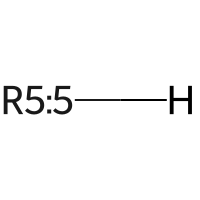
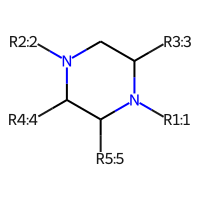
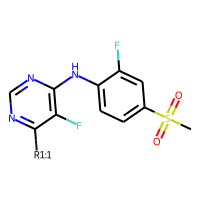
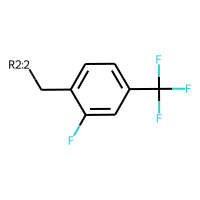
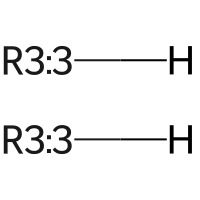
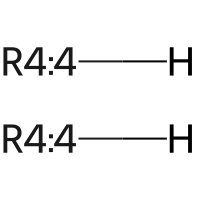
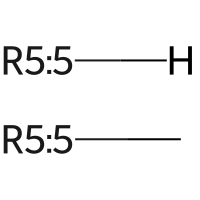
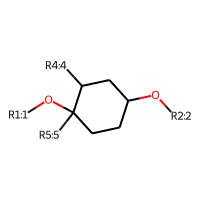
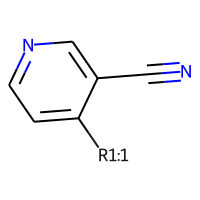
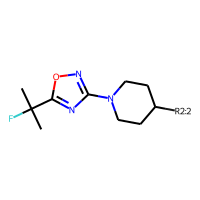
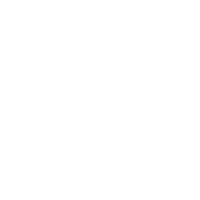
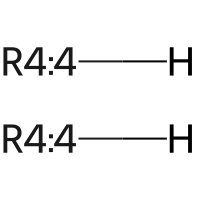
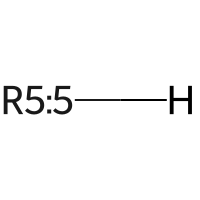
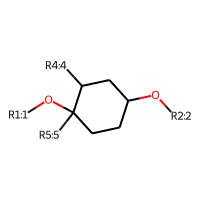
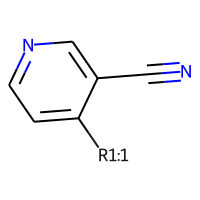
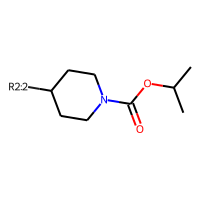
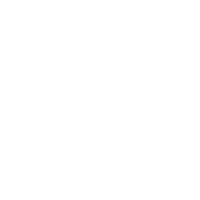
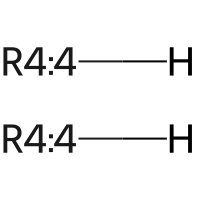
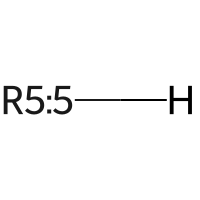
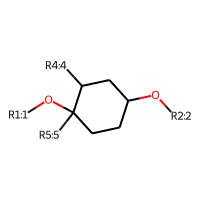
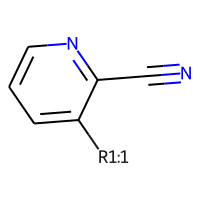
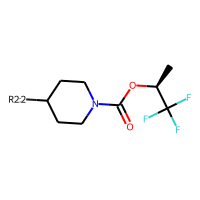
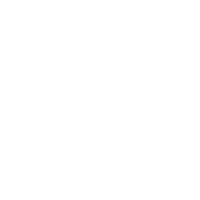
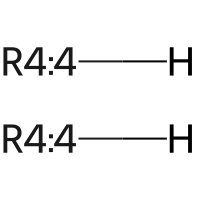
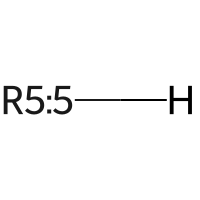
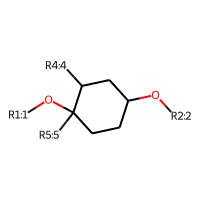
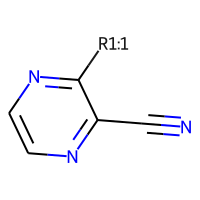
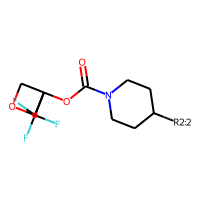
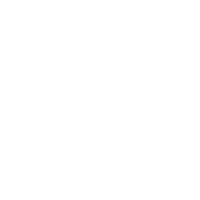
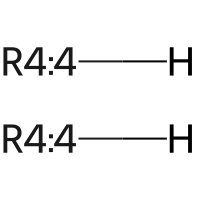
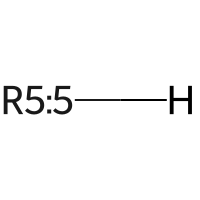
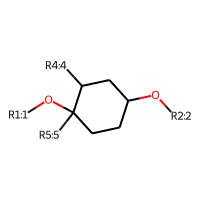
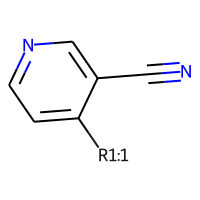
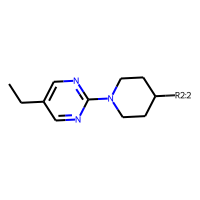
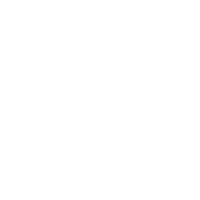
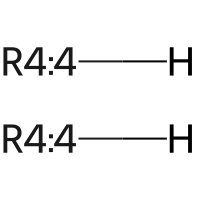
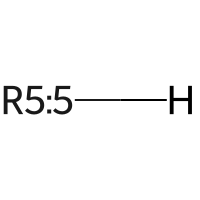
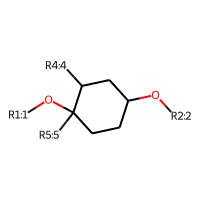
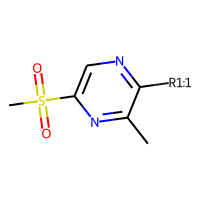
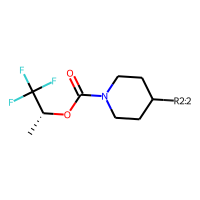
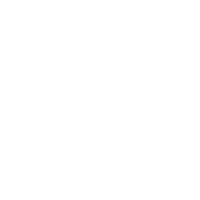
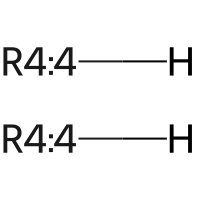
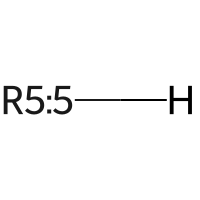
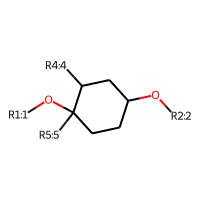
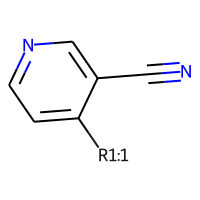
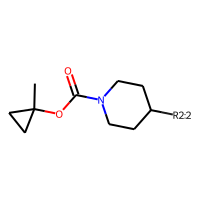
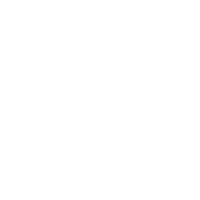
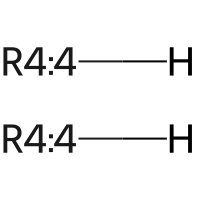
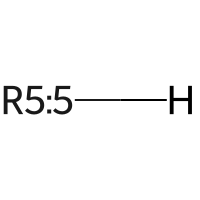
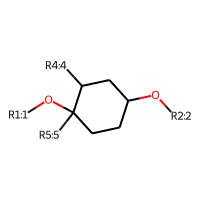
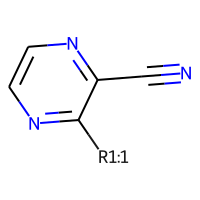
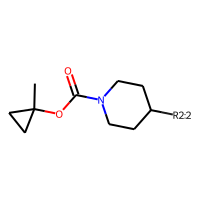
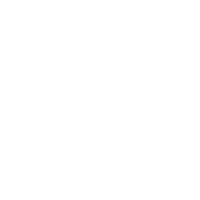
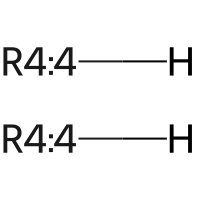
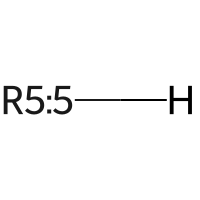
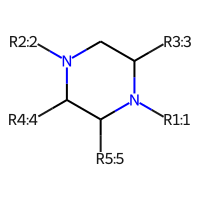
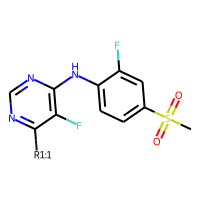
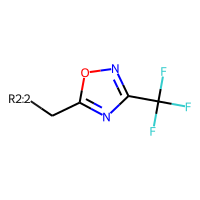
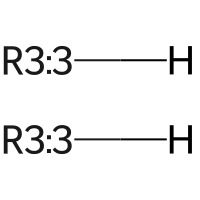
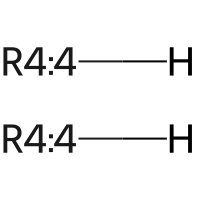
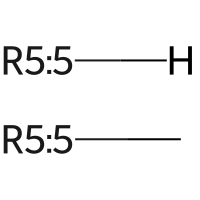
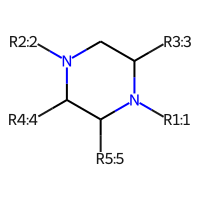
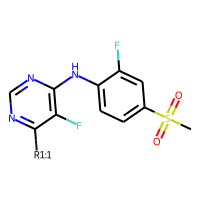
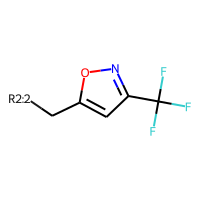
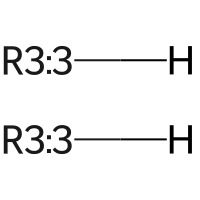
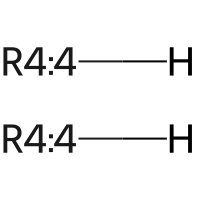
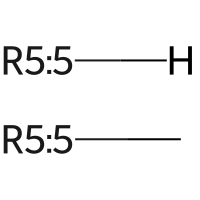
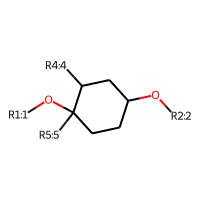
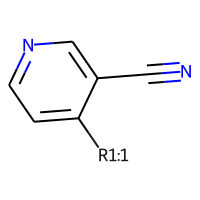
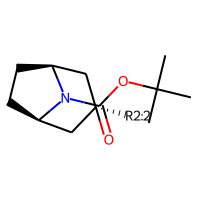
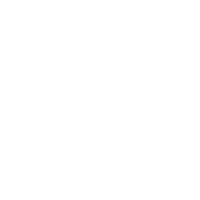
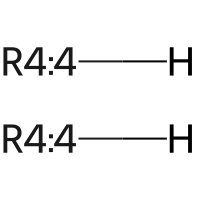
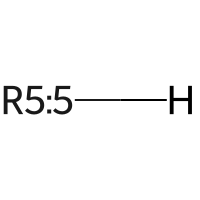
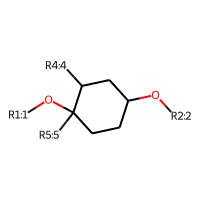
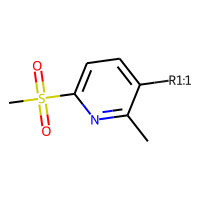
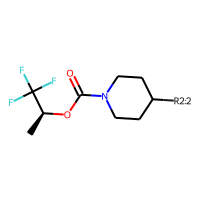
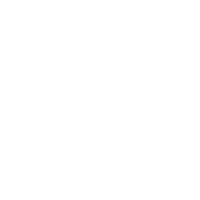
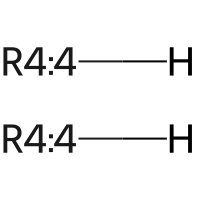
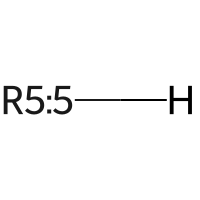
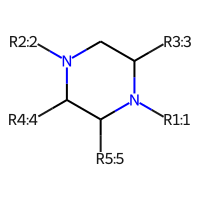
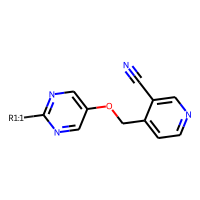
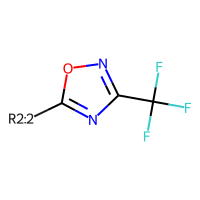
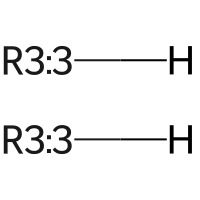
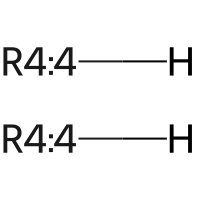
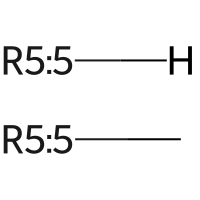
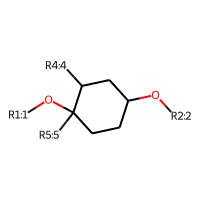
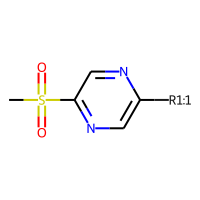
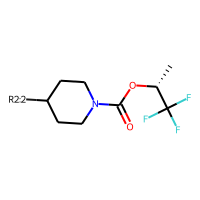
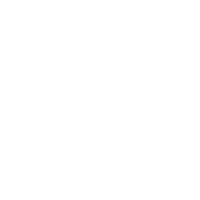
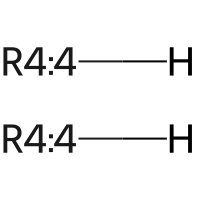
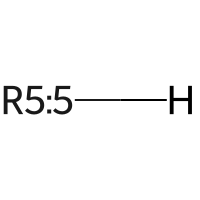
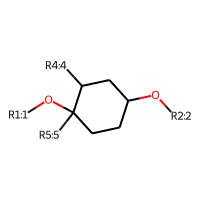
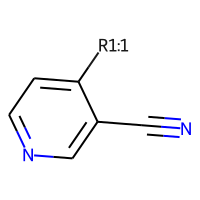
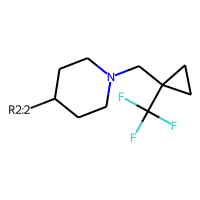
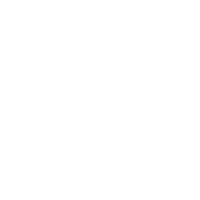
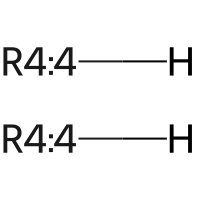
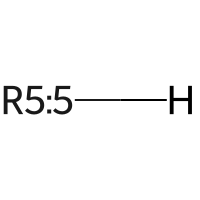
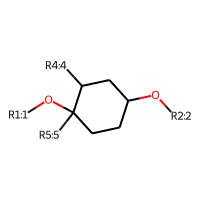
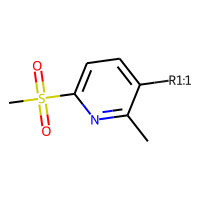
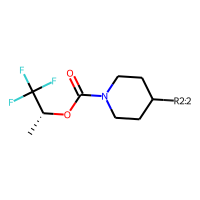
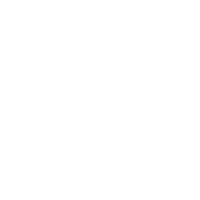
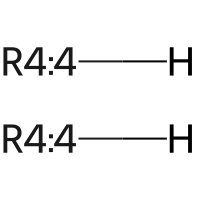
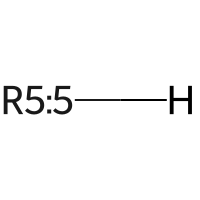
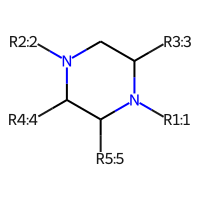
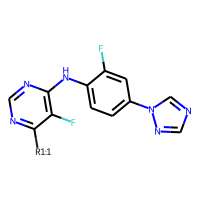
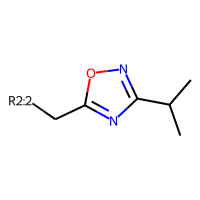
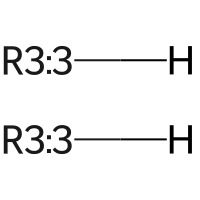
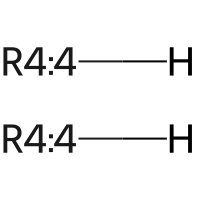
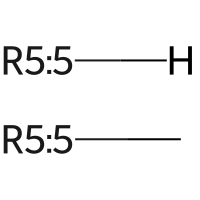
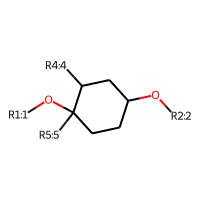
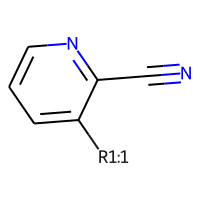
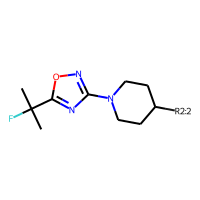
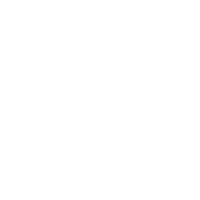
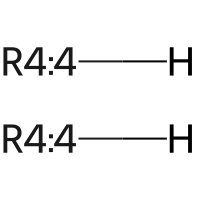
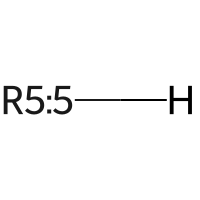
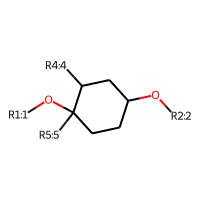
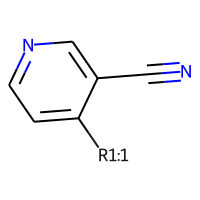
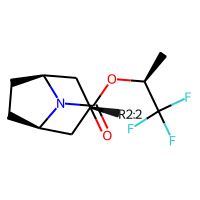
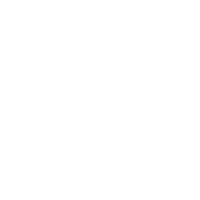
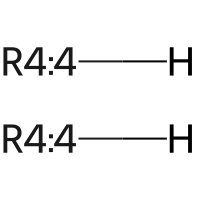
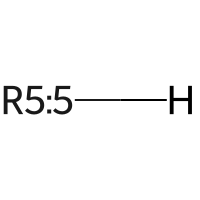
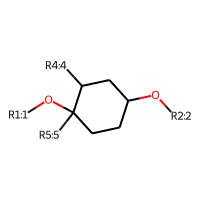
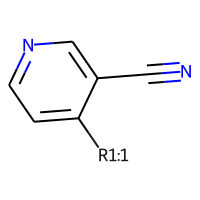
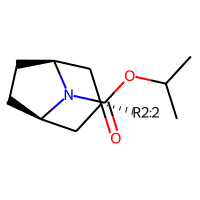
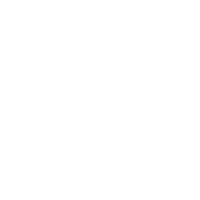
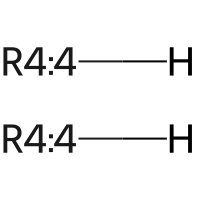
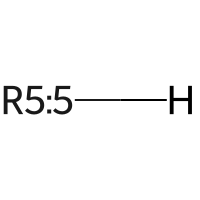
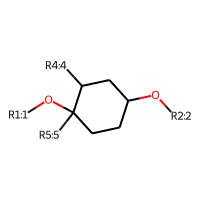
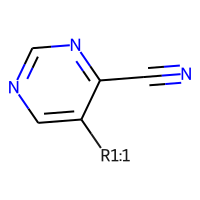
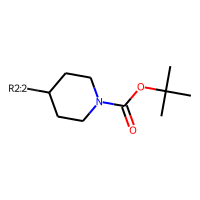
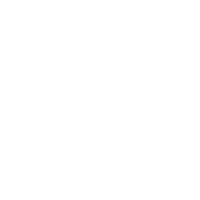
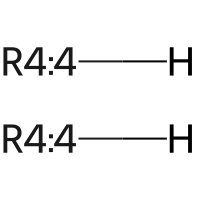
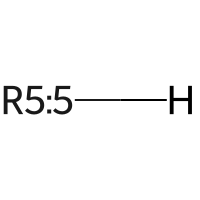
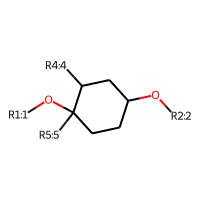
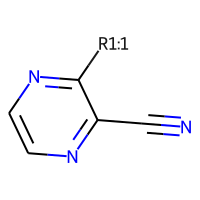
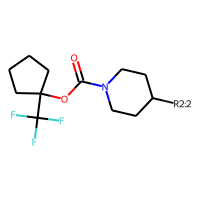
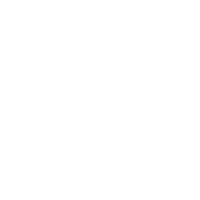
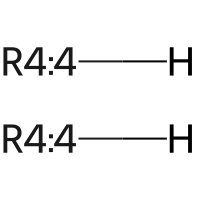
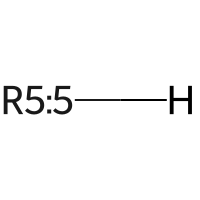
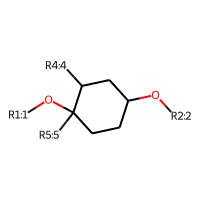
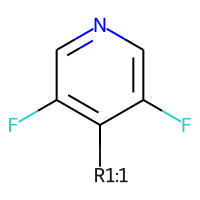
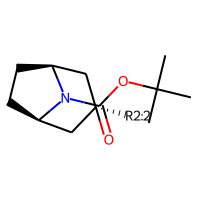
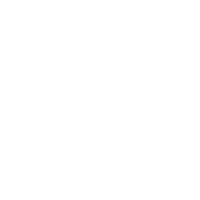
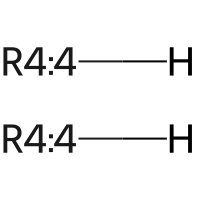
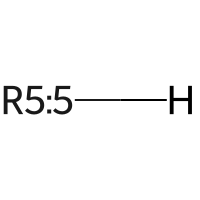
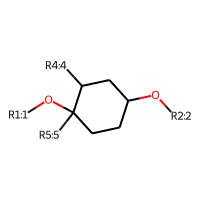
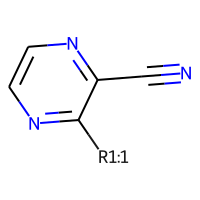
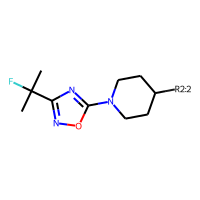
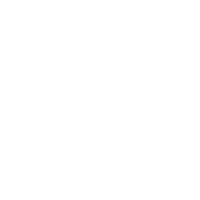
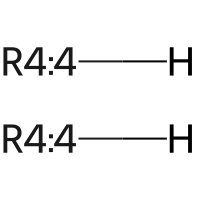
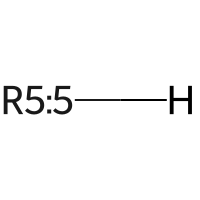
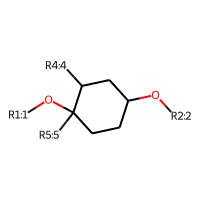
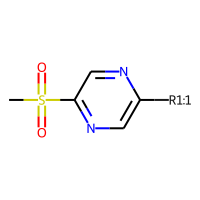
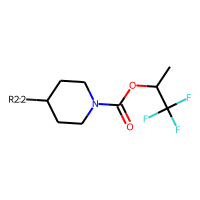
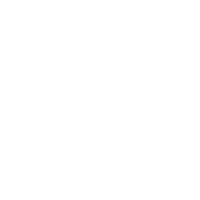
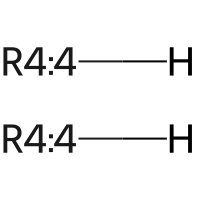
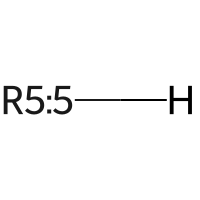
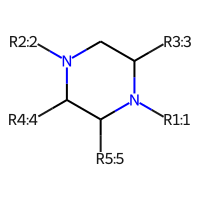
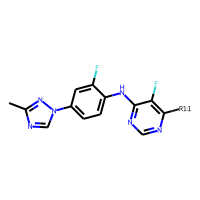
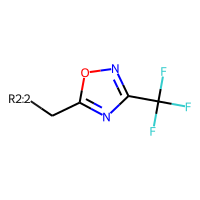
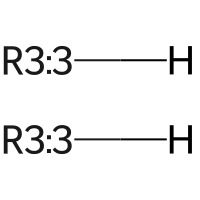
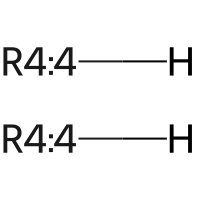
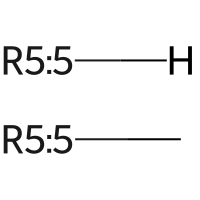
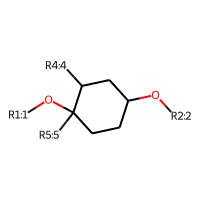
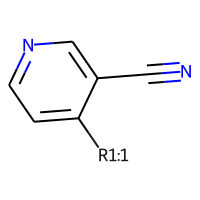
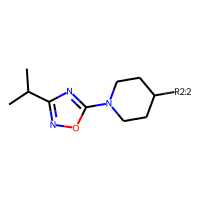
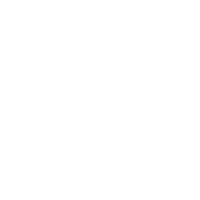
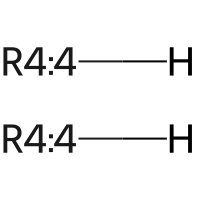
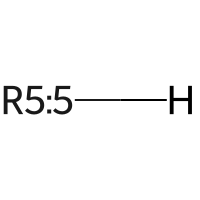
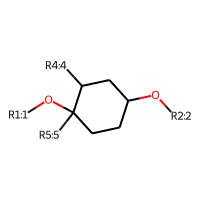
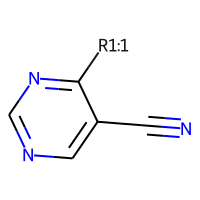
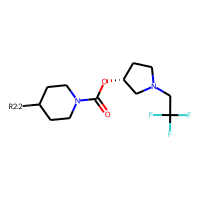
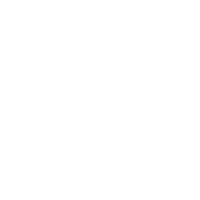
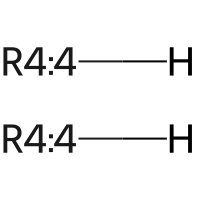
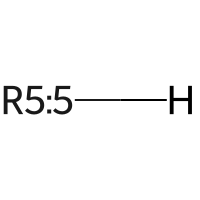
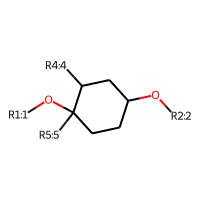
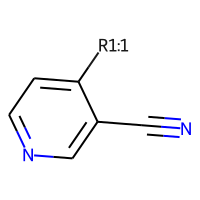
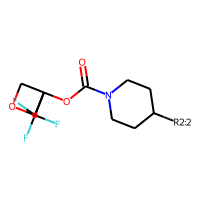
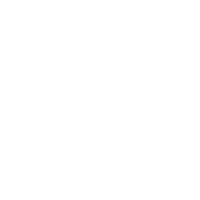
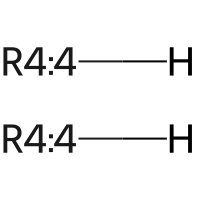
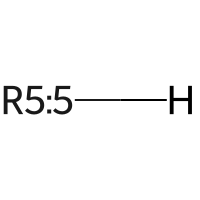
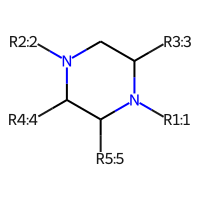
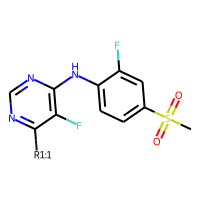
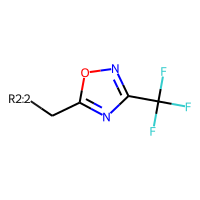
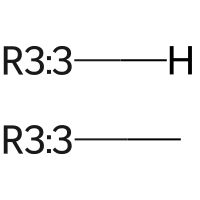
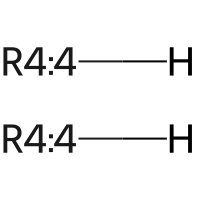
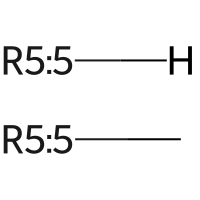
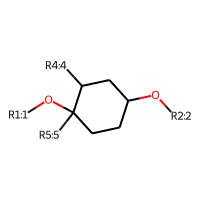
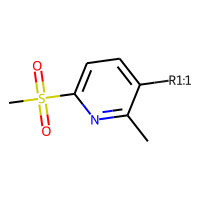
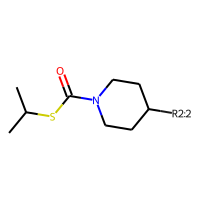
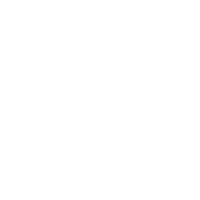
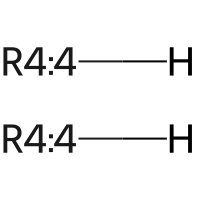
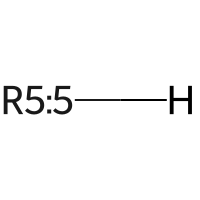
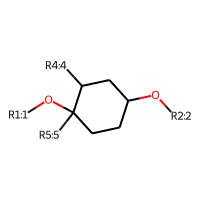
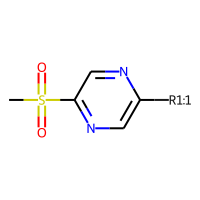
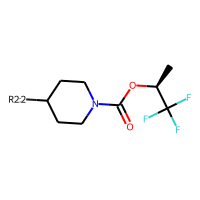
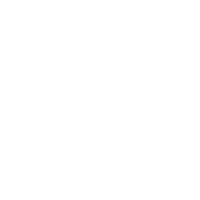
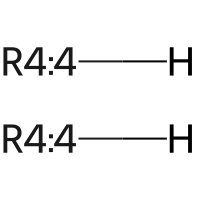
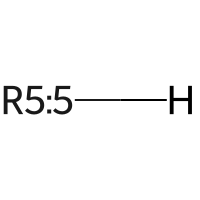
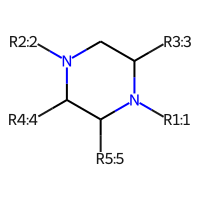
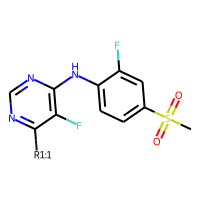
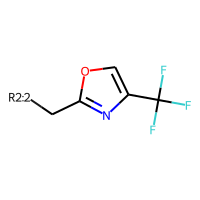
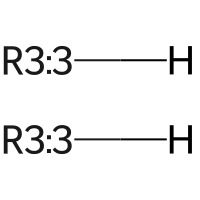
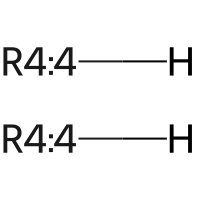
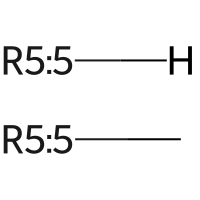
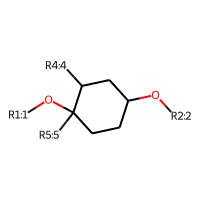
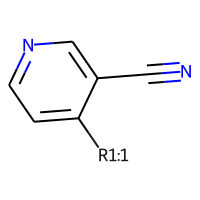
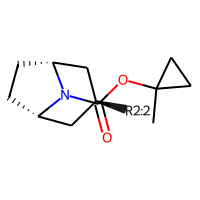
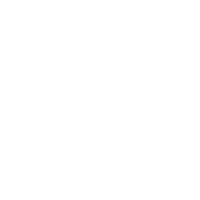
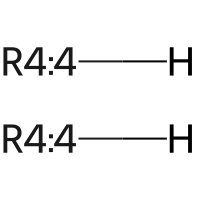
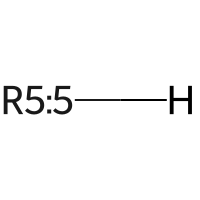
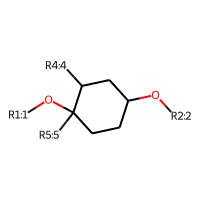
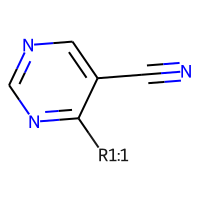
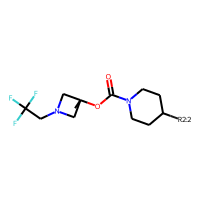
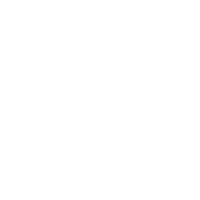
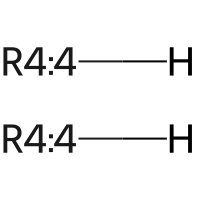
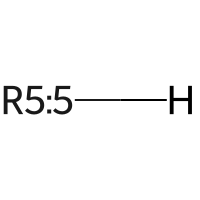
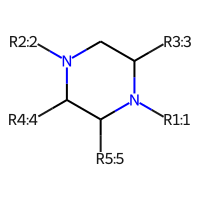
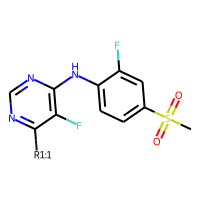
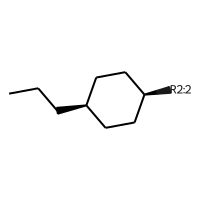
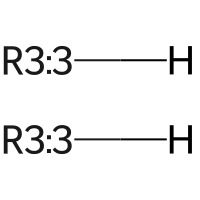
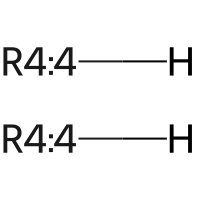
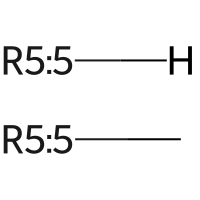
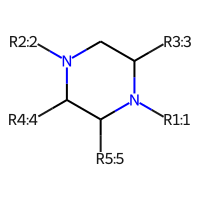
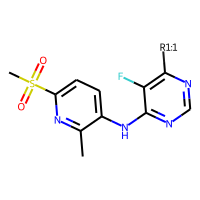
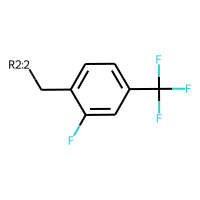
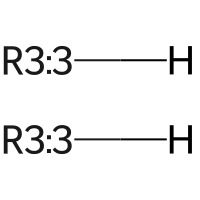
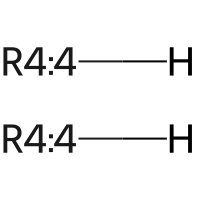
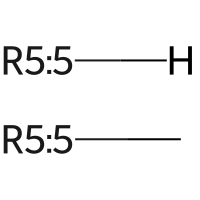
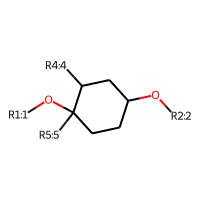
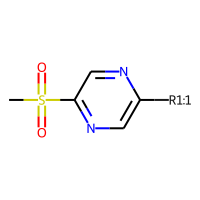
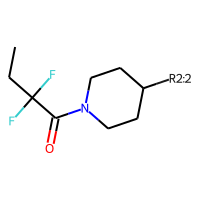
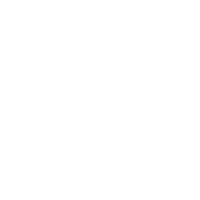
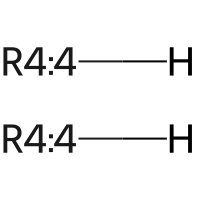
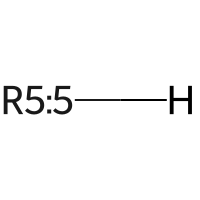
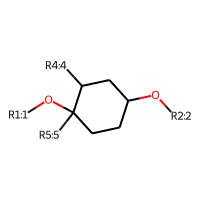
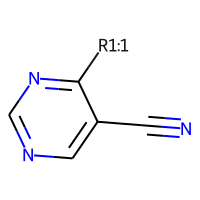
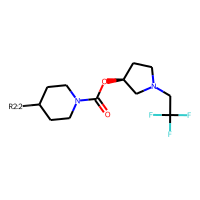
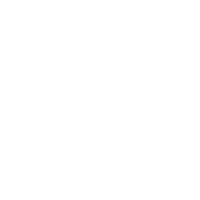
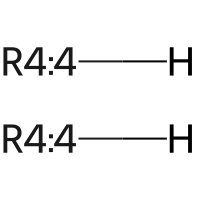
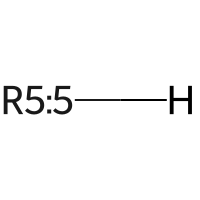
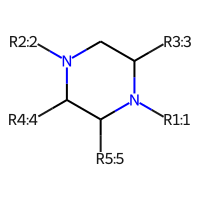
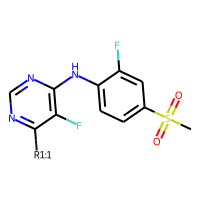
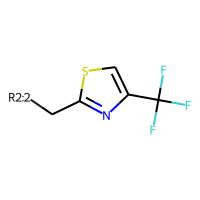
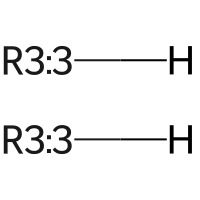
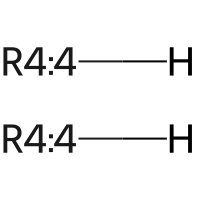
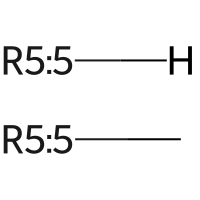
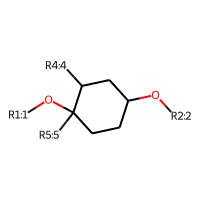
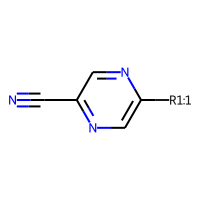
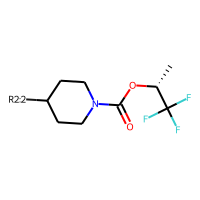
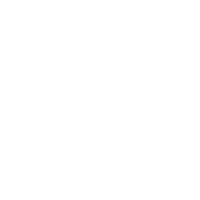
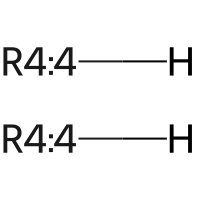
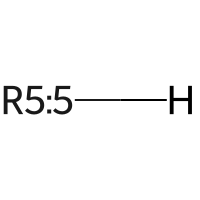
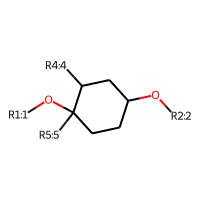
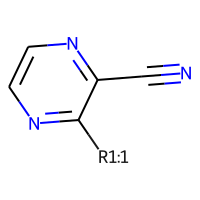
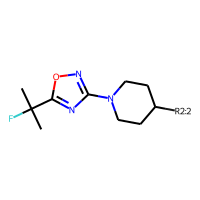
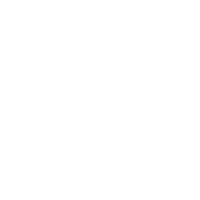
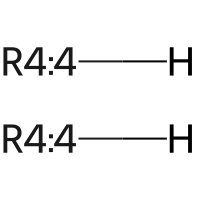
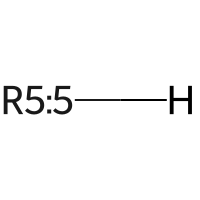
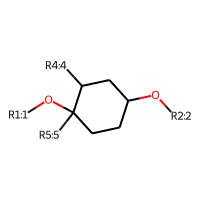
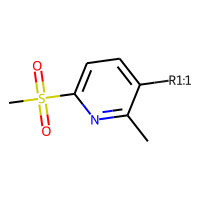
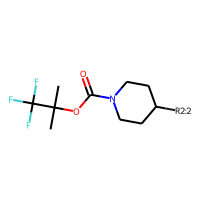
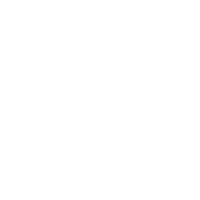
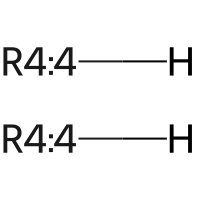
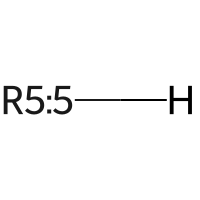
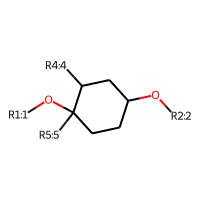
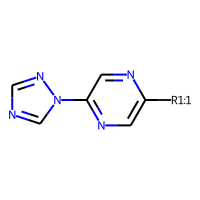
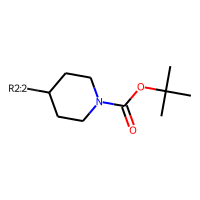
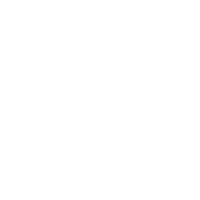
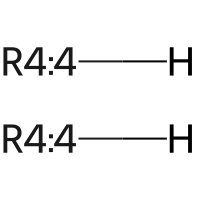
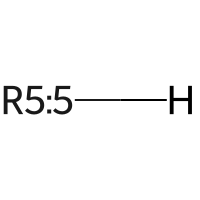
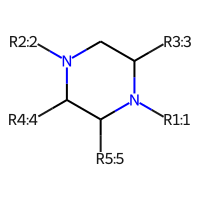
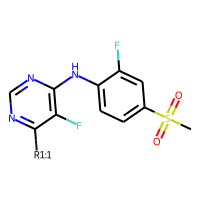
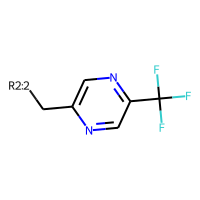
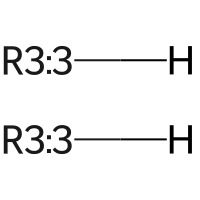
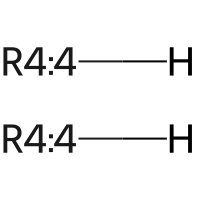
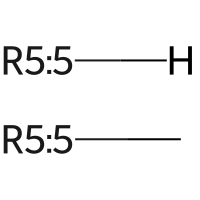
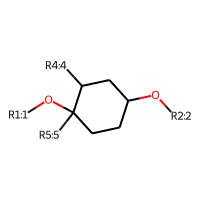
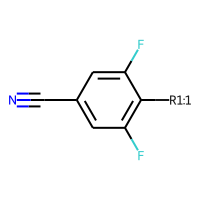
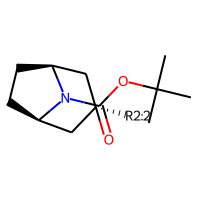
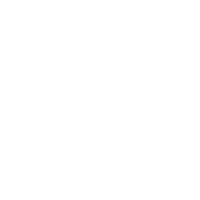
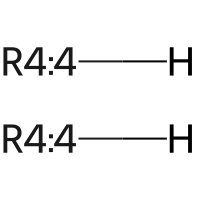
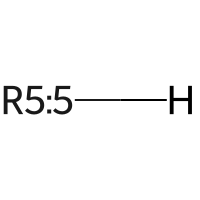
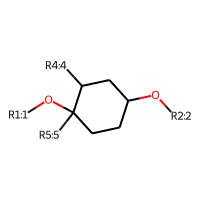
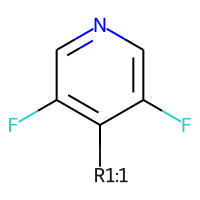
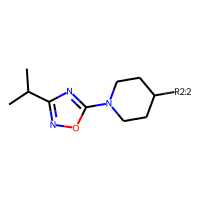
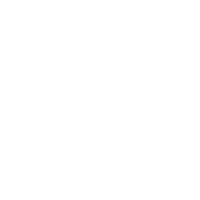
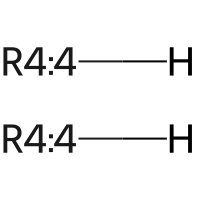
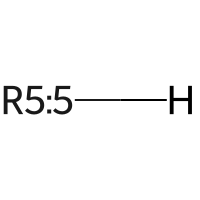
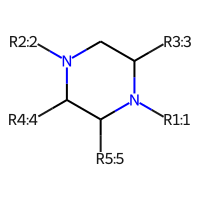
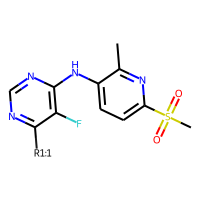
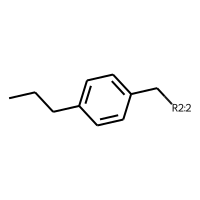
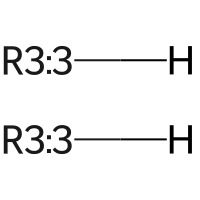
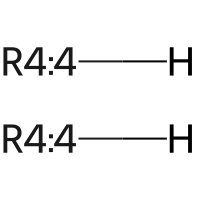
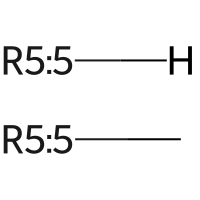
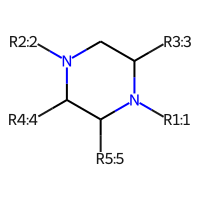
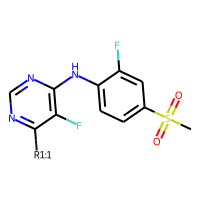
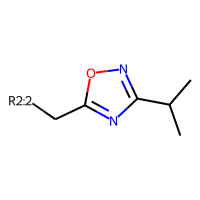
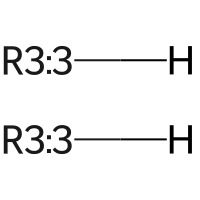
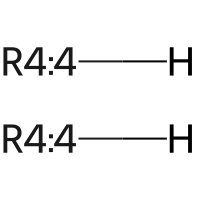
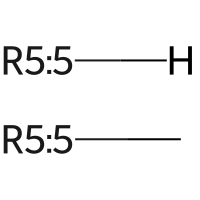
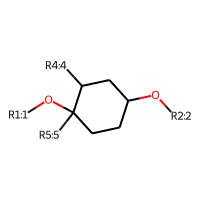
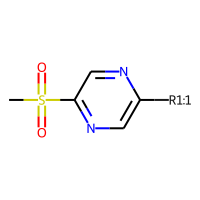
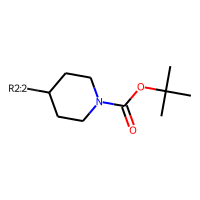
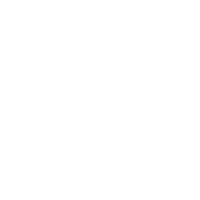
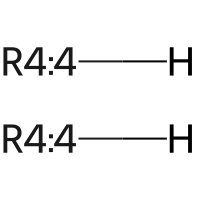
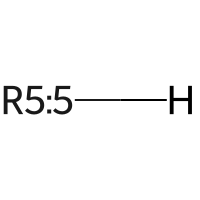
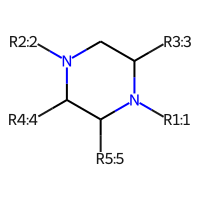
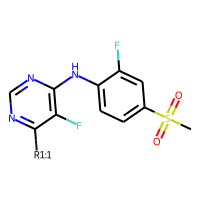
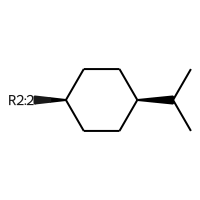
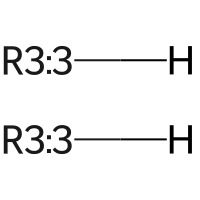
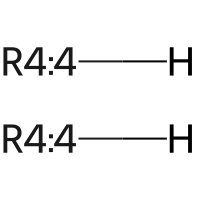
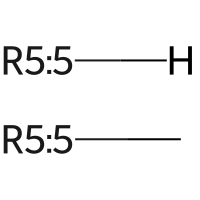
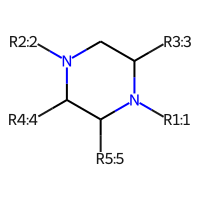
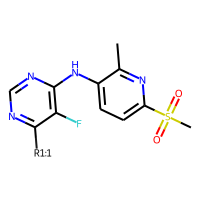
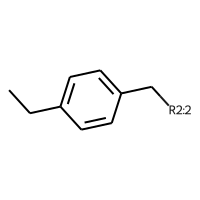
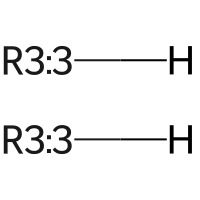
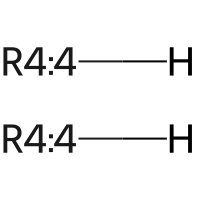
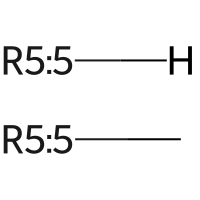
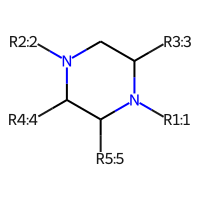
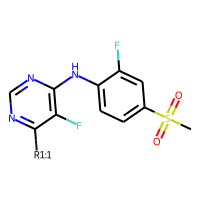
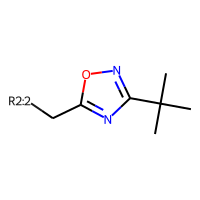
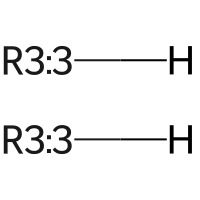
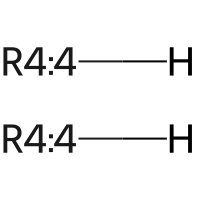
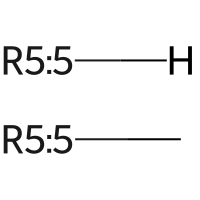
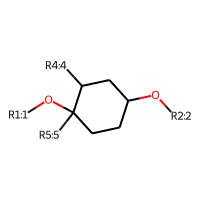
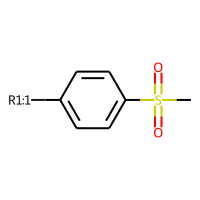
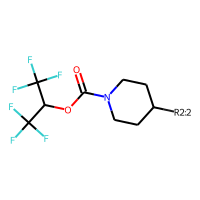
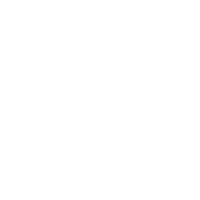
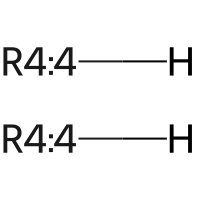
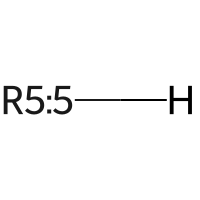
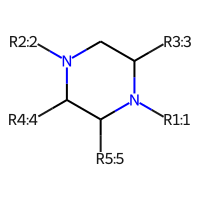
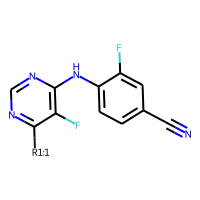
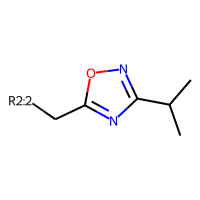
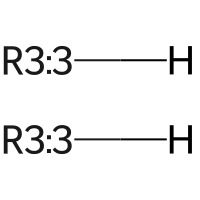
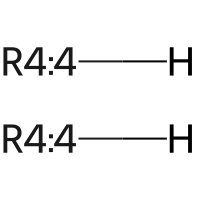
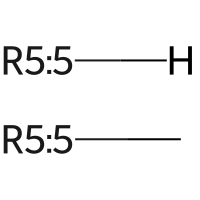
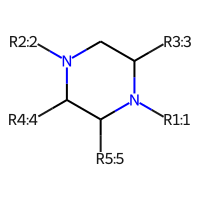
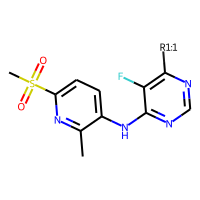
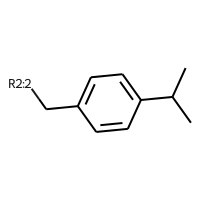
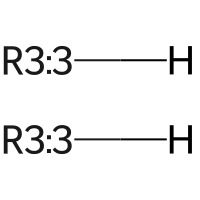
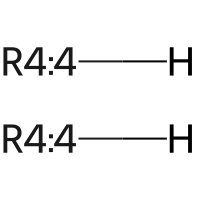
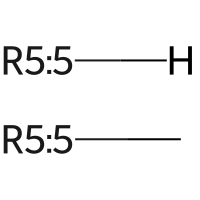
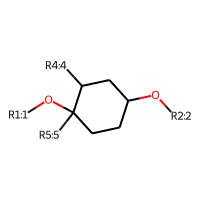
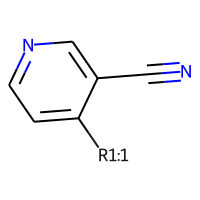
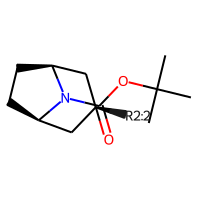
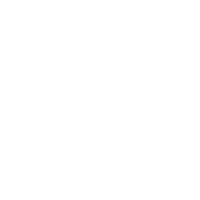
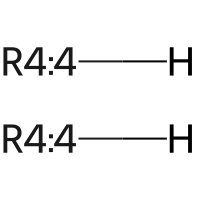
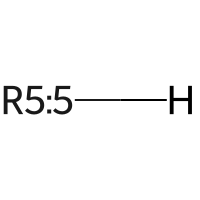
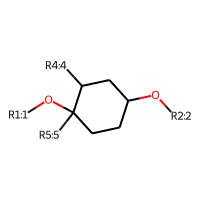
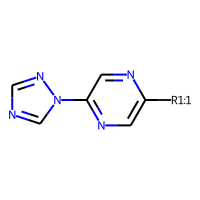
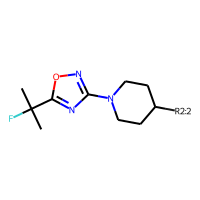
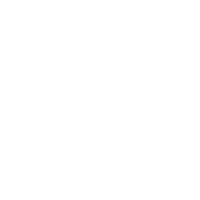
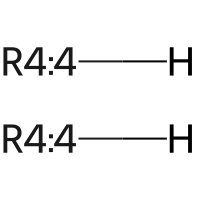
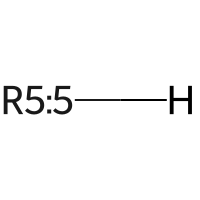
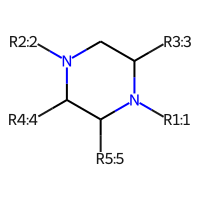
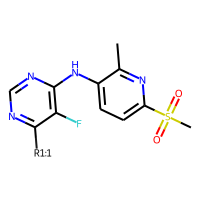
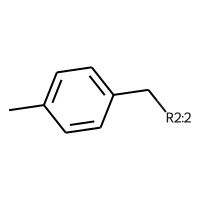
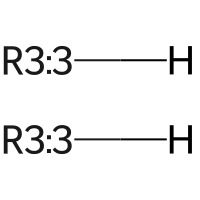
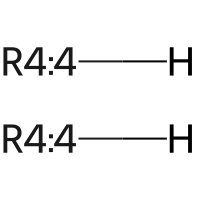
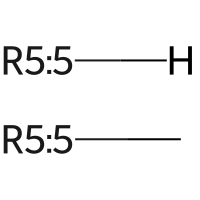

In [8]:
df_top = df.head(100)
PandasTools.ChangeMoleculeRendering(df_top)
HTML(df_top.to_html())